# Solutions

In [2378]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from colorama import Fore

# Statistics functions
from scipy import stats

import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("darkgrid")

params = {
'figure.figsize':(12,5),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

# Environment settings: 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# It is a magic function that renders the figure in the notebook
# Attention if U use this inline Command not work 'figure.figsize'
# %matplotlib inline 

## 0.1. Reading the Data from File

In [2379]:
df = pd.read_csv('adult_eda.csv')

## 0.2. Try to understand what the data looks like

### 0.2.1. Check the head, shape, data-types of the features.

In [2380]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [2381]:
df.shape

(32561, 15)

In [2382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


### 0.2.2. Check if there are some dublicate rows or not. If there are, then drop them.

In [2383]:
df.duplicated().value_counts()

False    32537
True        24
Name: count, dtype: int64

In [2384]:
df.drop_duplicates(inplace=True)
df

# alternative way
# df_new = df[~df.duplicated()]

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors         13.000   
1       50  Self-emp-not-inc   83311   Bachelors         13.000   
2       38           Private  215646     HS-grad          9.000   
3       53           Private  234721        11th          7.000   
4       28           Private  338409   Bachelors         13.000   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm         12.000   
32557   40           Private  154374     HS-grad          9.000   
32558   58           Private  151910     HS-grad          9.000   
32559   22           Private  201490     HS-grad          9.000   
32560   52      Self-emp-inc  287927     HS-grad          9.000   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical            NaN  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country salary  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32537 rows x 15 columns]

In [2385]:
df.shape

(32537, 15)

### 0.2.3. Check the statistical values of features.

In [2386]:
df.describe().T

count       mean        std       min        25%  \
age            32537.000     38.586     13.638    17.000     28.000   
fnlwgt         32537.000 189780.849 105556.471 12285.000 117827.000   
education-num  31735.000     10.084      2.575     1.000      9.000   
capital-gain   32537.000   1078.444   7387.957     0.000      0.000   
capital-loss   32537.000     87.368    403.102     0.000      0.000   
hours-per-week 32537.000     40.440     12.347     1.000     40.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
fnlwgt         178356.000 236993.000 1484705.000  
education-num      10.000     12.000      16.000  
capital-gain        0.000      0.000   99999.000  
capital-loss        0.000      0.000    4356.000  
hours-per-week     40.000     45.000      99.000

### 0.2.4. Basically check the missing values. (NaN, None)

In [2387]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [2388]:
(df.isnull().sum()/df.shape[0]) * 100

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education-num     2.465
marital-status    0.000
occupation        0.000
relationship     15.564
race              0.000
sex               0.000
capital-gain      0.000
capital-loss      0.000
hours-per-week    0.000
native-country    0.000
salary            0.000
dtype: float64

### 0.2.5. If needed, rename the columns' names for easy use.

In [2389]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [2390]:
rename = {'education-num': 'education_num', 
          'marital-status': 'marital_status', 
          'capital-gain': 'capital_gain', 
          'capital-loss': 'capital_loss',
          'hours-per-week': 'hours_per_week',
          'native-country': 'native_country'}
df.rename(columns=rename, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

## 0.3. Examining the Data

### 0.3.1. Look at the value counts of columns that have OBJECT datatype

In [2391]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [2392]:
df.describe(include='object').T

count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital_status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    27473      5             Husband  13187
race            32537      5               White  27795
sex             32537      2                Male  21775
native_country  32537     42       United-States  29153
salary          32537      2               <=50K  24698

### 0.3.2. Assign the Columns (Features) of object data type as** **``"object_col"``

In [2393]:
object_col = df[list(df.describe(include='object').T.index)]  # fancy indexing
object_col

workclass   education      marital_status         occupation  \
0             State-gov   Bachelors       Never-married       Adm-clerical   
1      Self-emp-not-inc   Bachelors  Married-civ-spouse    Exec-managerial   
2               Private     HS-grad            Divorced  Handlers-cleaners   
3               Private        11th  Married-civ-spouse  Handlers-cleaners   
4               Private   Bachelors  Married-civ-spouse     Prof-specialty   
...                 ...         ...                 ...                ...   
32556           Private  Assoc-acdm  Married-civ-spouse       Tech-support   
32557           Private     HS-grad  Married-civ-spouse  Machine-op-inspct   
32558           Private     HS-grad             Widowed       Adm-clerical   
32559           Private     HS-grad       Never-married       Adm-clerical   
32560      Self-emp-inc     HS-grad  Married-civ-spouse    Exec-managerial   

        relationship   race     sex native_country salary  
0      Not-in-family  White    Male  United-States  <=50K  
1            Husband  White    Male  United-States  <=50K  
2      Not-in-family  White    Male  United-States  <=50K  
3            Husband  Black    Male  United-States  <=50K  
4               Wife  Black  Female           Cuba  <=50K  
...              ...    ...     ...            ...    ...  
32556           Wife  White  Female  United-States  <=50K  
32557        Husband  White    Male  United-States   >50K  
32558      Unmarried  White  Female  United-States  <=50K  
32559            NaN  White    Male  United-States  <=50K  
32560           Wife  White  Female  United-States   >50K  

[32537 rows x 9 columns]

In [2394]:
object_col.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

In [2395]:
for col in object_col:
    print(col)
    print("--"*20)
    print(df[col].value_counts(dropna=False))
    print()

workclass
----------------------------------------
workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education
----------------------------------------
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

marital_status
----------------------------------------
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spou

### 0.3.3. Detect strange values apart from the NaN Values. (isin(), Count(), Sum(),Any())

**Check if the Dataset has any Question Mark** **``"?"``**

In [2396]:
df[df.isin(['?'])].any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

In [2397]:
print("Which columns have a '?'", end='\n-------------\n')
df[df.isin(['?'])].any()[df[df.isin(['?'])].any() == True]

Which columns have a '?'
-------------


workclass         True
occupation        True
native_country    True
dtype: bool

## 0.4. Target Feature

#### Check the count of person in each "salary" levels and visualize it with a countplot

In [2398]:
df.salary.value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

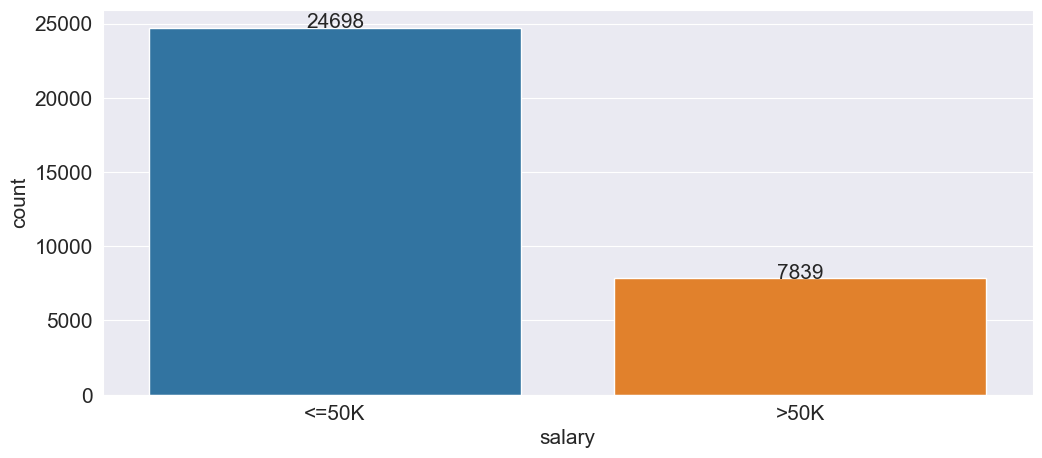

In [2399]:
ax = sns.countplot(data=df, x='salary', palette='tab10')
for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()), ha='center')

#### Check the percentage of person in each "salary" levels and visualize it with a pieplot

In [2400]:
df.salary.value_counts(normalize=True)

# alternative way:
# (df.salary.value_counts() / len(df.salary))

salary
<=50K   0.759
>50K    0.241
Name: proportion, dtype: float64

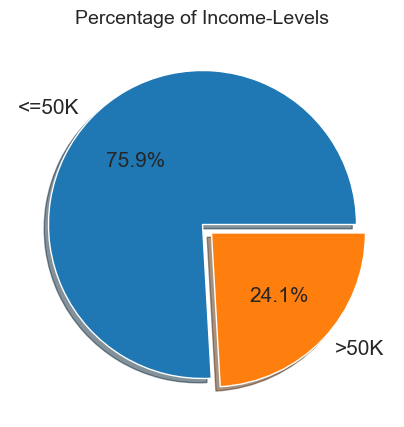

In [2401]:
plt.pie(data=df, x=df.salary.value_counts(), 
        labels=df.salary.value_counts().index, 
        autopct=lambda x: f'{round(x, 1)}%',
        explode=(0, 0.08), shadow=True)
plt.title('Percentage of Income-Levels', fontsize=14)
plt.show()

## 0.5. Numeric Features

### 0.5.1. age

**Check the boxplot to see extreme values**

In [2402]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

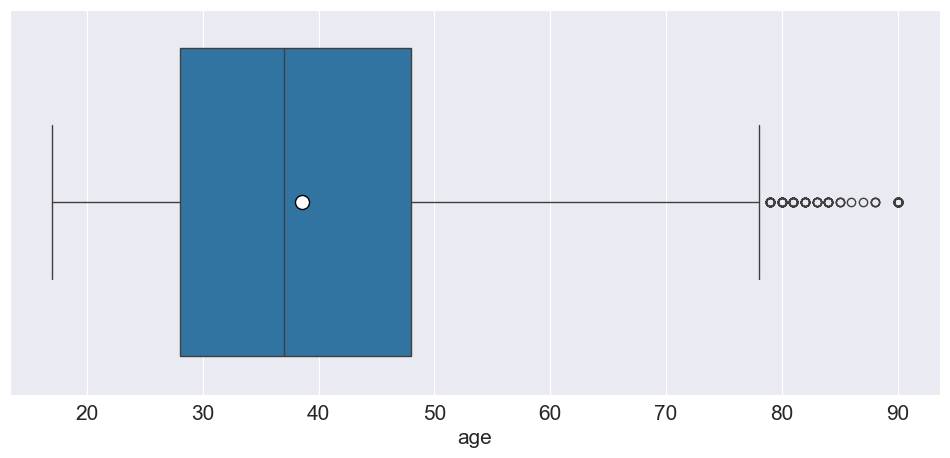

In [2403]:
sns.boxplot(data=df, x='age', showmeans=True);

**Check the histplot/kdeplot to see distribution of feature**

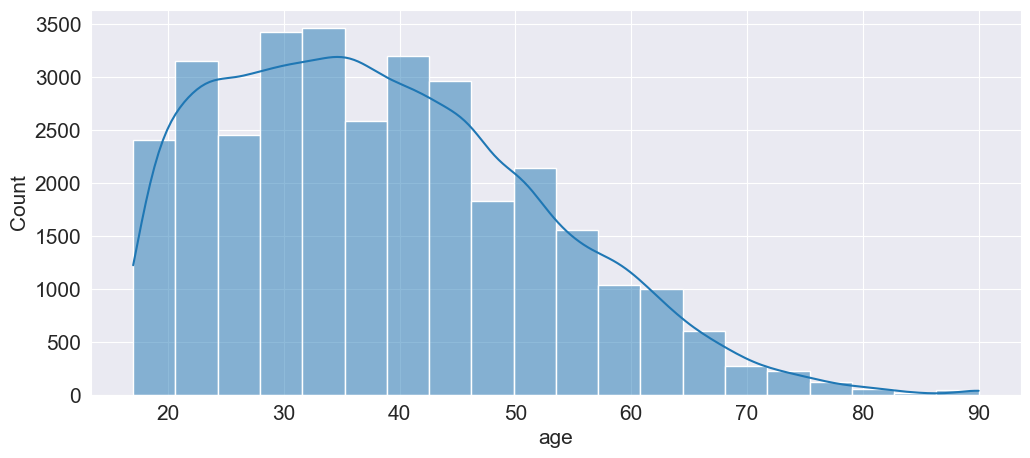

In [2404]:
sns.histplot(data=df, x='age', kde=True, bins=20);

**Check the statistical values**

In [2405]:
df.age.describe()

count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

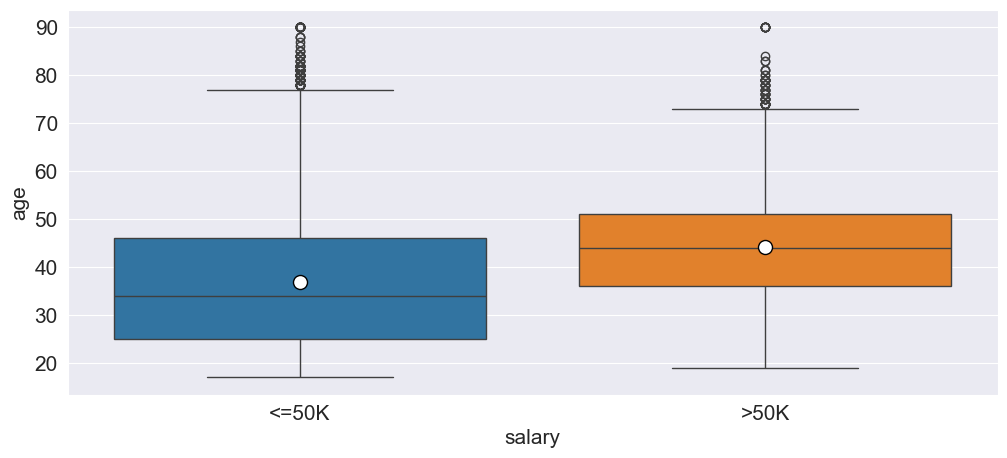

In [2406]:
sns.boxplot(data=df, y='age', x='salary', palette='tab10', showmeans=True);

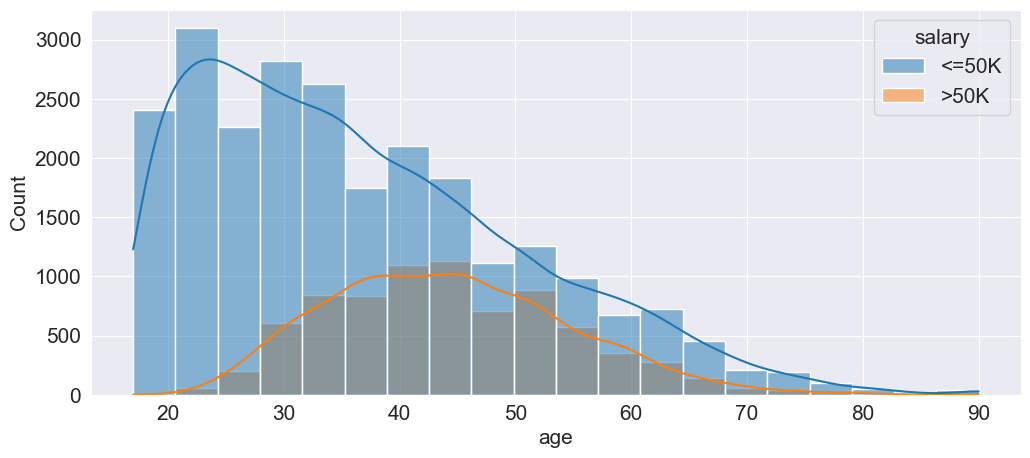

In [2407]:
sns.histplot(data=df, x='age', hue='salary', kde=True, bins=20);

In [2408]:
display(sns.color_palette("tab10", 8))
mean_lower_50 = sns.color_palette("tab10", 8)[0]
median_lower_50 = sns.color_palette("tab10", 8)[3]
mean_higher_50 = sns.color_palette("tab10", 8)[1]
median_higher_50 = sns.color_palette("tab10", 8)[2]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]

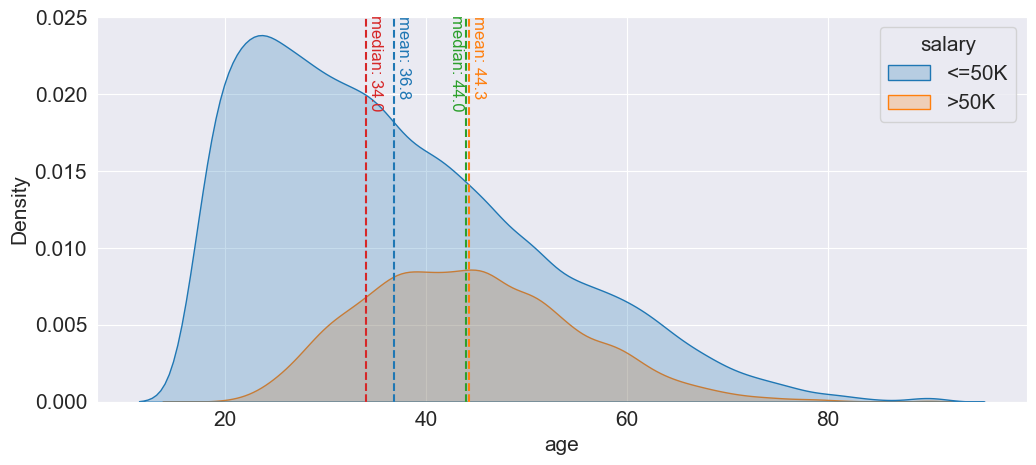

In [2409]:
ax = sns.kdeplot(data=df, x='age', hue='salary', fill=True)

# add extra lines:
ax.axvline(x=df[df.salary == '<=50K'].age.mean(), ls='--', color=mean_lower_50)
ax.axvline(x=df[df.salary == '<=50K'].age.median(), ls='--', color=median_lower_50)
ax.axvline(x=df[df.salary == '>50K'].age.mean(), ls='--', color=mean_higher_50)
ax.axvline(x=df[df.salary == '>50K'].age.median(), ls='--', color=median_higher_50)

# annotate the lines:
ax.annotate(text=f"mean: {round(df[df.salary == '<=50K'].age.mean(), 1)}", 
            xy=(df[df.salary == '<=50K'].age.mean()+1, 0.0197), 
            ha='center', va='bottom', rotation=270, fontsize=12, color=mean_lower_50)
ax.annotate(text=f"median: {round(df[df.salary == '<=50K'].age.median(), 1)}", 
            xy=(df[df.salary == '<=50K'].age.median()+1, 0.0189), 
            ha='center', va='bottom', rotation=270, fontsize=12, color=median_lower_50);
ax.annotate(text=f"mean: {round(df[df.salary == '>50K'].age.mean(), 1)}", 
            xy=(df[df.salary == '>50K'].age.mean()+1, 0.0197), 
            ha='center', va='bottom', rotation=270, fontsize=12, color=mean_higher_50)
ax.annotate(text=f"median: {round(df[df.salary == '>50K'].age.median(), 1)}", 
            xy=(df[df.salary == '>50K'].age.median()-1, 0.0189), 
            ha='center', va='bottom', rotation=270, fontsize=12, color=median_higher_50);

**Check the statistical values by "salary" levels**

In [2410]:
df.groupby('salary').age.describe()

count   mean    std    min    25%    50%    75%    max
salary                                                           
<=50K  24698.000 36.787 14.017 17.000 25.000 34.000 46.000 90.000
>50K    7839.000 44.251 10.520 19.000 36.000 44.000 51.000 90.000

In [2411]:
print('skewness values:')
print(f'for salary <=50K: {round(stats.skew(df[df.salary == '<=50K'].age), 2)}')
print(f'for salary >50K : {round(stats.skew(df[df.salary == '>50K'].age), 2)}')

skewness values:
for salary <=50K: 0.76
for salary >50K : 0.48


### 0.5.2. fnlwgt

**Check the boxplot to see extreme values**

In [2412]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

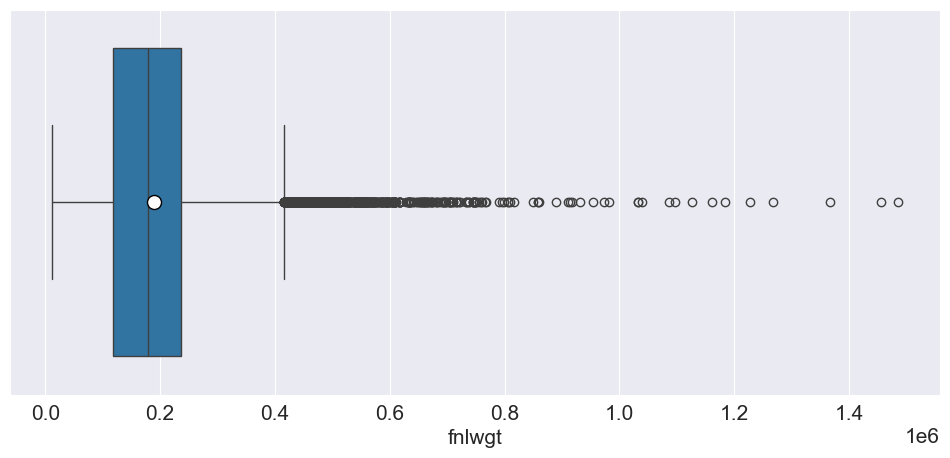

In [2413]:
sns.boxplot(data=df, x='fnlwgt', showmeans=True);

**Check the histplot/kdeplot to see distribution of feature**

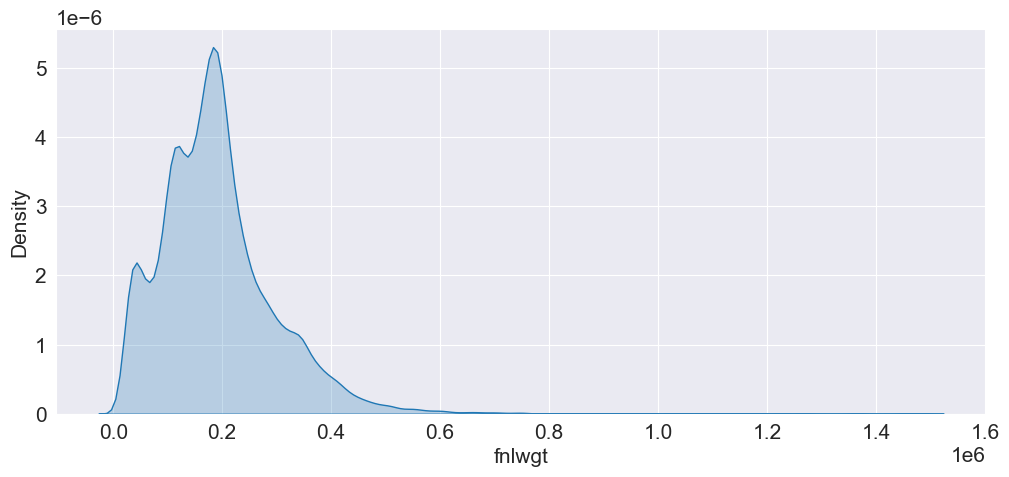

In [2414]:
sns.kdeplot(data=df, x='fnlwgt', fill=True);

**Check the statistical values**

In [2415]:
df.fnlwgt.describe()

count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

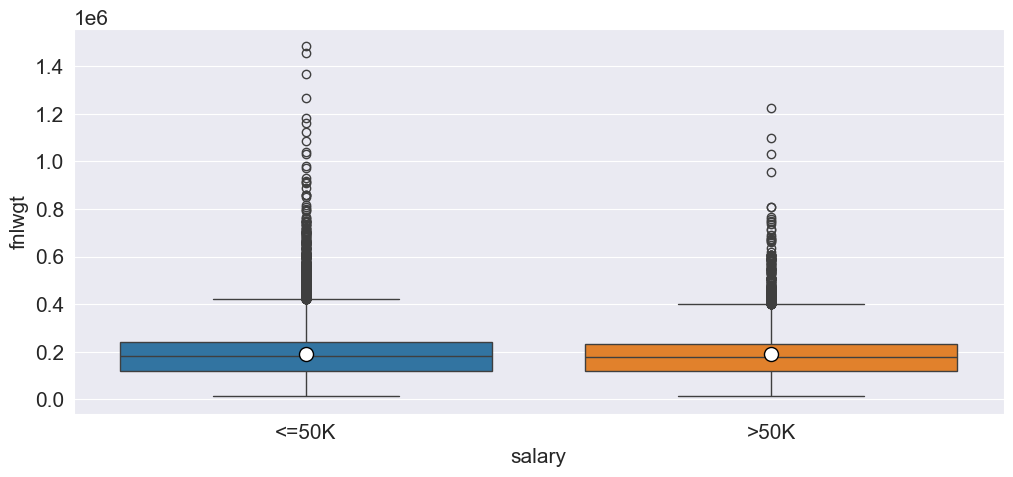

In [2416]:
sns.boxplot(data=df, y='fnlwgt', x='salary', showmeans=True, palette='tab10');

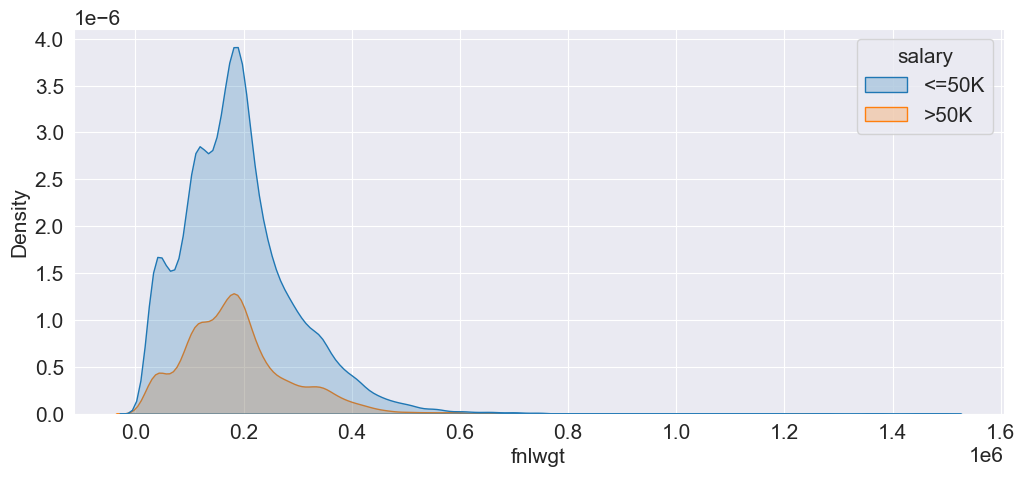

In [2417]:
ax = sns.kdeplot(data=df, x='fnlwgt', hue='salary', fill=True)

**Check the statistical values by "salary" levels**

In [2418]:
df.groupby('salary').fnlwgt.describe()

count       mean        std       min        25%        50%  \
salary                                                                   
<=50K  24698.000 190345.927 106487.413 12285.000 117606.000 179465.000   
>50K    7839.000 188000.481 102554.464 14878.000 119100.000 176063.000   

              75%         max  
salary                         
<=50K  238968.250 1484705.000  
>50K   230969.000 1226583.000

### 0.5.3. capital_gain

**Check the boxplot to see extreme values**

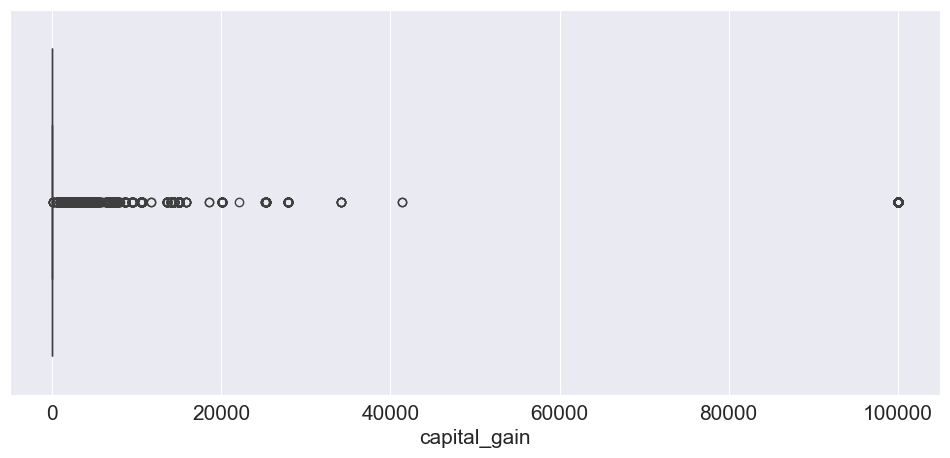

In [2419]:
sns.boxplot(data=df, x='capital_gain');

**Check the histplot/kdeplot to see distribution of feature**

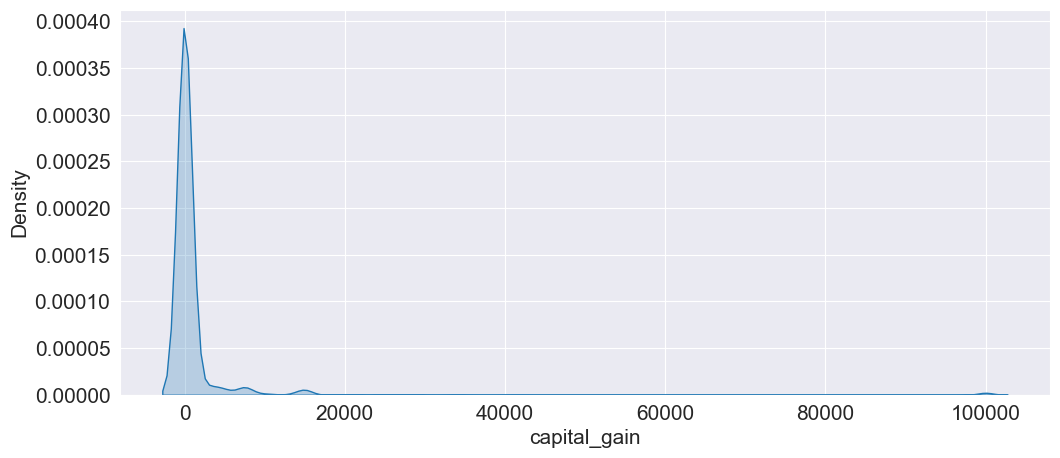

In [2420]:
sns.kdeplot(data=df, x='capital_gain', fill=True);

**Check the statistical values**

In [2421]:
df.capital_gain.describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

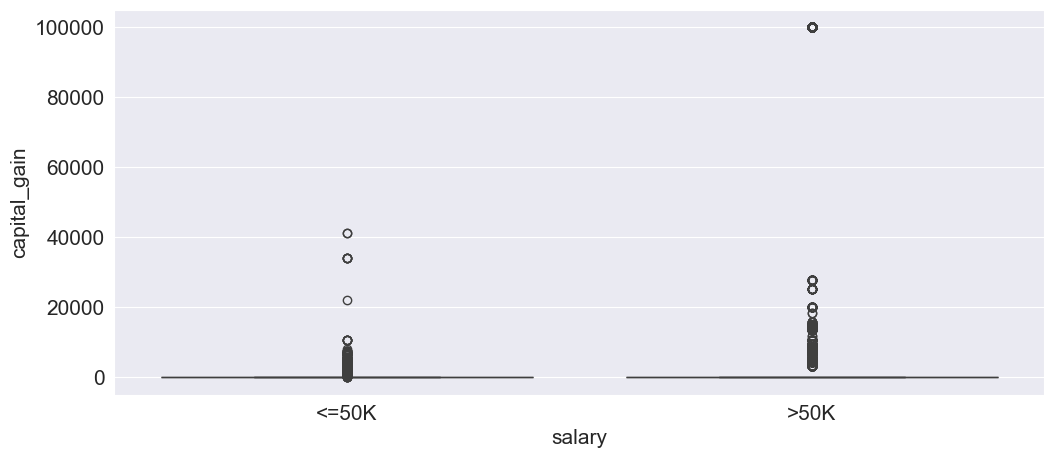

In [2422]:
sns.boxplot(data=df, y='capital_gain', x='salary');

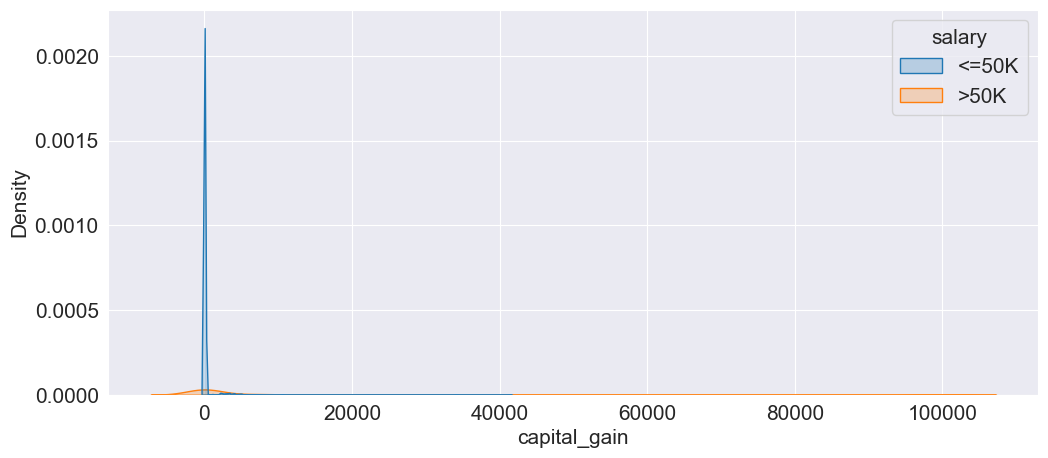

In [2423]:
sns.kdeplot(data=df, x='capital_gain', hue='salary', fill=True);

**Check the statistical values by "salary" levels**

In [2424]:
df.groupby('salary').capital_gain.describe()

count     mean       std   min   25%   50%   75%       max
salary                                                               
<=50K  24698.000  148.885   963.558 0.000 0.000 0.000 0.000 41310.000
>50K    7839.000 4007.165 14572.097 0.000 0.000 0.000 0.000 99999.000

**Check the statistical values by "salary" levels for capital_gain not equal the zero**

In [2425]:
df[df.capital_gain != 0].groupby('salary').capital_gain.describe()

count      mean       std      min      25%      50%       75%  \
salary                                                                     
<=50K  1035.000  3552.813  3173.419  114.000 2202.000 3273.000  4101.000   
>50K   1677.000 18731.165 26778.676 3103.000 7298.000 7896.000 15024.000   

             max  
salary            
<=50K  41310.000  
>50K   99999.000

In [2426]:
df[df.capital_gain == 99999].capital_gain  # Length: 159 !!!

1246     99999
1368     99999
1482     99999
1528     99999
1616     99999
         ...  
31828    99999
31972    99999
32090    99999
32238    99999
32518    99999
Name: capital_gain, Length: 159, dtype: int64

### 0.5.4. capital_loss

**Check the boxplot to see extreme values**

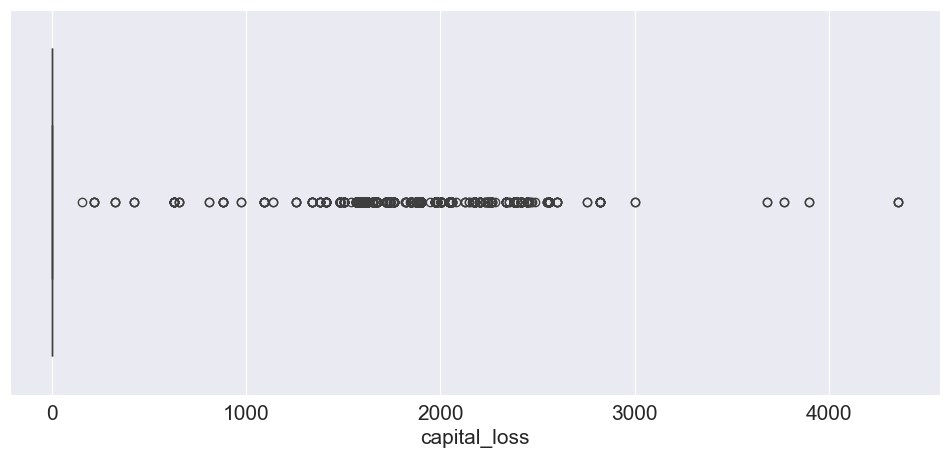

In [2427]:
sns.boxplot(data=df, x='capital_loss');

**Check the histplot/kdeplot to see distribution of feature**

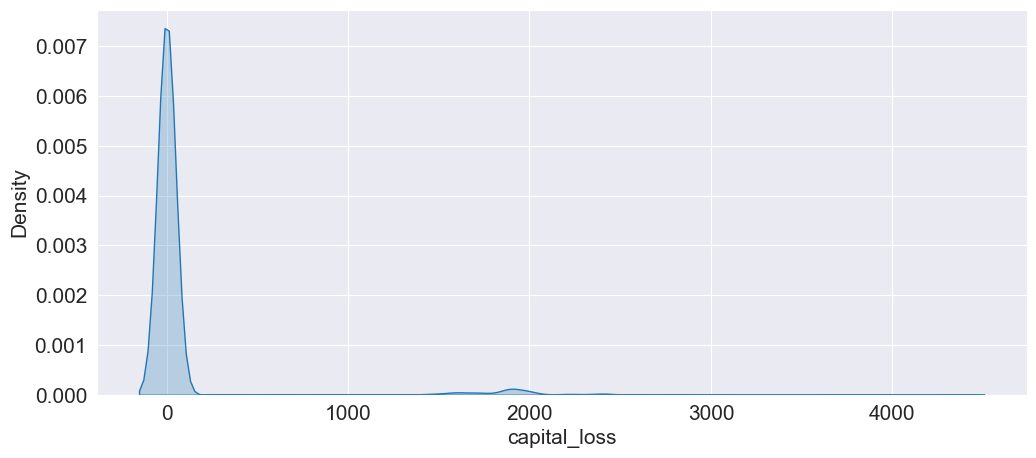

In [2428]:
sns.kdeplot(data=df, x='capital_loss', fill=True);

**Check the statistical values**

In [2429]:
df.capital_loss.describe()

count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

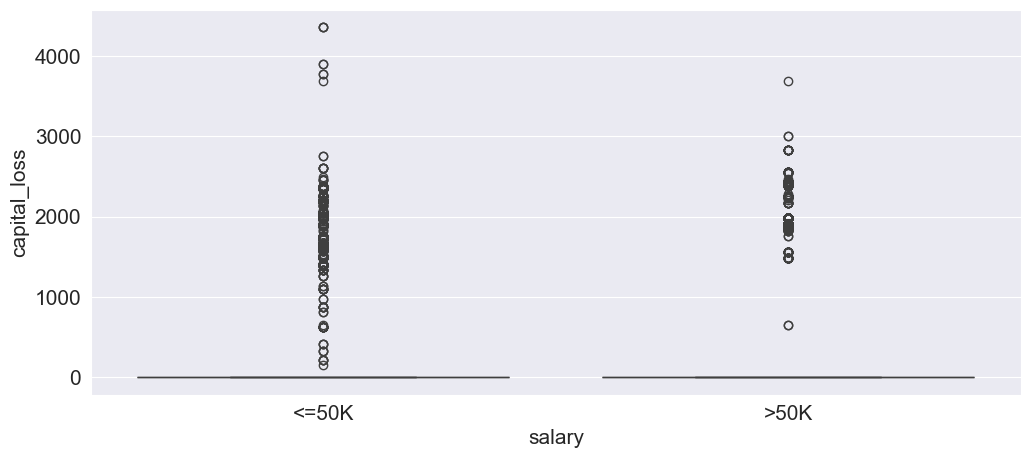

In [2430]:
sns.boxplot(data=df, x='salary', y='capital_loss');

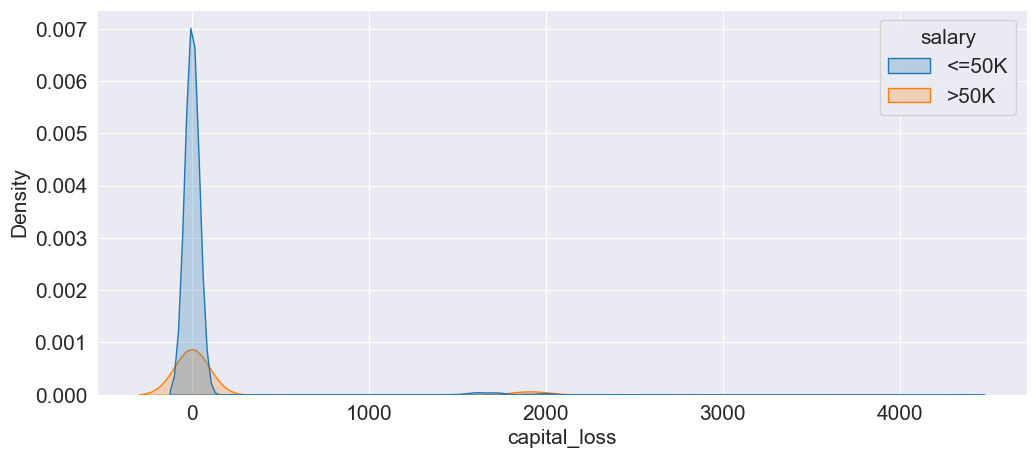

In [2431]:
sns.kdeplot(data=df, x='capital_loss', hue='salary', fill=True);

**Check the statistical values by "salary" levels**

In [2432]:
df.groupby('salary').capital_loss.describe()

count    mean     std   min   25%   50%   75%      max
salary                                                           
<=50K  24698.000  53.190 310.890 0.000 0.000 0.000 0.000 4356.000
>50K    7839.000 195.051 595.555 0.000 0.000 0.000 0.000 3683.000

**Check the statistical values by "salary" levels for capital_loss not equel the zero**

In [2433]:
df[df.capital_loss != 0].groupby('salary').capital_loss.describe()

count     mean     std     min      25%      50%      75%      max
salary                                                                     
<=50K  746.000 1760.983 438.906 155.000 1590.000 1721.000 1980.000 4356.000
>50K   773.000 1978.017 264.144 653.000 1887.000 1902.000 1977.000 3683.000

### 0.5.5. hours_per_week

**Check the boxplot to see extreme values**

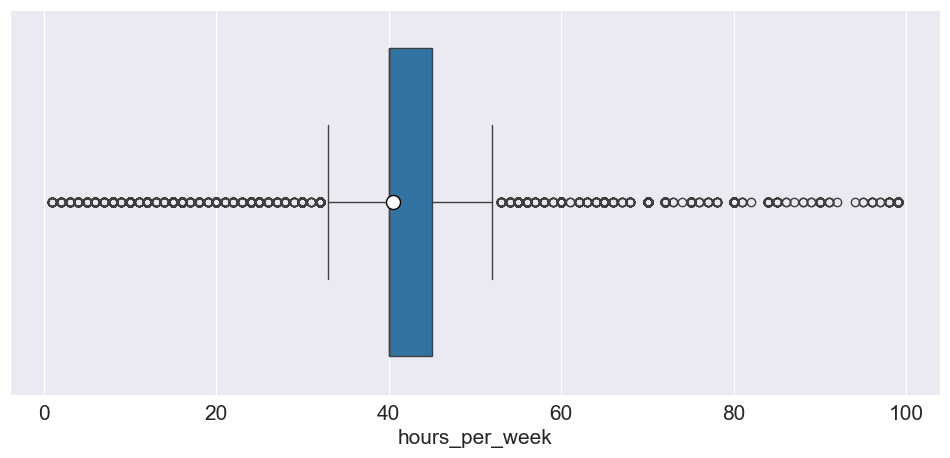

In [2434]:
sns.boxplot(data=df, x='hours_per_week', showmeans=True);

**Check the histplot/kdeplot to see distribution of feature**

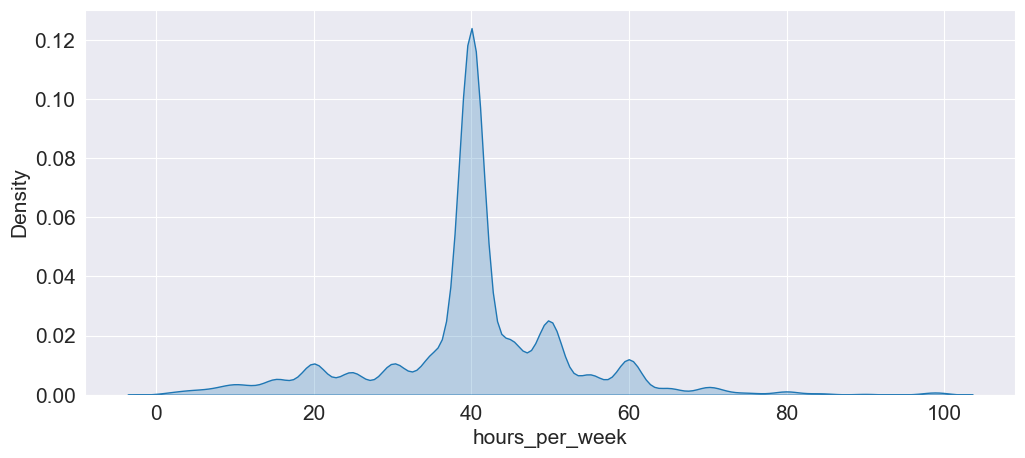

In [2435]:
sns.kdeplot(data=df, x='hours_per_week', fill=True);

**Check the statistical values**

In [2436]:
df.hours_per_week.describe()

count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

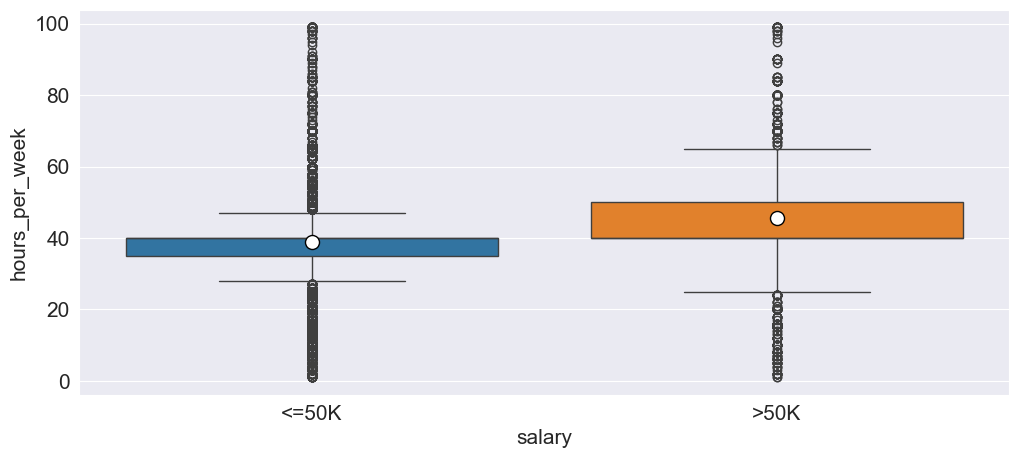

In [2437]:
sns.boxplot(data=df, x='salary', y='hours_per_week', showmeans=True, palette='tab10');

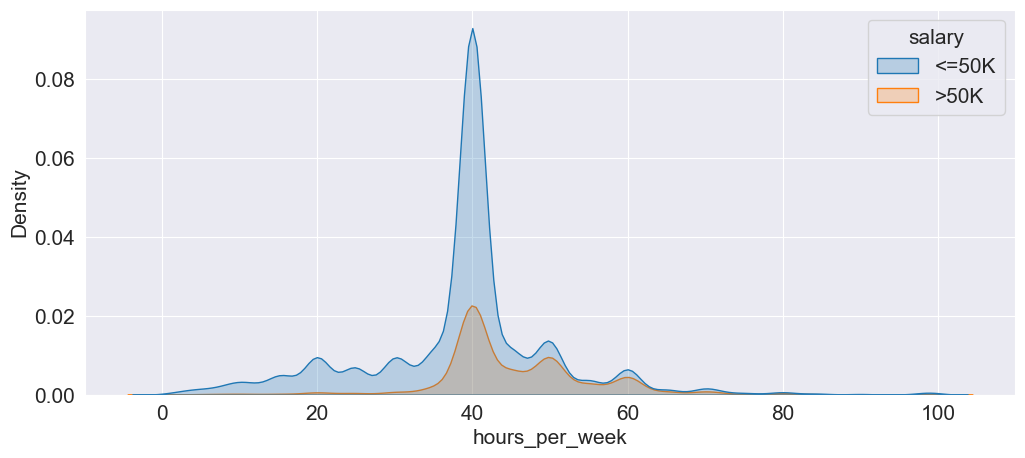

In [2438]:
sns.kdeplot(data=df, x='hours_per_week', hue='salary', fill=True);

**Check the statistical values by "salary" levels**

In [2439]:
df.groupby('salary').hours_per_week.describe()

count   mean    std   min    25%    50%    75%    max
salary                                                          
<=50K  24698.000 38.843 12.318 1.000 35.000 40.000 40.000 99.000
>50K    7839.000 45.473 11.014 1.000 40.000 40.000 50.000 99.000

In [2440]:
print(f"number of people that work 1 hour per week: {df[df.hours_per_week == 1].hours_per_week.count()}")
print(f"number of people that work 99 hours per week: {df[df.hours_per_week == 99].hours_per_week.count()}")
print(f"number of people that work less than 5 hours per week: {df[df.hours_per_week < 5].hours_per_week.count()}")
print(f"number of people that work greater than 80 hours per week: {df[df.hours_per_week > 80].hours_per_week.count()}")

number of people that work 1 hour per week: 20
number of people that work 99 hours per week: 85
number of people that work less than 5 hours per week: 145
number of people that work greater than 80 hours per week: 208


### 0.5.6. See the relationship between each numeric features by target feature (salary) in one plot basically

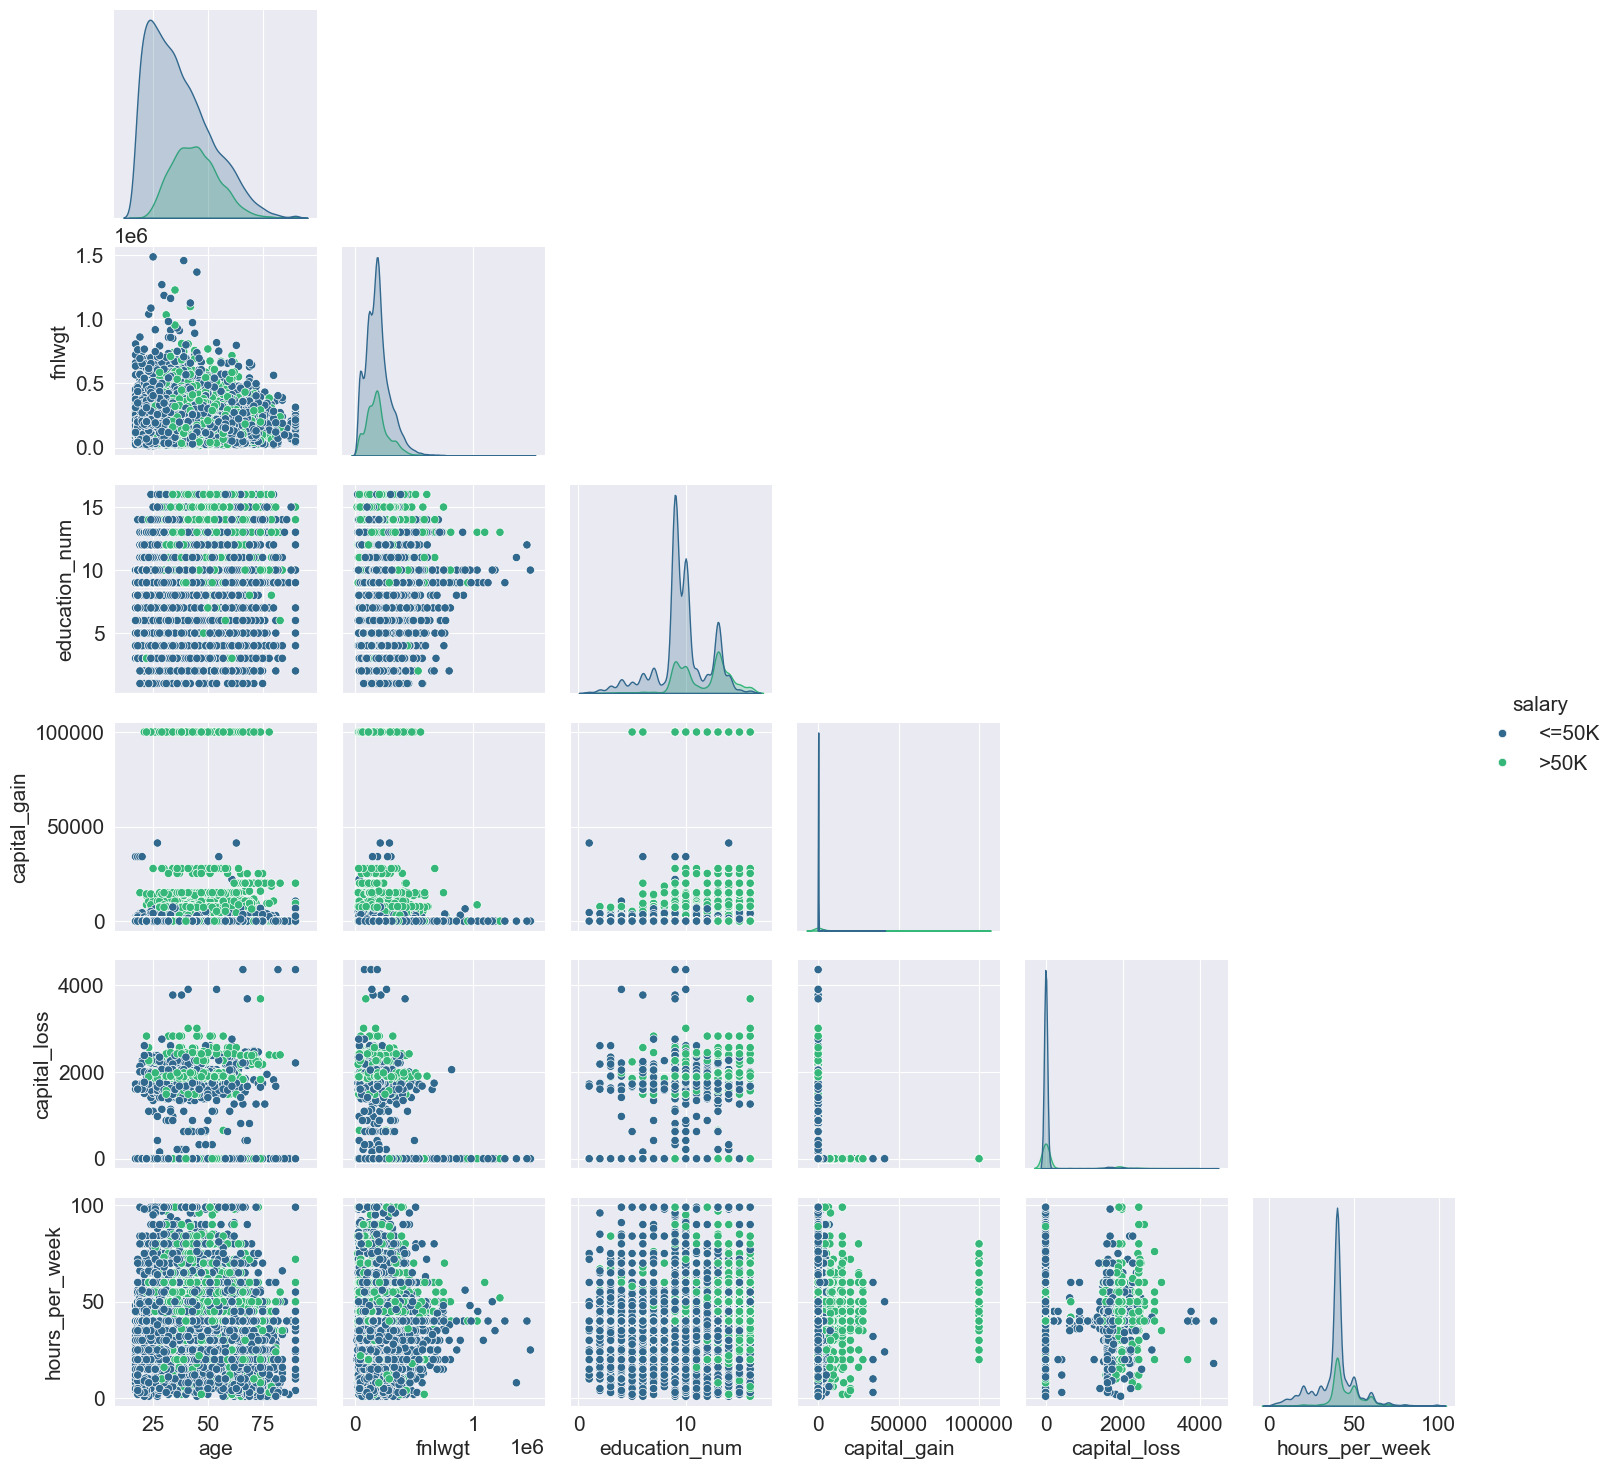

In [2441]:
sns.pairplot(data=df, palette='viridis', hue='salary', corner=True);

## 0.6. Categorical Features

### 0.6.1. education & education_num

**Detect the similarities between these features by comparing unique values**

In [2442]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [2443]:
df.education.value_counts(dropna=False)

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

In [2444]:
df.education_num.value_counts(dropna=False)

education_num
9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: count, dtype: int64

In [2445]:
df.groupby(['education', 'education_num'], dropna=False).education_num.apply(len)
# so we can assign a value for NaNs in education_num feature according to output below.

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

**Visualize the count of person in each categories for these features (education, education_num) separately**

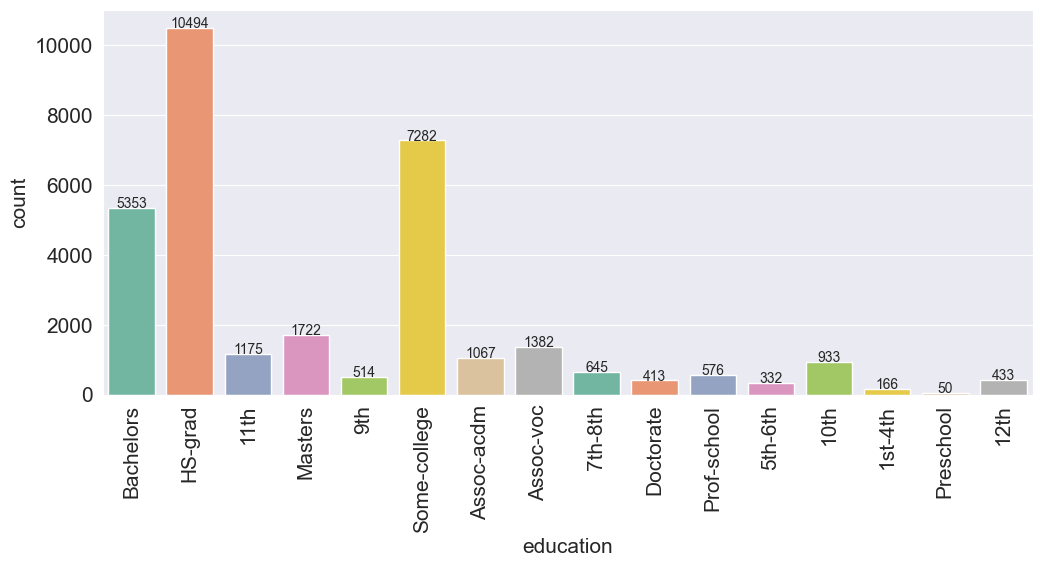

In [2446]:
ax = sns.countplot(data=df, x='education', palette='Set2')
ax.tick_params(axis='x', rotation=90)

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()), ha='center', fontsize=10)

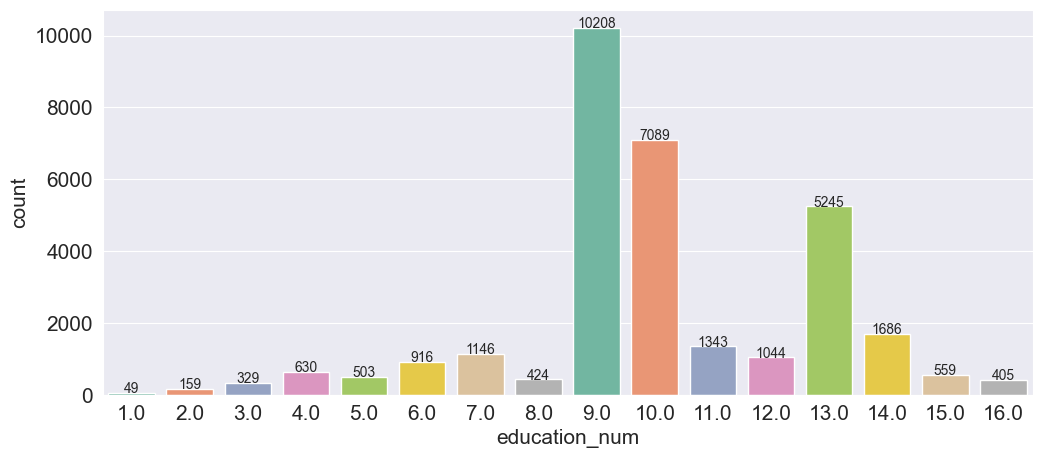

In [2447]:
ax = sns.countplot(data=df, x='education_num', palette='Set2')

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()), ha='center', fontsize=10)

**Check the count of person in each "salary" levels by these features (education and education_num) separately and visualize them with countplot**

In [2448]:
df.groupby(['education', 'salary']).salary.apply(len)

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     <=50K      107
              >50K       306
HS-grad       <=50K     8820
              >50K      1674
Masters       <=50K      763
              >50K       959
Preschool     <=50K       50
Prof-school   <=50K      153
              >50K       423
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

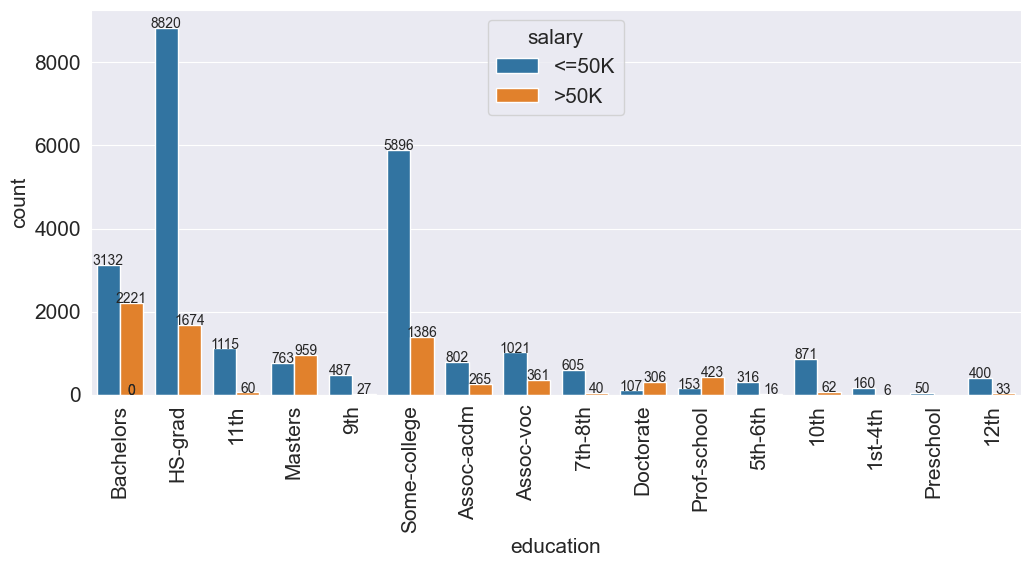

In [2449]:
ax = sns.countplot(data=df, x='education', hue='salary')
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper center', title='salary')

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.2, p.get_height()), ha='center', fontsize=10)


In [2450]:
df.groupby(['education_num', 'salary']).salary.apply(len)

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         <=50K      751
               >50K       935
15.000         <=50K      149
               >50K       410
16.000         <=50K      103
               >50K       302
Name: salary, dtype: int64

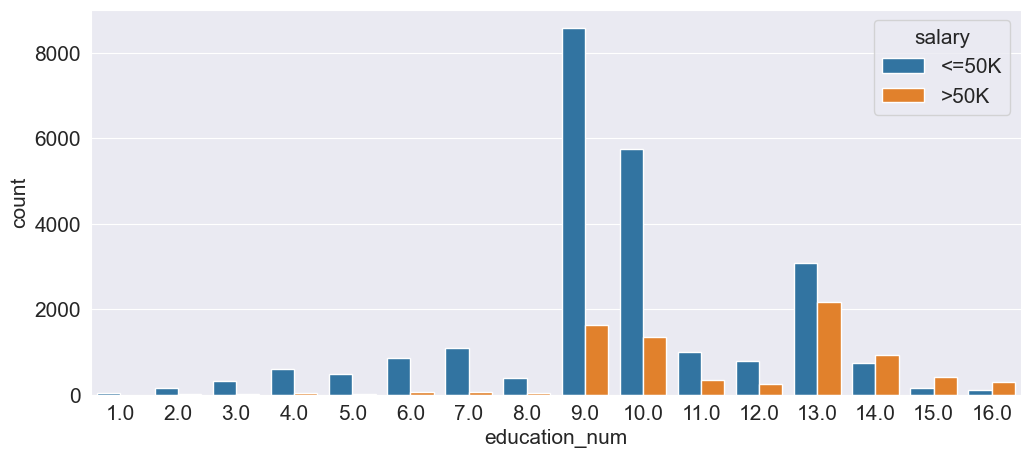

In [2451]:
ax = sns.countplot(data=df, x='education_num', hue='salary')

**Visualize the boxplot of "education_num" feature by "salary" levels**

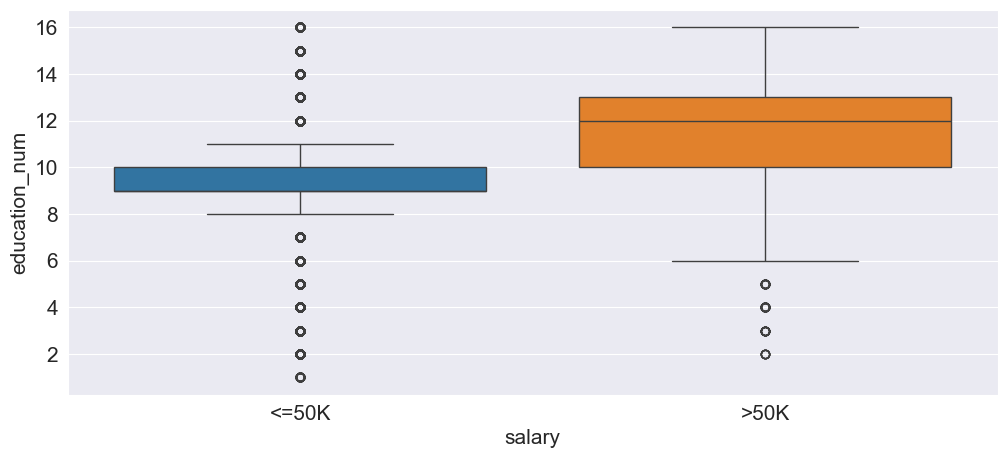

In [2452]:
sns.boxplot(data=df, x='salary', y='education_num', palette='tab10');

**Decrease the number of categories in "education" feature as low, medium, and high level and create a new feature with this new categorical data.**

In [2453]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [2454]:
df.education.apply(mapping_education).value_counts()

education
medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: count, dtype: int64

In [2455]:
df['education_category'] = df.education.apply(mapping_education)

In [2456]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country salary  \
0          2174             0              40  United-States  <=50K   
1             0             0              13  United-States  <=50K   
2             0             0              40  United-States  <=50K   
3             0             0              40  United-States  <=50K   
4             0             0              40           Cuba  <=50K   

   education_category  
0    high_level_grade  
1    high_level_grade  
2  medium_level_grade  
3     low_level_grade  
4    high_level_grade

**Visualize the count of person in each categories for these new education levels (high, medium, low)**

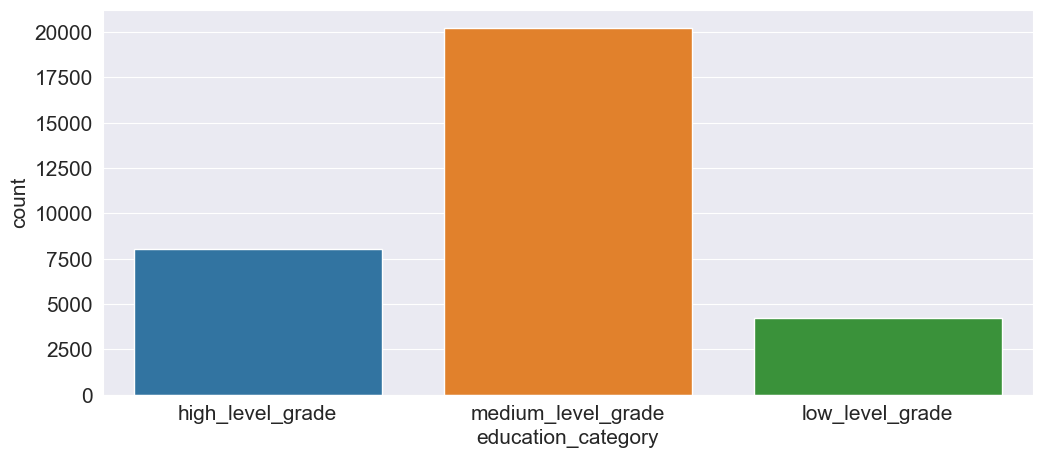

In [2457]:
sns.countplot(data=df, x='education_category', palette='tab10');

**Check the count of person in each "salary" levels by these new education levels(high, medium, low) and visualize it with countplot**

In [2458]:
df.groupby(['education_category', 'salary']).salary.apply(len)

education_category  salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

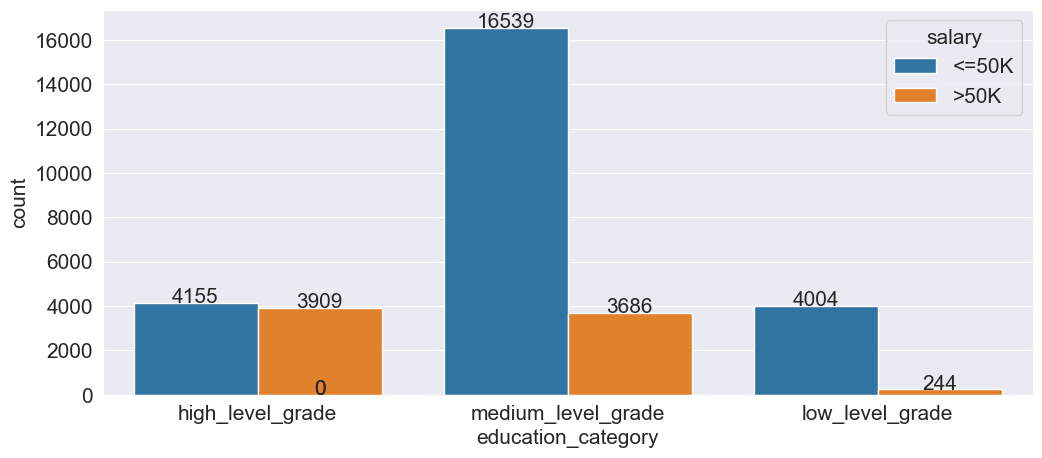

In [2459]:
ax = sns.countplot(data=df, x='education_category', hue='salary')

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.2, p.get_height()), ha='center')

**Check the percentage distribution of person in each "salary" levels by each new education levels (high, medium, low) and visualize it with pie plot separately**

In [2460]:
df.groupby('education_category').salary.value_counts(normalize=True)

education_category  salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: proportion, dtype: float64

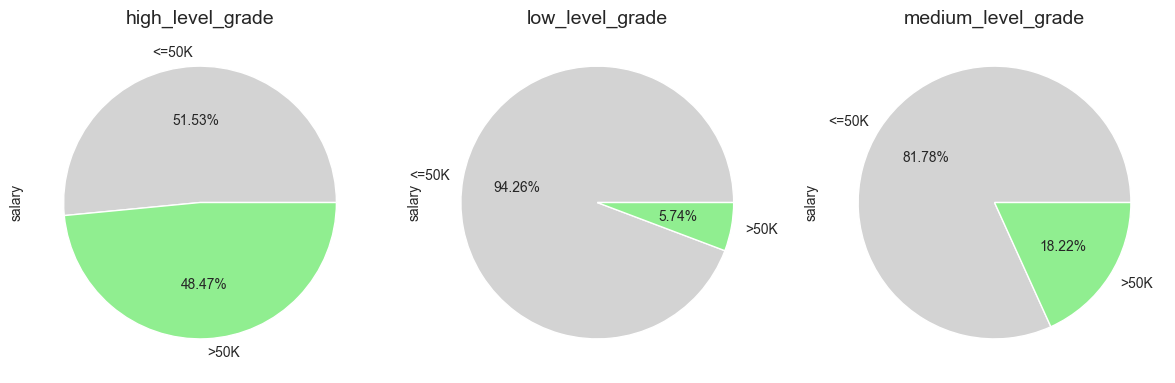

In [2461]:
a = df.groupby('education_category').salary.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=3)
for i in range(3):
    ax[i].pie(data=df, 
              x=a[a.index[::2][i][0]],
              autopct='%.2f%%',
              labels=['<=50K', '>50K'], 
              textprops={'fontsize': 10}, colors=['lightgray', 'lightgreen'])
    ax[i].set_title(a.index[::2][i][0]); ax[i].title.set_fontsize(14)
    ax[i].set_ylabel('salary', fontsize=10)
plt.tight_layout();

**Check the count of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with countplot**

In [2462]:
df.groupby('salary').education_category.value_counts()

salary  education_category
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: count, dtype: int64

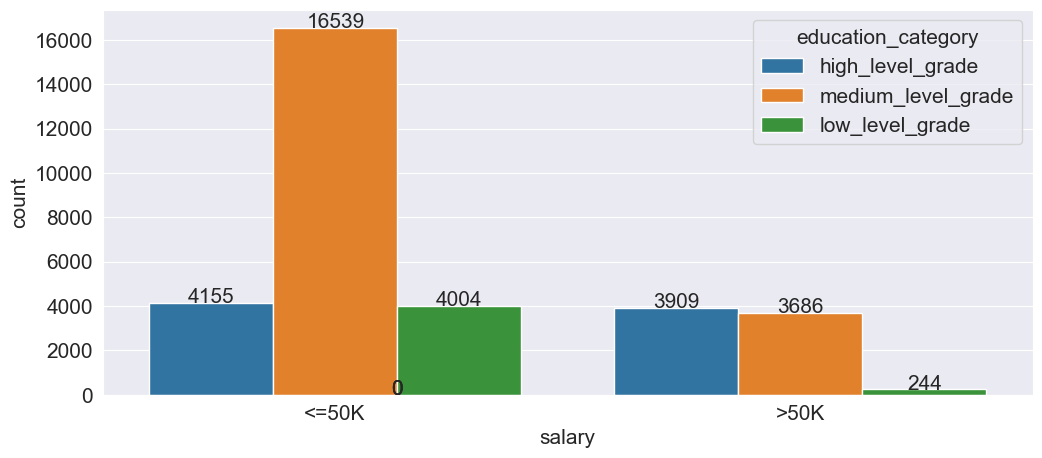

In [2463]:
ax = sns.countplot(data=df, x='salary', hue='education_category')

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.134, p.get_height()), ha='center')

**Check the the percentage distribution of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with pie plot separately**

In [2464]:
df.groupby('salary').education_category.value_counts(normalize=True)

# alternative way:
# a = df.groupby(['salary', 'education_category']).education_category.count()
# a.groupby(level=0).transform(lambda x: x / x.sum())

salary  education_category
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: proportion, dtype: float64

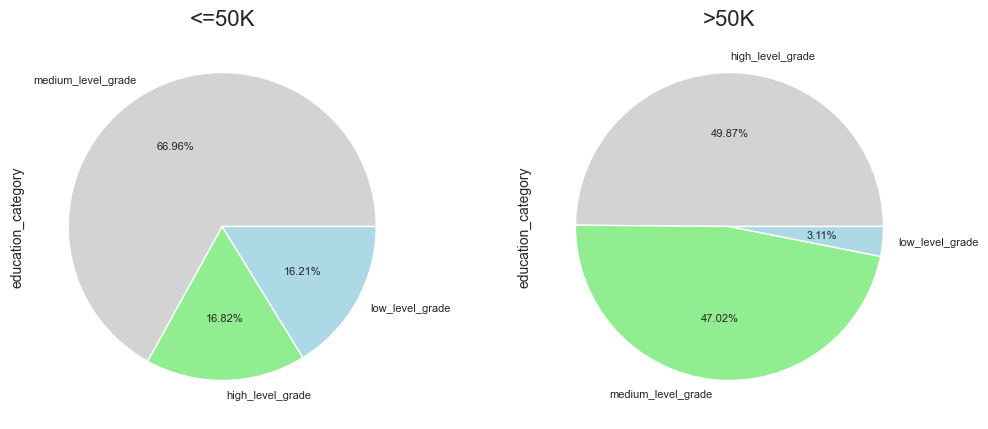

In [2465]:
a = df.groupby('salary').education_category.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(2):
    ax[i].pie(data=df, 
              x=a[a.index[::3][i][0]],
              autopct=lambda x: f'{round(x, 2)}%',
              labels=a['<=50K'].index if i == 0 else a['>50K'].index,
              textprops={'fontsize': 8}, colors=['lightgray', 'lightgreen', 'lightblue'])
    ax[i].set_title(a.index[::3][i][0]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('education_category', fontsize=10)

In [2466]:
a = df.groupby('salary').education_category.value_counts(normalize=True)
a_new = a.reset_index(level=[0,1]).sort_values(by=['salary', 'education_category']); a_new

salary  education_category  proportion
1  <=50K    high_level_grade       0.168
2  <=50K     low_level_grade       0.162
0  <=50K  medium_level_grade       0.670
3   >50K    high_level_grade       0.499
5   >50K     low_level_grade       0.031
4   >50K  medium_level_grade       0.470

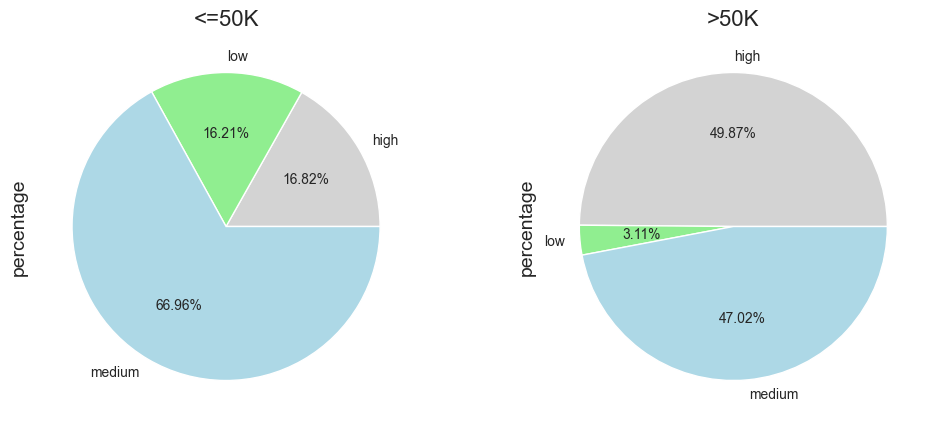

In [2467]:
fig, ax = plt.subplots(nrows=1, ncols=2)
for i, k in enumerate([0,3]):
    ax[i].pie(data=a_new, x=a_new.proportion.values[k:k+3], 
              labels=['high', 'low', 'medium'], textprops={'fontsize': 10},
              autopct="%.2f%%", colors=["lightgray", "lightgreen", "lightblue"])
    ax[i].set_title(a_new.salary.values[k]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('percentage', fontsize=14)

### 0.6.2. marital_status & relationship

**Detect the similarities between these features by comparing unique values**

In [2468]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country salary  \
0          2174             0              40  United-States  <=50K   
1             0             0              13  United-States  <=50K   
2             0             0              40  United-States  <=50K   
3             0             0              40  United-States  <=50K   
4             0             0              40           Cuba  <=50K   

   education_category  
0    high_level_grade  
1    high_level_grade  
2  medium_level_grade  
3     low_level_grade  
4    high_level_grade

In [2469]:
df.marital_status.value_counts(dropna=False)

marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [2470]:
df.relationship.value_counts(dropna=False)

relationship
Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [2471]:
df.relationship.fillna('Unknown', inplace=True)

In [2472]:
df.groupby('relationship').marital_status.value_counts()

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

**Visualize the count of person in each categories**

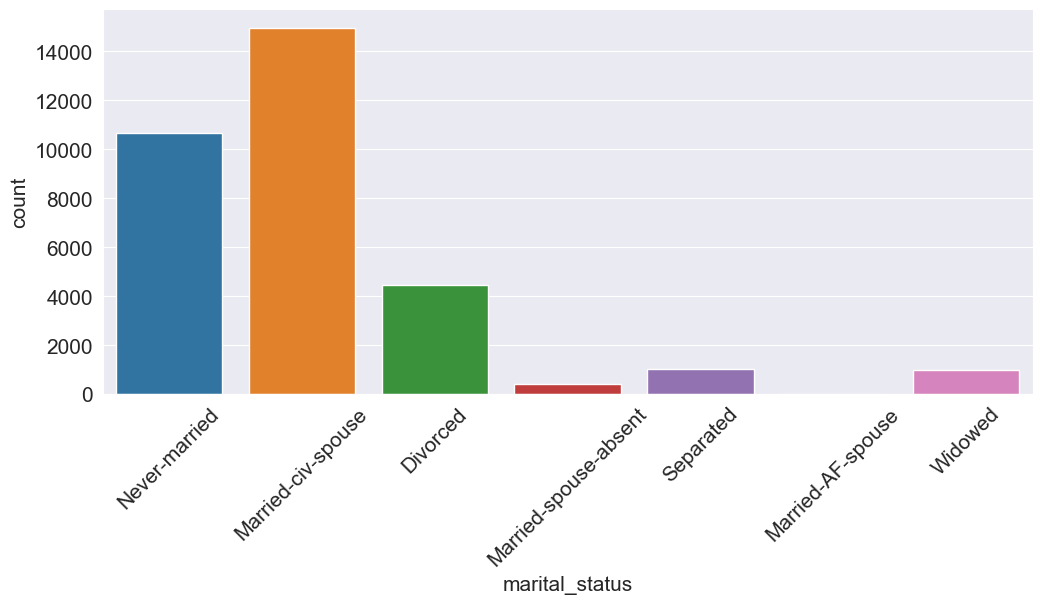

In [2473]:
ax = sns.countplot(data=df, x='marital_status', palette='tab10')
ax.tick_params(axis='x', rotation=45)

**Check the count of person in each "salary" levels by categories and visualize it with countplot**

In [2474]:
df.groupby('marital_status').salary.value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: count, dtype: int64

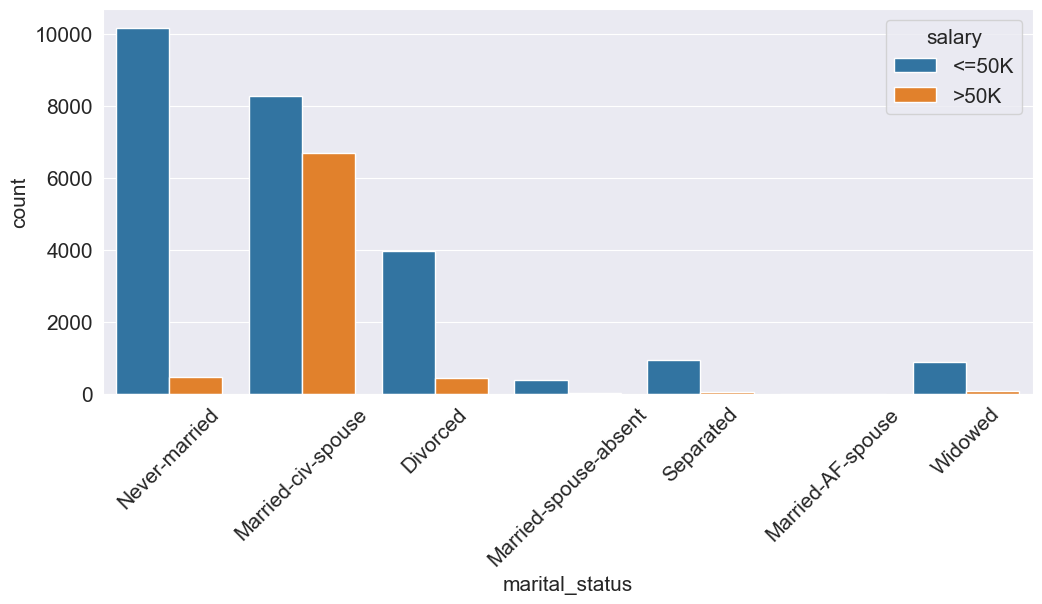

In [2475]:
ax = sns.countplot(data=df, x='marital_status', hue='salary')
ax.tick_params(axis='x', rotation=45)

**Decrease the number of categories in "marital_status" feature as married, and unmarried and create a new feature with this new categorical data**

In [2476]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [2477]:
df.marital_status.apply(mapping_marital_status).value_counts()

marital_status
unmarried    17126
married      15411
Name: count, dtype: int64

In [2478]:
df['marital_status_summary'] = df.marital_status.apply(mapping_marital_status)

In [2479]:
df.marital_status_summary.value_counts()

marital_status_summary
unmarried    17126
married      15411
Name: count, dtype: int64

**Visualize the count of person in each categories for these new marital status (married, unmarried)**

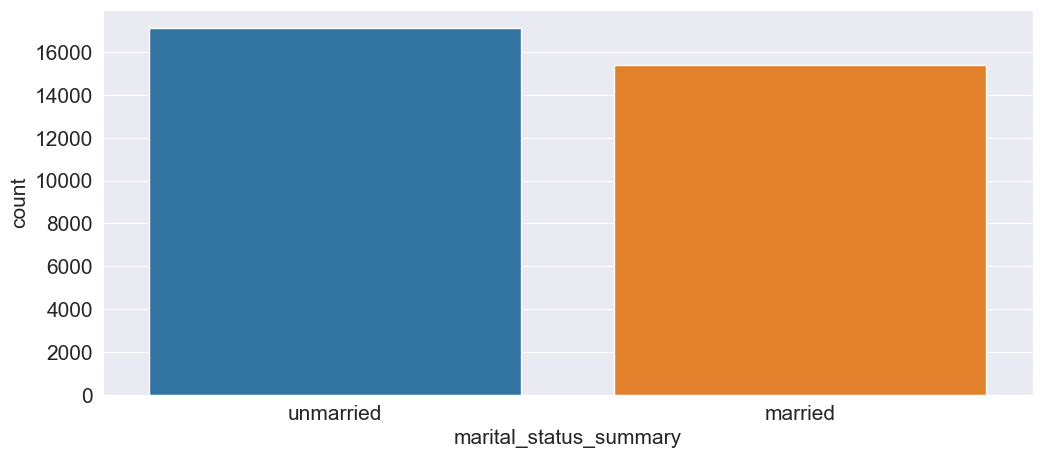

In [2480]:
sns.countplot(data=df, x='marital_status_summary', palette='tab10');

**Check the count of person in each "salary" levels by these new marital status (married, unmarried) and visualize it with countplot**

In [2481]:
df.groupby('marital_status_summary').salary.value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: count, dtype: int64

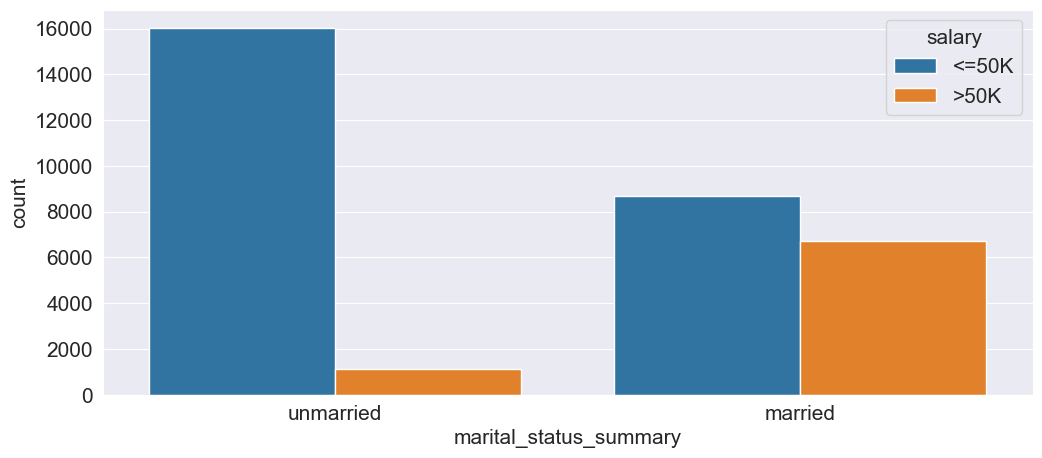

In [2482]:
sns.countplot(data=df, x='marital_status_summary', hue='salary');

**Check the percentage distribution of person in each "salary" levels by each new marital status (married, unmarried) and visualize it with pie plot separately**

In [2483]:
df.groupby('marital_status_summary').salary.value_counts(normalize=True)

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
unmarried               <=50K    0.935
                        >50K     0.065
Name: proportion, dtype: float64

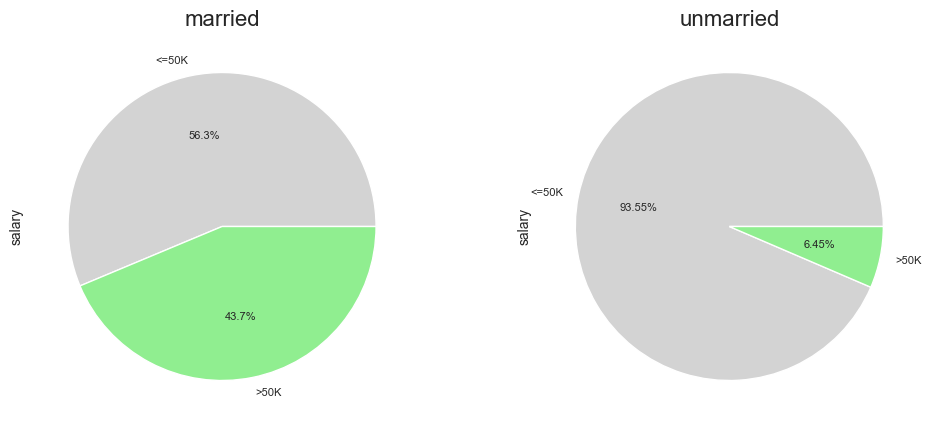

In [2484]:
a = df.groupby('marital_status_summary').salary.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(2):
    ax[i].pie(data=df, 
              x=a[a.index[::2][i][0]],
              autopct=lambda x: f'{round(x, 2)}%',
              labels=a['married'].index, 
              textprops={'fontsize': 8}, colors=['lightgray', 'lightgreen'])
    ax[i].set_title(a.index[::2][i][0]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('salary', fontsize=10)

**Check the count of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with countplot**

In [2485]:
df.groupby('salary').marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: count, dtype: int64

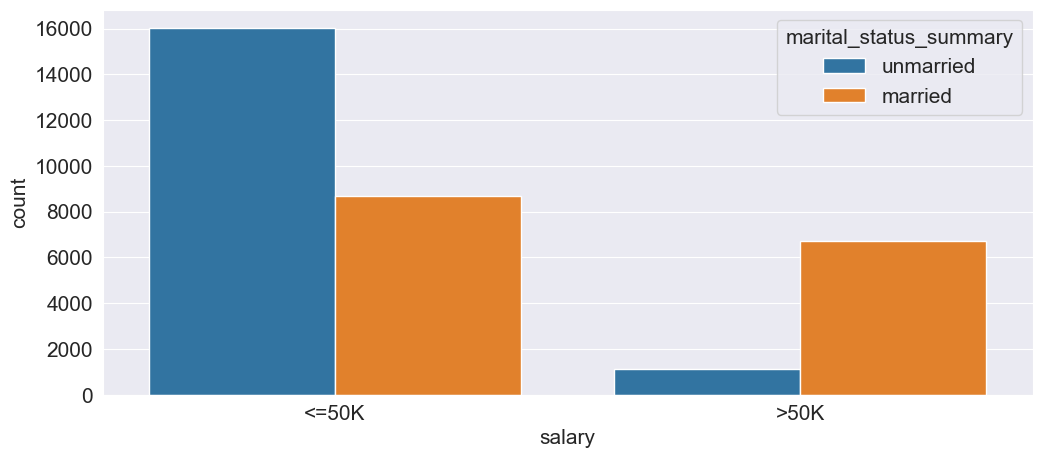

In [2486]:
sns.countplot(data=df, x='salary', hue='marital_status_summary');

**Check the the percentage distribution of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with pie plot separately**

In [2487]:
df.groupby('salary').marital_status_summary.value_counts(normalize=True)

salary  marital_status_summary
<=50K   unmarried                0.649
        married                  0.351
>50K    married                  0.859
        unmarried                0.141
Name: proportion, dtype: float64

In [2488]:
a = df.groupby('salary').marital_status_summary.value_counts(normalize=True)
a_new = a.reset_index(level=[0,1]).sort_values(by=['salary', 'marital_status_summary'])
a_new.rename(columns={"proportion": "percentage"}, inplace=True); a_new

salary marital_status_summary  percentage
1  <=50K                married       0.351
0  <=50K              unmarried       0.649
2   >50K                married       0.859
3   >50K              unmarried       0.141

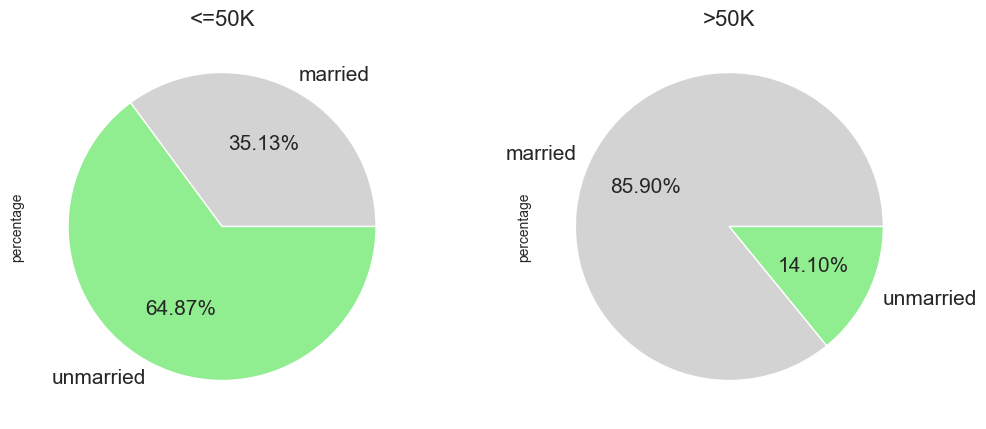

In [2489]:
fig, ax = plt.subplots(nrows=1, ncols=2)
for i, k in enumerate([0,2]):
    ax[i].pie(data=a_new, x=a_new.percentage[k:k+2], labels=a_new.marital_status_summary[0:2],
              autopct="%.2f%%", colors=['lightgray', 'lightgreen']);    
    ax[i].set_title(a_new.salary.values[k]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('percentage', fontsize=10)

### 0.6.3. workclass

**Check the count of person in each categories and visualize it with countplot**

In [2490]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors         13.000   
1   50  Self-emp-not-inc   83311  Bachelors         13.000   
2   38           Private  215646    HS-grad          9.000   
3   53           Private  234721       11th          7.000   
4   28           Private  338409  Bachelors         13.000   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country salary  \
0          2174             0              40  United-States  <=50K   
1             0             0              13  United-States  <=50K   
2             0             0              40  United-States  <=50K   
3             0             0              40  United-States  <=50K   
4             0             0              40           Cuba  <=50K   

   education_category marital_status_summary  
0    high_level_grade              unmarried  
1    high_level_grade                married  
2  medium_level_grade              unmarried  
3     low_level_grade                married  
4    high_level_grade                married

In [2491]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

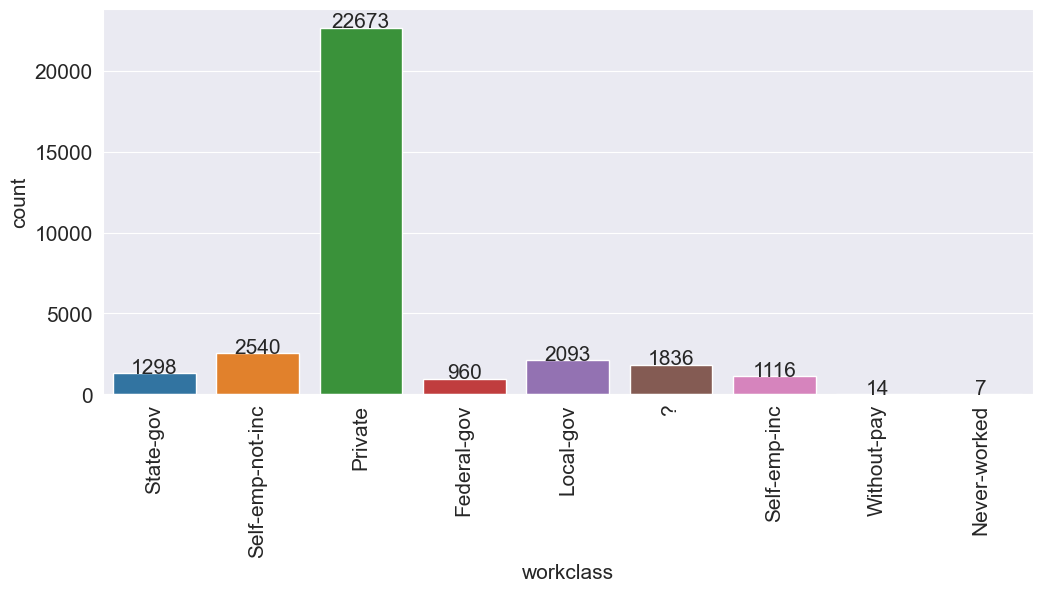

In [2492]:
ax = sns.countplot(data=df, x='workclass', palette='tab10')
ax.tick_params(axis='x', rotation=90)

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()), ha="center")

**Replace the value "?" to the value "Unknown"** 

In [2493]:
df.workclass.replace('?', 'Unknown', inplace=True)

**Check the count of person in each "salary" levels by workclass groups and visualize it with countplot**

In [2494]:
df.groupby('workclass').salary.value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: count, dtype: int64

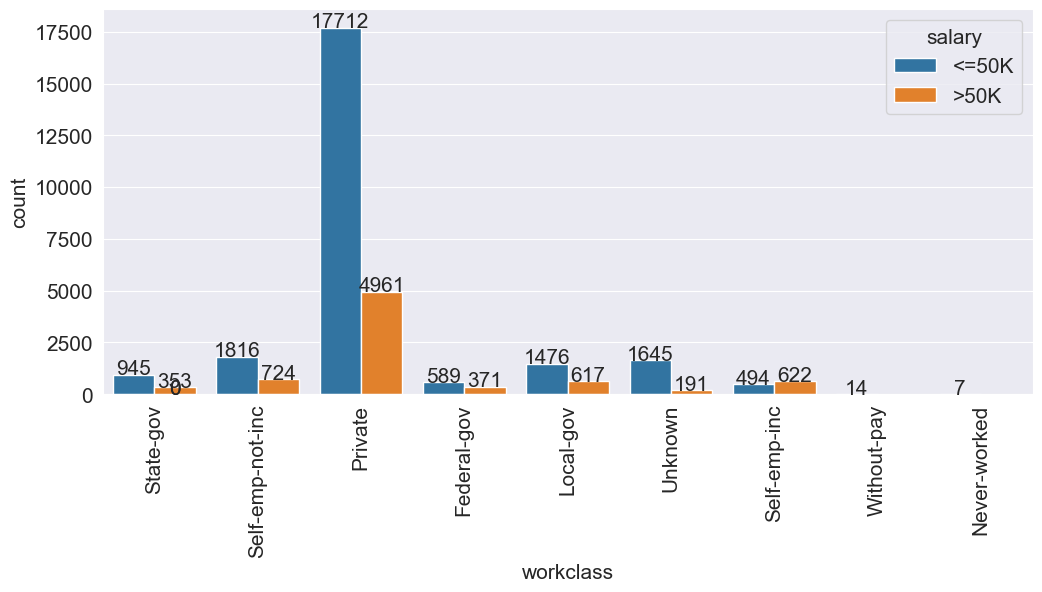

In [2495]:
ax = sns.countplot(data=df, x='workclass', hue='salary')
ax.tick_params(axis='x', rotation=90)

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.2, p.get_height()), ha="center")

**Check the percentage distribution of person in each "salary" levels by each workclass groups and visualize it with bar plot**

In [2496]:
df.groupby('workclass').salary.value_counts(normalize=True)

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: proportion, dtype: float64

In [2497]:
a = df.groupby('workclass').salary.value_counts(normalize=True)
a_new = a.reset_index(level=[0,1]).sort_values(by=['workclass', 'salary'])
a_new.rename(columns={"proportion": "percentage"}, inplace=True); a_new

workclass salary  percentage
0        Federal-gov  <=50K       0.614
1        Federal-gov   >50K       0.386
2          Local-gov  <=50K       0.705
3          Local-gov   >50K       0.295
4       Never-worked  <=50K       1.000
5            Private  <=50K       0.781
6            Private   >50K       0.219
8       Self-emp-inc  <=50K       0.443
7       Self-emp-inc   >50K       0.557
9   Self-emp-not-inc  <=50K       0.715
10  Self-emp-not-inc   >50K       0.285
11         State-gov  <=50K       0.728
12         State-gov   >50K       0.272
13           Unknown  <=50K       0.896
14           Unknown   >50K       0.104
15       Without-pay  <=50K       1.000

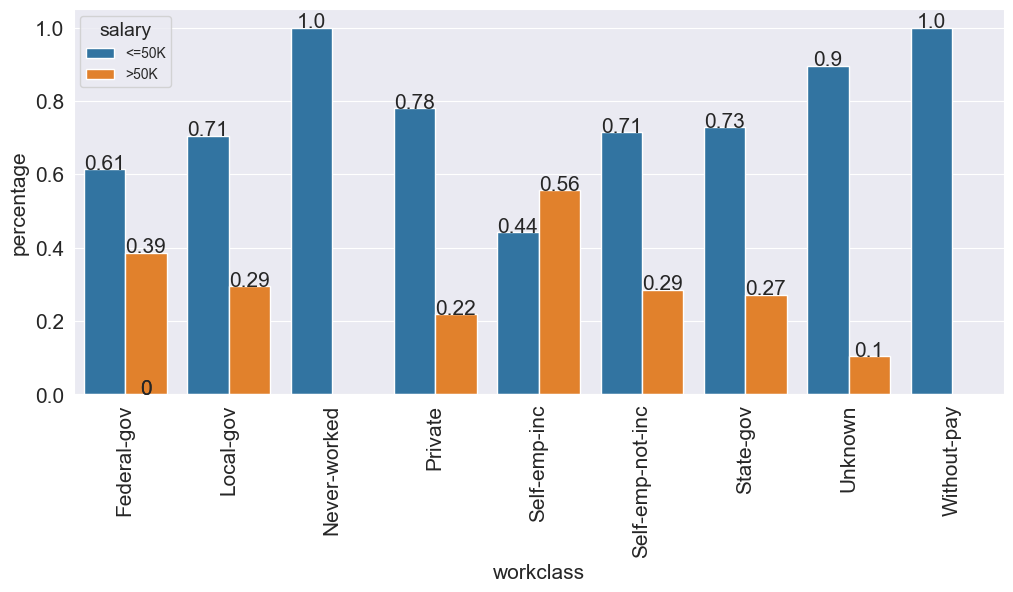

In [2498]:
ax = sns.barplot(data=a_new, x="workclass", y="percentage", hue="salary", palette="tab10")
ax.tick_params(axis="x", rotation=90)
plt.legend(title="salary", fontsize=10, title_fontsize=14)

for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x()+0.2, p.get_height()), ha="center")

**Check the count of person in each workclass groups by "salary" levels and visualize it with countplot**

In [2499]:
df.groupby("salary").workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: count, dtype: int64

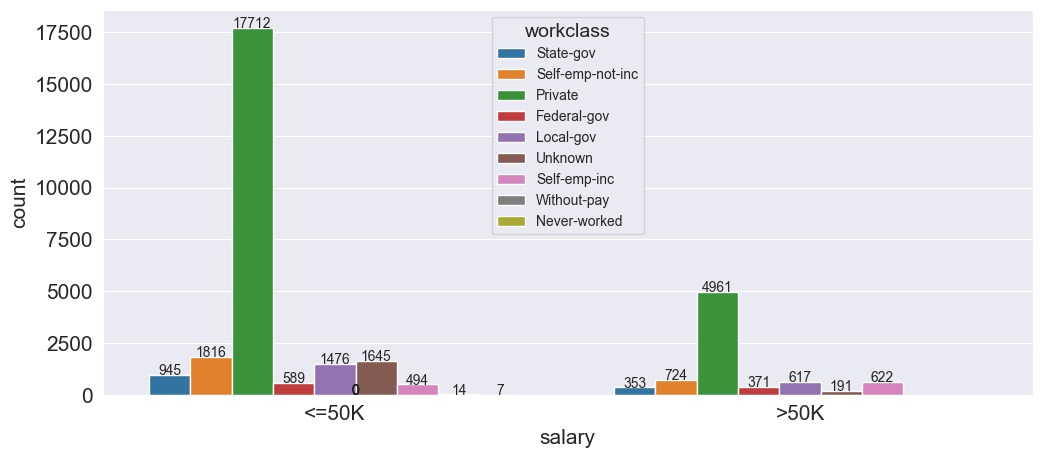

In [2500]:
ax = sns.countplot(data=df, x="salary", hue="workclass")
plt.legend(loc="upper center", title="workclass", fontsize=10, title_fontsize=14);

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.044, p.get_height()), 
                ha="center", fontsize=10)

**Check the the percentage distribution of person in each workclass groups by "salary" levels and visualize it with countplot**

In [2501]:
df.groupby("salary").workclass.value_counts(normalize=True)

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: proportion, dtype: float64

In [2502]:
a = df.groupby("salary").workclass.value_counts(normalize=True)
a_new = a.reset_index(level=[0,1]).sort_values(by=['salary', 'workclass'])
a_new.rename(columns={"proportion": "percentage"}, inplace=True); a_new

salary         workclass  percentage
5   <=50K       Federal-gov       0.024
3   <=50K         Local-gov       0.060
8   <=50K      Never-worked       0.000
0   <=50K           Private       0.717
6   <=50K      Self-emp-inc       0.020
1   <=50K  Self-emp-not-inc       0.074
4   <=50K         State-gov       0.038
2   <=50K           Unknown       0.067
7   <=50K       Without-pay       0.001
13   >50K       Federal-gov       0.047
12   >50K         Local-gov       0.079
9    >50K           Private       0.633
11   >50K      Self-emp-inc       0.079
10   >50K  Self-emp-not-inc       0.092
14   >50K         State-gov       0.045
15   >50K           Unknown       0.024

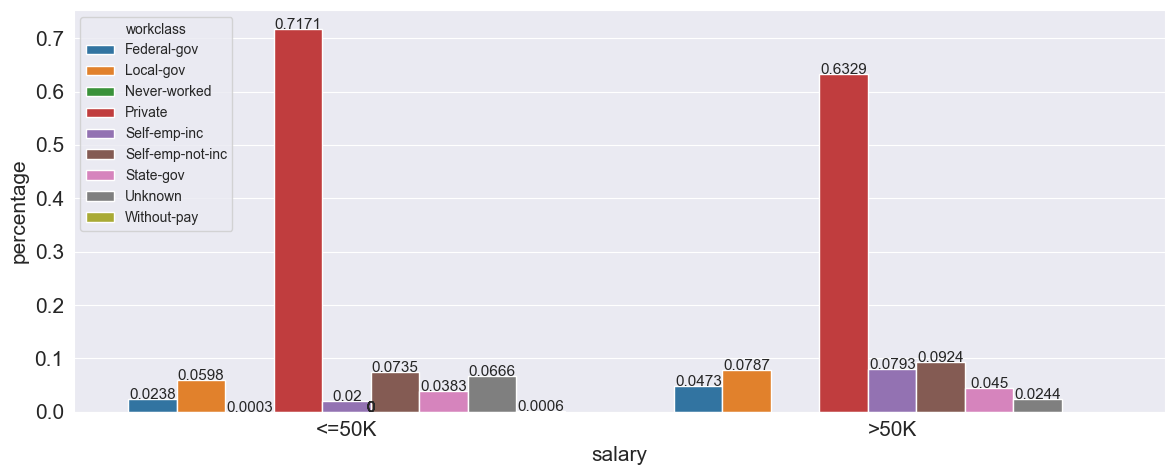

In [2503]:
ax = sns.barplot(data=a_new, x="salary", y="percentage", hue="workclass", palette="tab10")
plt.legend(title="workclass", fontsize=10, title_fontsize=10, loc="upper left")

for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 4),  # 0.0003 and 0.0006 are represented as 0 by round(, 2).
                                                # even though I know more digits make readabelity harder,
                                                # I wanted to see more specific percentage than 0.
                xy=(p.get_x()+0.045, p.get_height()), 
                ha="center", fontsize=11)

plt.tight_layout()

### 0.6.4. occupation

**Check the count of person in each categories and visualize it with countplot**

In [2504]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

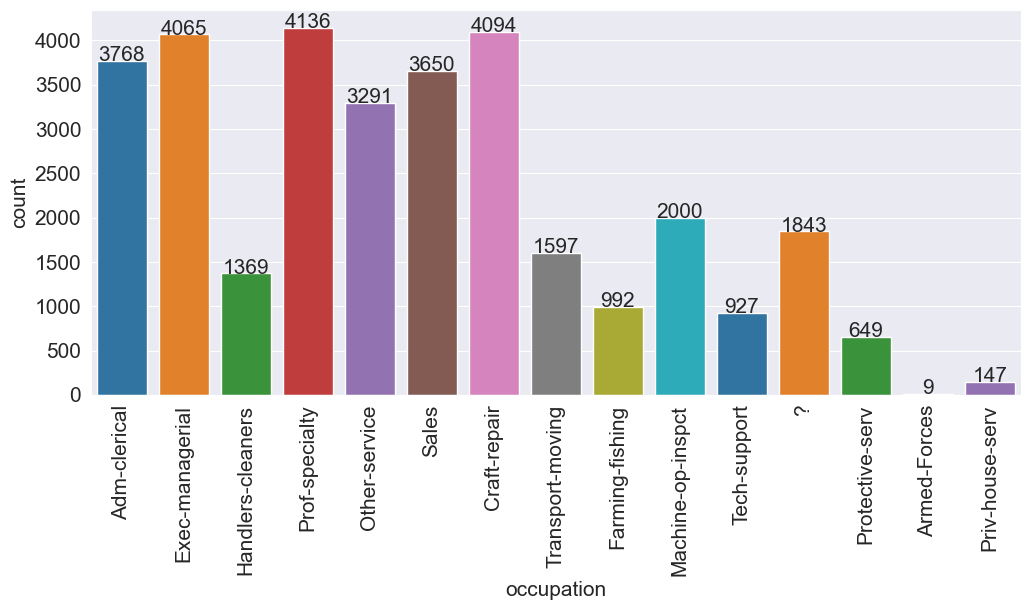

In [2505]:
ax = sns.countplot(data=df, x="occupation", palette="tab10")
ax.tick_params(axis="x", rotation=90)

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.4, p.get_height()), ha="center")

**Replace the value "?" to the value "Unknown"**

In [2506]:
df.occupation.replace('?', 'Unknown', inplace=True)

**Check the count of person in each "salary" levels by occupation groups and visualize it with countplot**

In [2507]:
df.groupby("occupation").salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

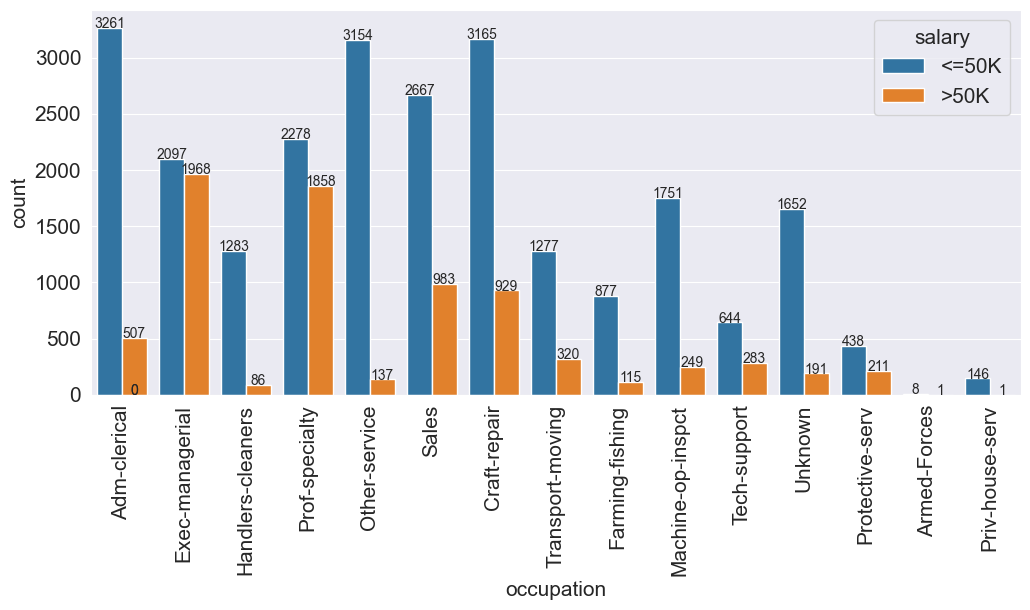

In [2508]:
ax = sns.countplot(data=df, x="occupation", hue="salary")
ax.tick_params(axis="x", rotation=90)

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.2, p.get_height()), 
                ha="center", fontsize=10)

**Check the percentage distribution of person in each "salary" levels by each occupation groups and visualize it with bar plot**

In [2509]:
df.groupby("occupation").salary.value_counts(normalize=True)

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [2510]:
a = df.groupby("occupation").salary.value_counts(normalize=True)
a_new = a.reset_index(level=[0,1]).sort_values(by=['occupation', 'salary'])
a_new.rename(columns={"proportion": "percentage"}, inplace=True); a_new

occupation salary  percentage
0        Adm-clerical  <=50K       0.865
1        Adm-clerical   >50K       0.135
2        Armed-Forces  <=50K       0.889
3        Armed-Forces   >50K       0.111
4        Craft-repair  <=50K       0.773
5        Craft-repair   >50K       0.227
6     Exec-managerial  <=50K       0.516
7     Exec-managerial   >50K       0.484
8     Farming-fishing  <=50K       0.884
9     Farming-fishing   >50K       0.116
10  Handlers-cleaners  <=50K       0.937
11  Handlers-cleaners   >50K       0.063
12  Machine-op-inspct  <=50K       0.875
13  Machine-op-inspct   >50K       0.124
14      Other-service  <=50K       0.958
15      Other-service   >50K       0.042
16    Priv-house-serv  <=50K       0.993
17    Priv-house-serv   >50K       0.007
18     Prof-specialty  <=50K       0.551
19     Prof-specialty   >50K       0.449
20    Protective-serv  <=50K       0.675
21    Protective-serv   >50K       0.325
22              Sales  <=50K       0.731
23              Sales   >50K       0.269
24       Tech-support  <=50K       0.695
25       Tech-support   >50K       0.305
26   Transport-moving  <=50K       0.800
27   Transport-moving   >50K       0.200
28            Unknown  <=50K       0.896
29            Unknown   >50K       0.104

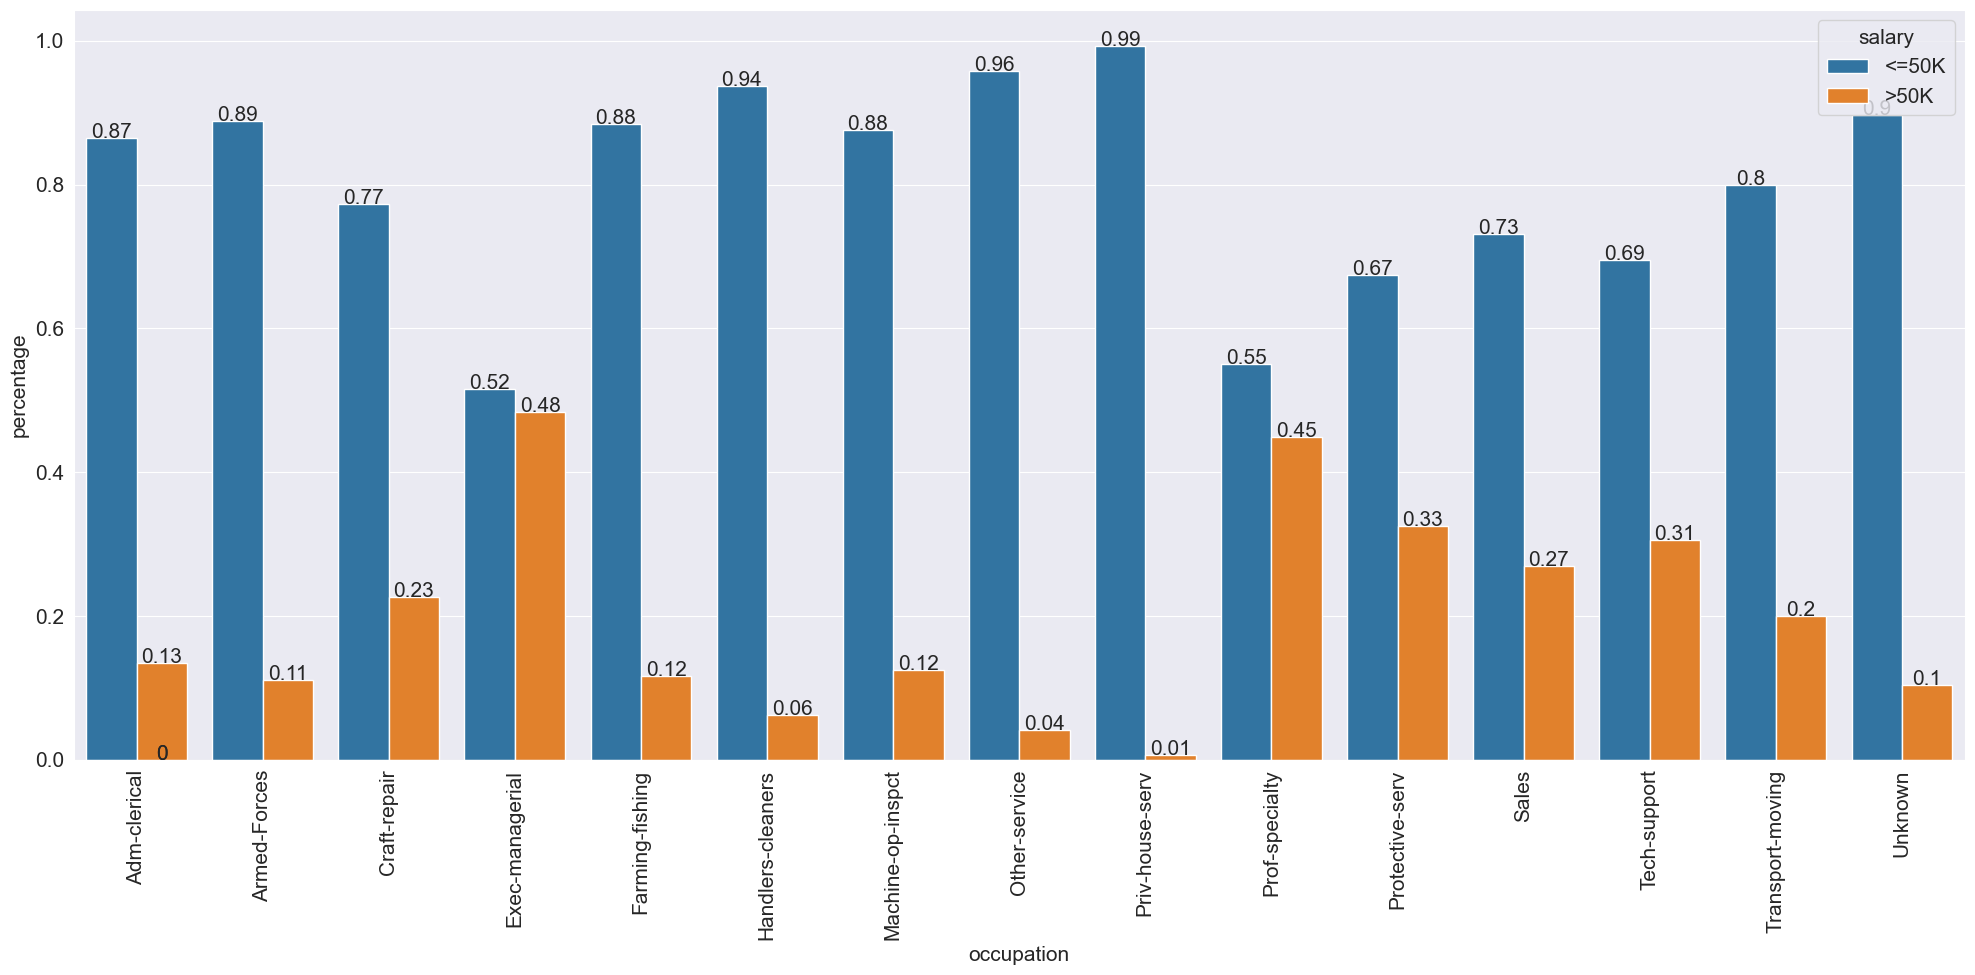

In [2511]:
ax = sns.barplot(data=a_new, x="occupation", y="percentage", hue="salary", palette="tab10")
ax.tick_params(axis="x", rotation=90)
ax.figure.set_size_inches(20, 10)

for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x()+0.2, p.get_height()), ha="center")

plt.tight_layout()

**Check the count of person in each occupation groups by "salary" levels and visualize it with countplot**

In [2512]:
df.groupby("salary").occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

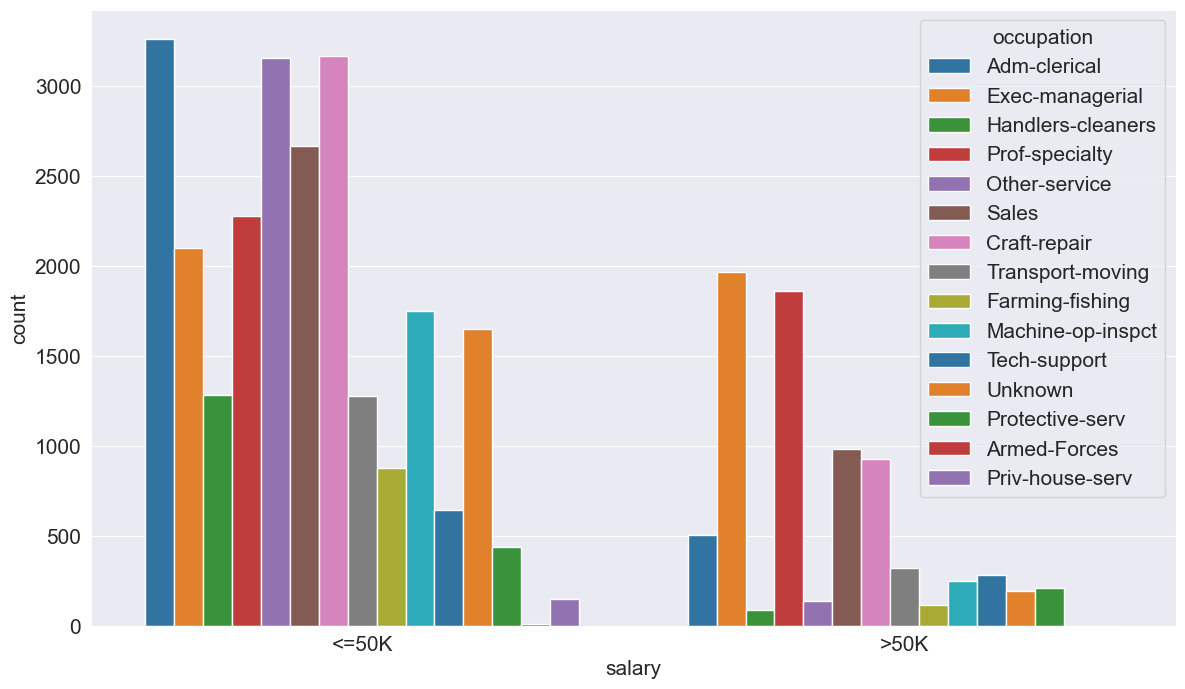

In [2513]:
ax = sns.countplot(data=df, x="salary", hue="occupation", palette="tab10")
plt.legend(title="occupation", loc="upper right")
ax.figure.set_size_inches(14, 8)

**Check the the percentage distribution of person in each occupation groups by "salary" levels and visualize it with bar plot**

In [2514]:
df.groupby("salary").occupation.value_counts(normalize=True)

salary  occupation       
<=50K   Adm-clerical        0.132
        Craft-repair        0.128
        Other-service       0.128
        Sales               0.108
        Prof-specialty      0.092
        Exec-managerial     0.085
        Machine-op-inspct   0.071
        Unknown             0.067
        Handlers-cleaners   0.052
        Transport-moving    0.052
        Farming-fishing     0.036
        Tech-support        0.026
        Protective-serv     0.018
        Priv-house-serv     0.006
        Armed-Forces        0.000
>50K    Exec-managerial     0.251
        Prof-specialty      0.237
        Sales               0.125
        Craft-repair        0.119
        Adm-clerical        0.065
        Transport-moving    0.041
        Tech-support        0.036
        Machine-op-inspct   0.032
        Protective-serv     0.027
        Unknown             0.024
        Other-service       0.017
        Farming-fishing     0.015
        Handlers-cleaners   0.011
        Armed-Forces  

In [2515]:
a = df.groupby("salary").occupation.value_counts(normalize=True)
a_new = a.reset_index(level=[0,1]).sort_values(by=['salary', 'occupation'])
a_new.rename(columns={"proportion": "percentage"}, inplace=True); a_new

salary         occupation  percentage
0   <=50K       Adm-clerical       0.132
14  <=50K       Armed-Forces       0.000
1   <=50K       Craft-repair       0.128
5   <=50K    Exec-managerial       0.085
10  <=50K    Farming-fishing       0.036
8   <=50K  Handlers-cleaners       0.052
6   <=50K  Machine-op-inspct       0.071
2   <=50K      Other-service       0.128
13  <=50K    Priv-house-serv       0.006
4   <=50K     Prof-specialty       0.092
12  <=50K    Protective-serv       0.018
3   <=50K              Sales       0.108
11  <=50K       Tech-support       0.026
9   <=50K   Transport-moving       0.052
7   <=50K            Unknown       0.067
19   >50K       Adm-clerical       0.065
28   >50K       Armed-Forces       0.000
18   >50K       Craft-repair       0.119
15   >50K    Exec-managerial       0.251
26   >50K    Farming-fishing       0.015
27   >50K  Handlers-cleaners       0.011
22   >50K  Machine-op-inspct       0.032
25   >50K      Other-service       0.017
29   >50K    Priv-house-serv       0.000
16   >50K     Prof-specialty       0.237
23   >50K    Protective-serv       0.027
17   >50K              Sales       0.125
21   >50K       Tech-support       0.036
20   >50K   Transport-moving       0.041
24   >50K            Unknown       0.024

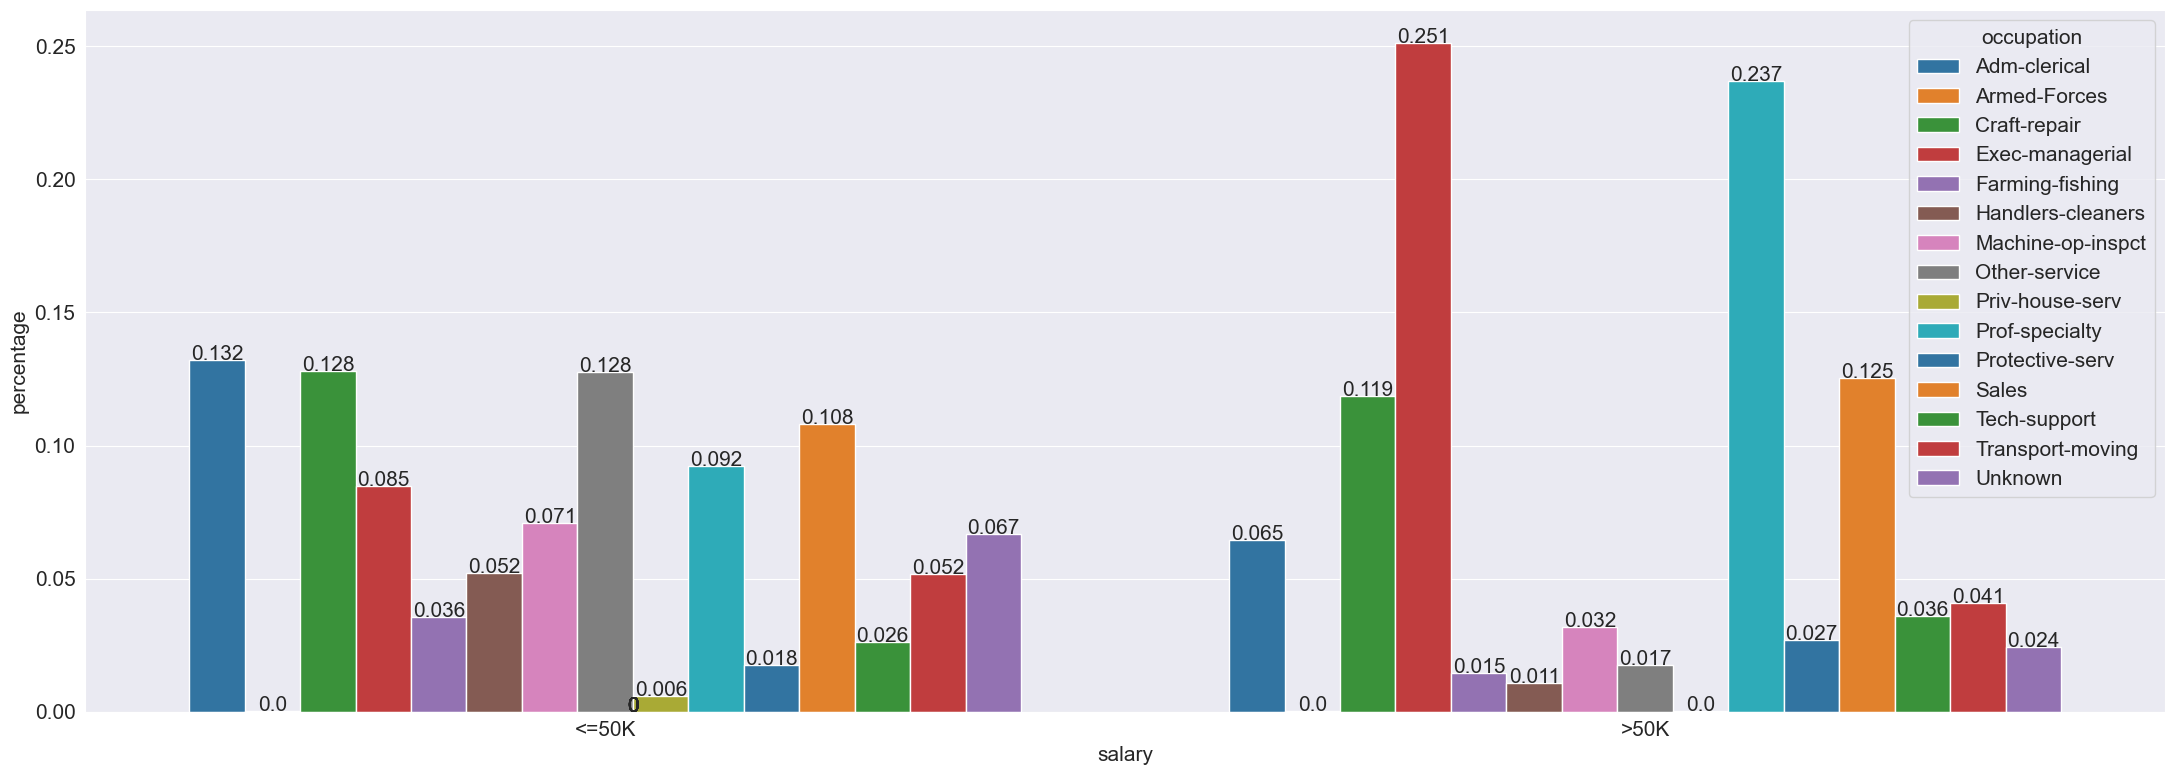

In [2516]:
ax = sns.barplot(data=a_new, x="salary", y="percentage", hue="occupation", palette="tab10")
ax.figure.set_size_inches(22, 8)
plt.legend(title="occupation", loc="upper right")

for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 3),
                xy=(p.get_x()+0.027, p.get_height()), 
                ha="center")

plt.tight_layout()

### 0.6.5. race

**Check the count of person in each categories and visualize it with countplot**

In [2517]:
df.race.value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

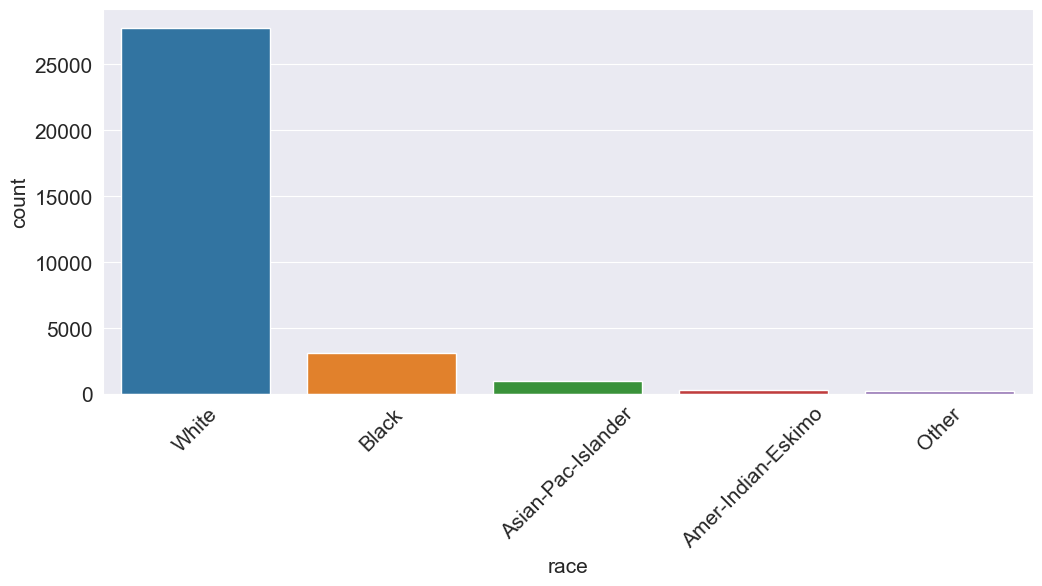

In [2518]:
ax = sns.countplot(data=df, x="race", palette="tab10")
ax.tick_params(axis="x", rotation=45)

**Check the count of person in each "salary" levels by races and visualize it with countplot**

In [2519]:
df.groupby("race").salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: count, dtype: int64

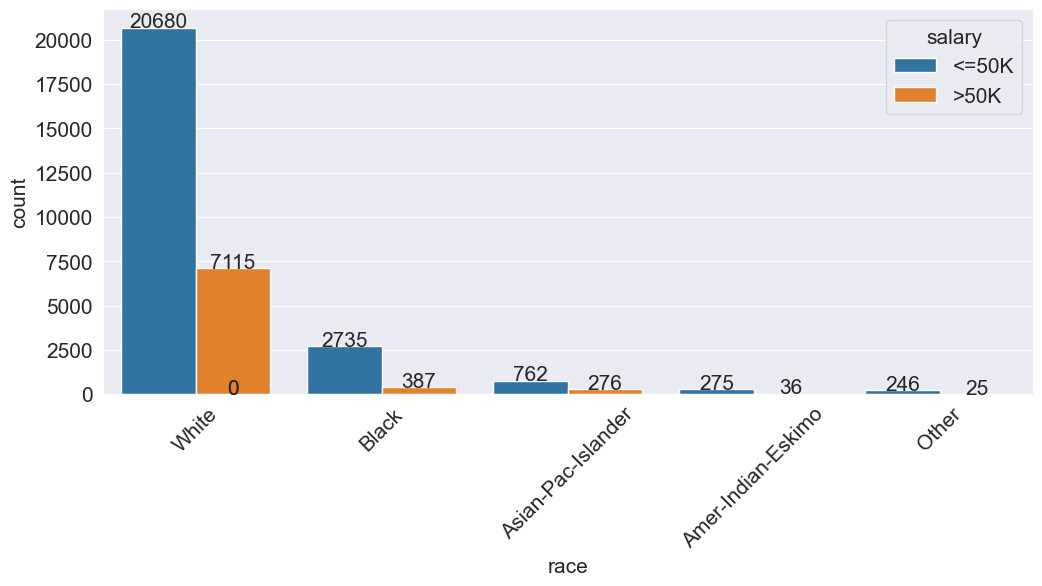

In [2520]:
ax = sns.countplot(data=df, x="race", hue="salary")
ax.tick_params(axis="x", rotation=45)

for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+0.2, p.get_height()), ha="center")

**Check the percentage distribution of person in each "salary" levels by each races and visualize it with pie plot**

In [2521]:
df.groupby("race").salary.value_counts(normalize=True)

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: proportion, dtype: float64

In [2522]:
a = df.groupby("race").salary.value_counts(); a

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: count, dtype: int64

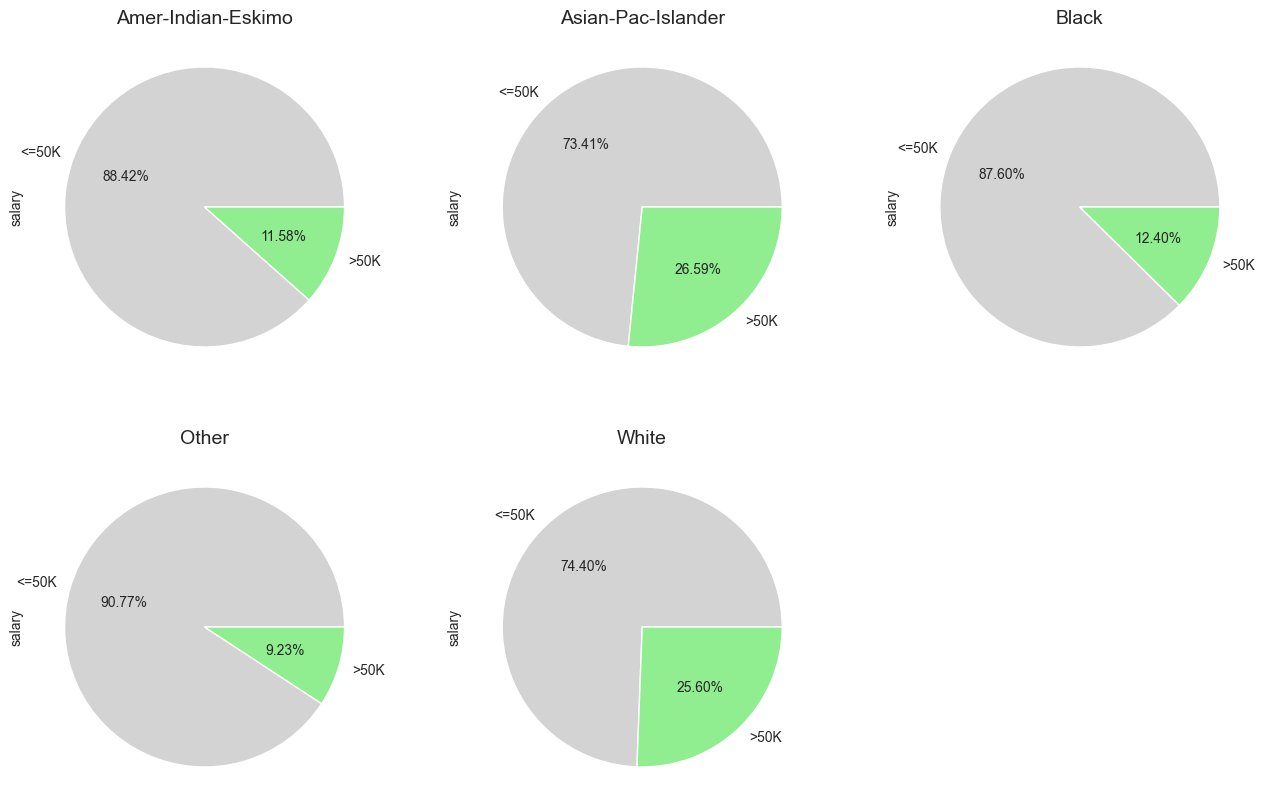

In [2523]:
a = df.groupby("race").salary.value_counts()
index = [0, 0, 0, 1, 1]; columns = [0, 1, 2, 0, 1]; j = 0

fig, ax = plt.subplots(nrows=2, ncols=3)
for i, k in zip(index, columns):
    ax[i][k].pie(data=df, 
              x=a[a.index[::2][j][0]],
              autopct='%.2f%%',
              labels=a[a.index[::2][j][0]].index, 
              textprops={'fontsize': 10}, colors=['lightgray', 'lightgreen'])
    ax[i][k].set_title(a.index[::2][j][0]); ax[i][k].title.set_fontsize(14)
    ax[i][k].set_ylabel('salary', fontsize=10)
    ax[i][k].figure.set_size_inches(16, 10)
    j += 1
    
ax[1][2].remove()

**Check the count of person in each races by "salary" levels and visualize it with countplot**

In [2524]:
df.groupby("salary").race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: count, dtype: int64

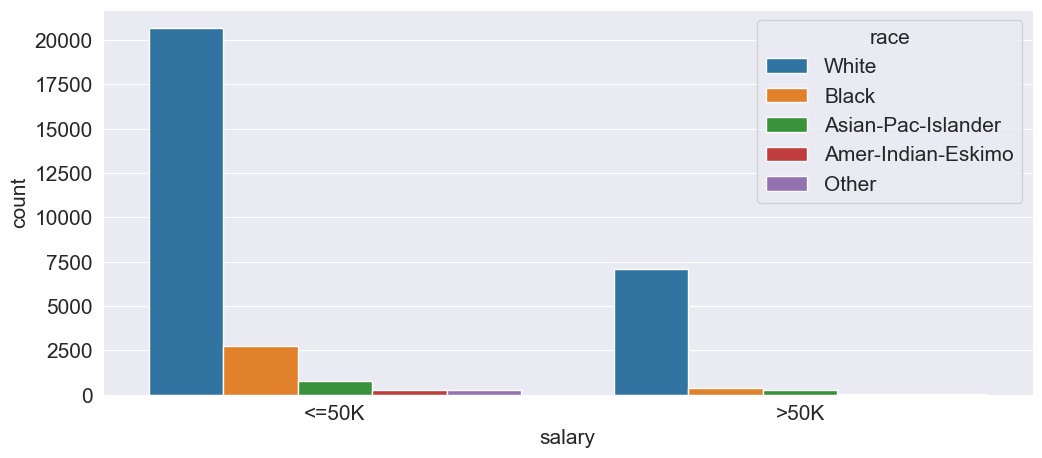

In [2525]:
sns.countplot(data=df, x="salary", hue="race", palette="tab10");

**Check the the percentage distribution of person in each races by "salary" levels and visualize it with bar plot**

In [2526]:
df.groupby("salary").race.value_counts(normalize=True)

salary  race              
<=50K   White                0.837
        Black                0.111
        Asian-Pac-Islander   0.031
        Amer-Indian-Eskimo   0.011
        Other                0.010
>50K    White                0.908
        Black                0.049
        Asian-Pac-Islander   0.035
        Amer-Indian-Eskimo   0.005
        Other                0.003
Name: proportion, dtype: float64

In [2527]:
a = df.groupby("salary").race.value_counts(normalize=True)
a_new = a.reset_index(level=[0,1]).sort_values(by=['salary', 'race'])
a_new.rename(columns={"proportion": "percentage"}, inplace=True); a_new

salary                race  percentage
3  <=50K  Amer-Indian-Eskimo       0.011
2  <=50K  Asian-Pac-Islander       0.031
1  <=50K               Black       0.111
4  <=50K               Other       0.010
0  <=50K               White       0.837
8   >50K  Amer-Indian-Eskimo       0.005
7   >50K  Asian-Pac-Islander       0.035
6   >50K               Black       0.049
9   >50K               Other       0.003
5   >50K               White       0.908

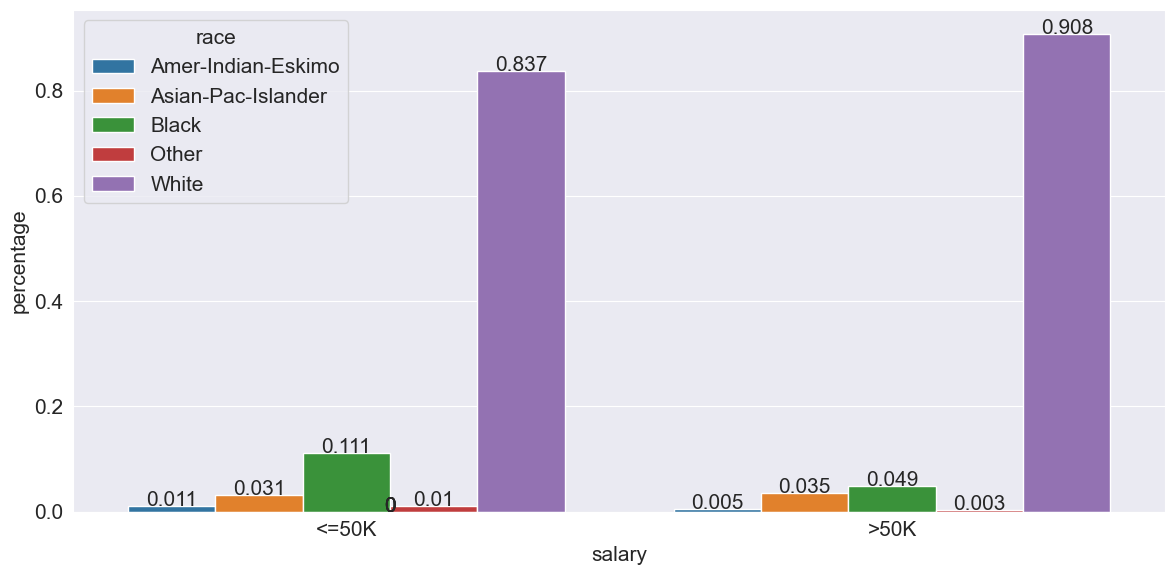

In [2528]:
ax = sns.barplot(data=a_new, x="salary", y="percentage", hue="race")
plt.legend(title="race", loc="upper left")
ax.figure.set_size_inches(12, 6)

for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 3), xy=(p.get_x()+0.08, p.get_height()), ha="center")

plt.tight_layout()

### 0.6.6. sex

**Check the count of person in each gender and visualize it with countplot**

In [2529]:
df.sex.value_counts()

sex
Male      21775
Female    10762
Name: count, dtype: int64

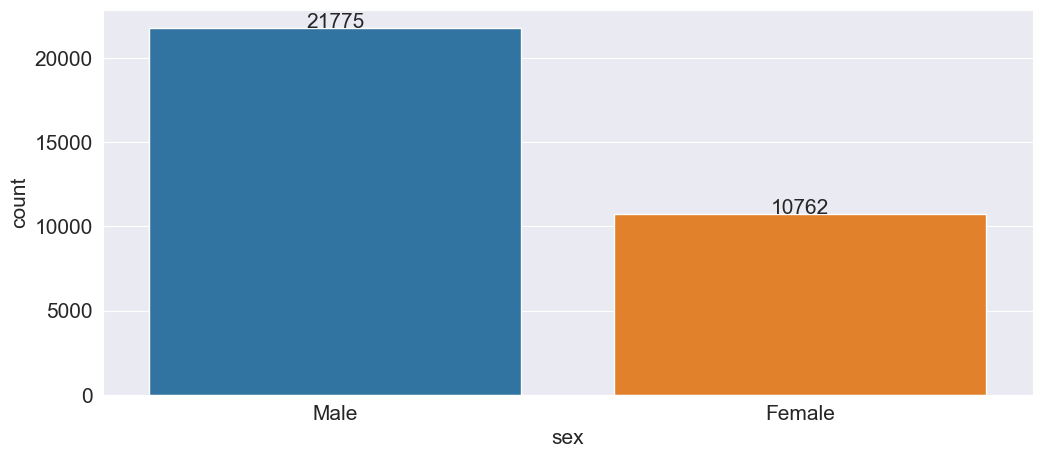

In [2530]:
ax = sns.countplot(data=df, x="sex", palette="tab10")
midpoint = ax.patches[0].get_width()/2
for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+midpoint, p.get_height()), ha="center")

**Check the count of person in each "salary" levels by gender and visualize it with countplot**

In [2531]:
df.groupby("sex").salary.value_counts()

sex     salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: count, dtype: int64

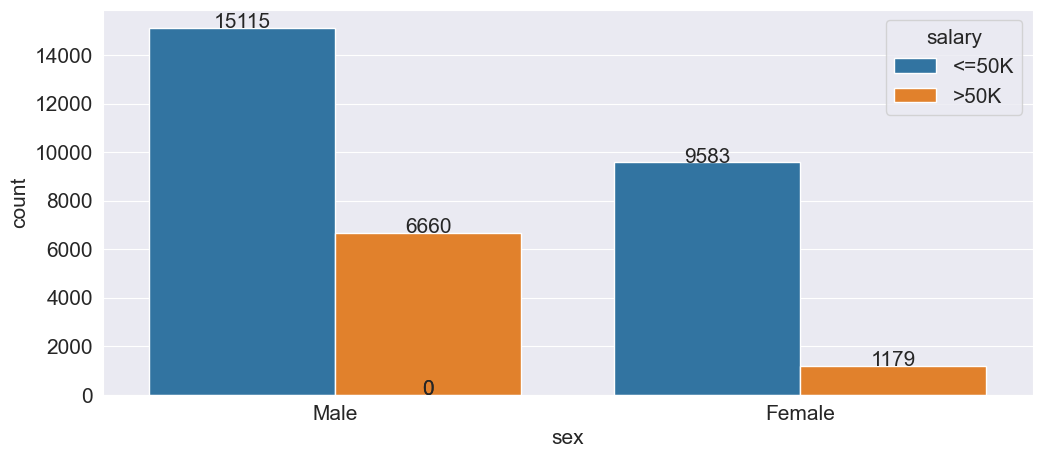

In [2532]:
ax = sns.countplot(data=df, x="sex", hue="salary", palette="tab10")
midpoint = ax.patches[0].get_width()/2
for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+midpoint, p.get_height()), ha="center")

**Check the percentage distribution of person in each "salary" levels by each gender and visualize it with pie plot**

In [2533]:
df.groupby("sex").salary.value_counts(normalize=True)

sex     salary
Female  <=50K    0.890
        >50K     0.110
Male    <=50K    0.694
        >50K     0.306
Name: proportion, dtype: float64

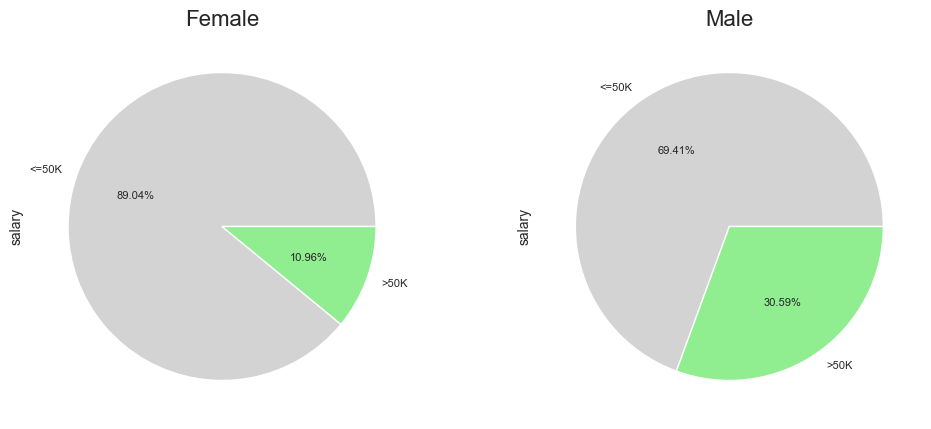

In [2534]:
a = df.groupby("sex").salary.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(2):
    ax[i].pie(data=df, 
              x=a[a.index[::2][i][0]],
              autopct='%.2f%%',
              labels=a[a.index[::2][i][0]].index, 
              textprops={'fontsize': 8}, colors=['lightgray', 'lightgreen'])
    ax[i].set_title(a.index[::2][i][0]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('salary', fontsize=10)

**Check the count of person in each gender by "salary" levels and visualize it with countplot**

In [2535]:
df.groupby("salary").sex.value_counts()

salary  sex   
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: count, dtype: int64

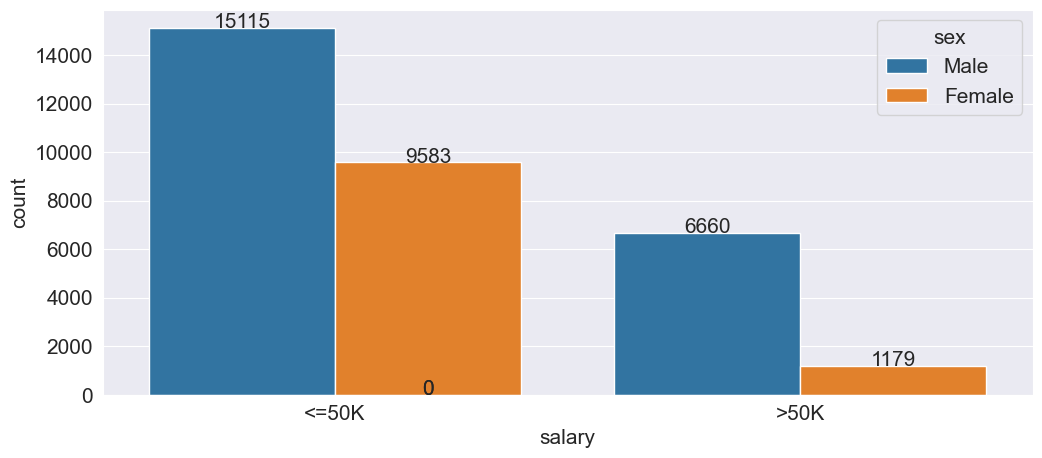

In [2536]:
ax = sns.countplot(data=df, x="salary", hue="sex", palette="tab10")
midpoint = ax.patches[0].get_width()/2
for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+midpoint, p.get_height()), ha="center")

**Check the the percentage distribution of person in each gender by "salary" levels and visualize it with pie plot**

In [2537]:
df.groupby("salary").sex.value_counts(normalize=True)

salary  sex   
<=50K   Male     0.612
        Female   0.388
>50K    Male     0.850
        Female   0.150
Name: proportion, dtype: float64

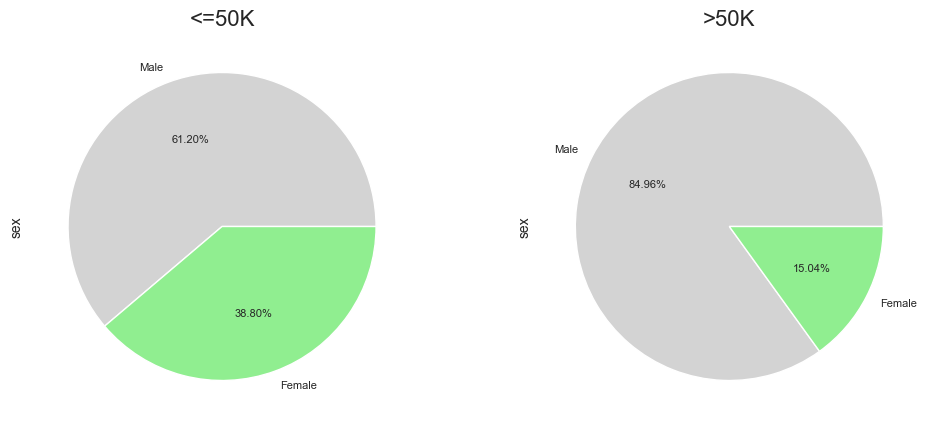

In [2538]:
a = df.groupby("salary").sex.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(2):
    ax[i].pie(data=df, 
              x=a[a.index[::2][i][0]],
              autopct='%.2f%%',
              labels=a[a.index[::2][i][0]].index, 
              textprops={'fontsize': 8}, colors=['lightgray', 'lightgreen'])
    ax[i].set_title(a.index[::2][i][0]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('sex', fontsize=10)

### 0.6.7. native_country

**Check the count of person in each categories and visualize it with countplot**

In [2539]:
df.native_country.value_counts()

native_country
United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

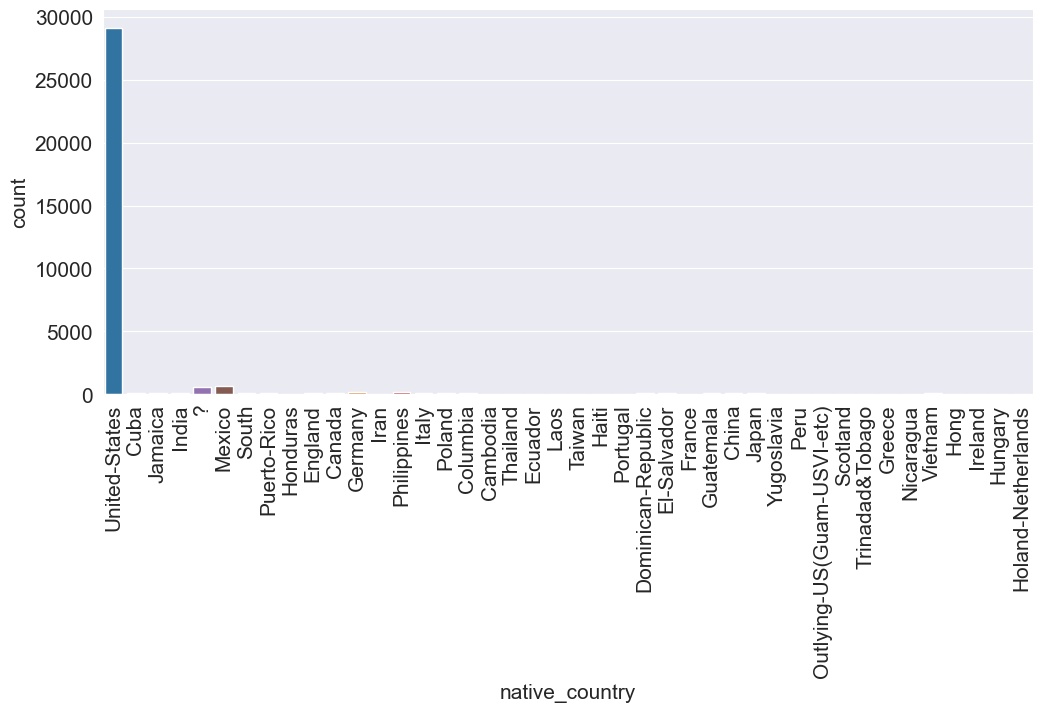

In [2540]:
ax = sns.countplot(data=df, x="native_country", palette="tab10");
ax.tick_params(axis="x", rotation=90)

**Replace the value "?" to the value "Unknown"** 

In [2541]:
df.native_country.replace("?", "Unknown", inplace=True)

**Decrease the number of categories in "native_country" feature as US, and Others and create a new feature with this new categorical data**

In [2542]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [2543]:
df.native_country.apply(mapping_native_country).value_counts()

native_country
US        29153
Others     3384
Name: count, dtype: int64

In [2544]:
df["native_country_summary"] = df.native_country.apply(mapping_native_country)
df.native_country_summary

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

**Visualize the count of person in each new categories (US, Others)**

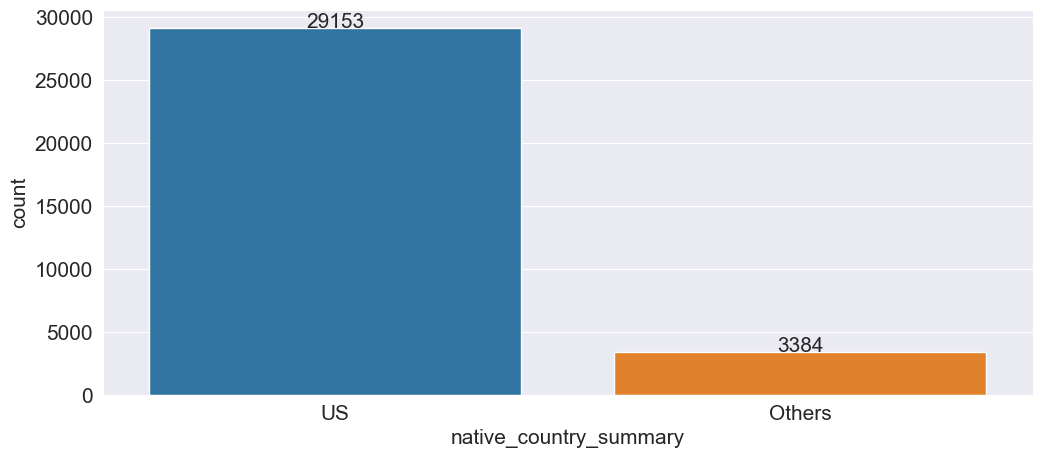

In [2545]:
ax = sns.countplot(data=df, x="native_country_summary", palette="tab10")
midpoint = ax.patches[0].get_width()/2
for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+midpoint, p.get_height()), ha="center")

**Check the count of person in each "salary" levels by these new native countries (US, Others) and visualize it with countplot**

In [2546]:
df.groupby("native_country_summary").salary.value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: count, dtype: int64

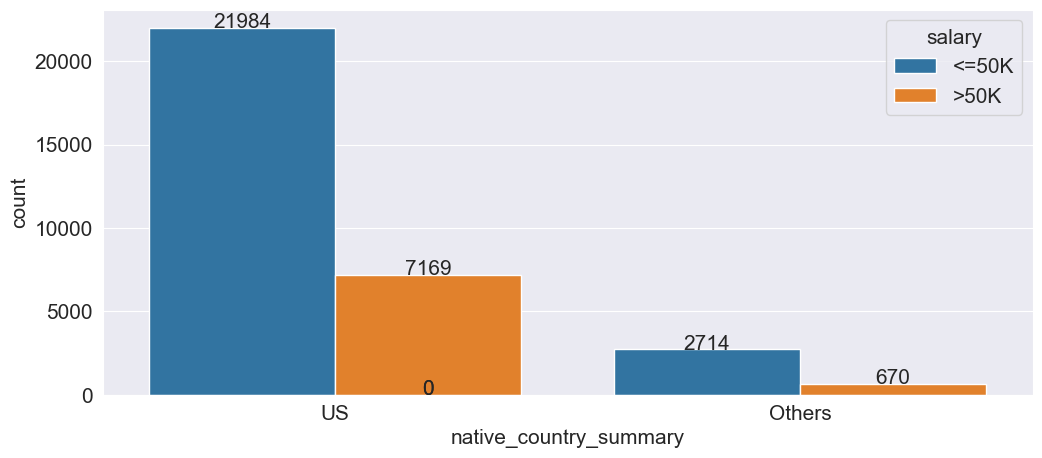

In [2547]:
ax = sns.countplot(data=df, x="native_country_summary", hue="salary", palette="tab10")
midpoint = ax.patches[0].get_width()/2
for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+midpoint, p.get_height()), ha="center")

**Check the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualize it with pie plot separately**

In [2548]:
df.groupby("native_country_summary").salary.value_counts(normalize=True)

native_country_summary  salary
Others                  <=50K    0.802
                        >50K     0.198
US                      <=50K    0.754
                        >50K     0.246
Name: proportion, dtype: float64

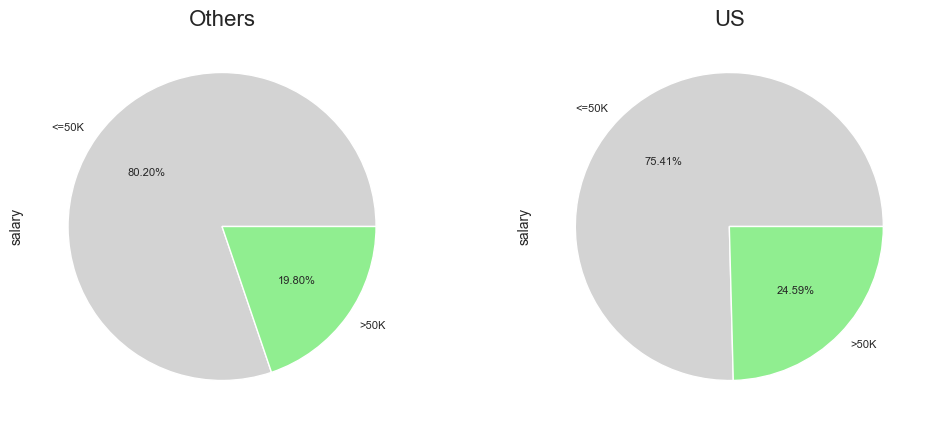

In [2549]:
a = df.groupby("native_country_summary").salary.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(2):
    ax[i].pie(data=df, 
              x=a[a.index[::2][i][0]],
              autopct='%.2f%%',
              labels=a[a.index[::2][i][0]].index, 
              textprops={'fontsize': 8}, colors=['lightgray', 'lightgreen'])
    ax[i].set_title(a.index[::2][i][0]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('salary', fontsize=10)

**Check the count of person in each these new native countries (US, Others) by "salary" levels and visualize it with countplot**

In [2550]:
df.groupby("salary").native_country_summary.value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: count, dtype: int64

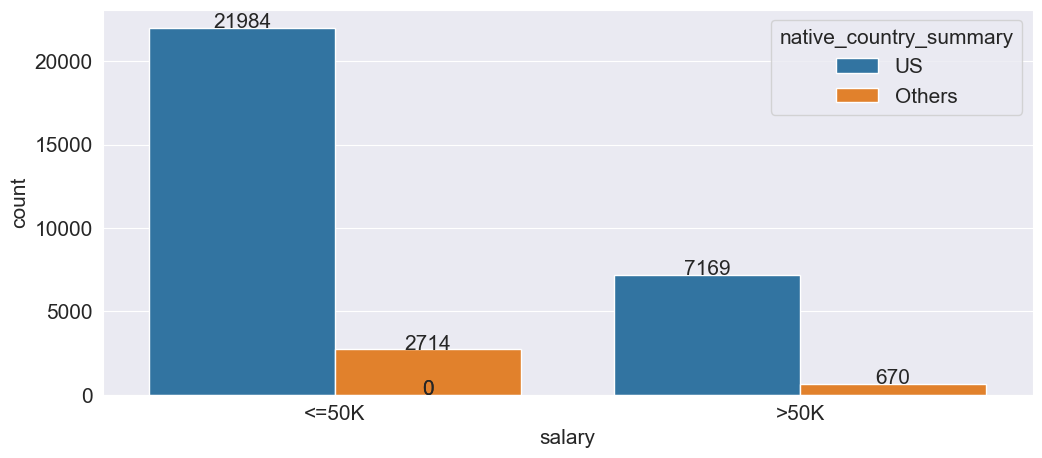

In [2551]:
ax = sns.countplot(data=df, x="salary", hue="native_country_summary", palette="tab10")
midpoint = ax.patches[0].get_width()/2
for p in ax.patches:
    ax.annotate(text=round(p.get_height()), xy=(p.get_x()+midpoint, p.get_height()), ha="center")

**Check the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualize it with pie plot separately**

In [2552]:
df.groupby("salary").native_country_summary.value_counts(normalize=True)

salary  native_country_summary
<=50K   US                       0.890
        Others                   0.110
>50K    US                       0.915
        Others                   0.085
Name: proportion, dtype: float64

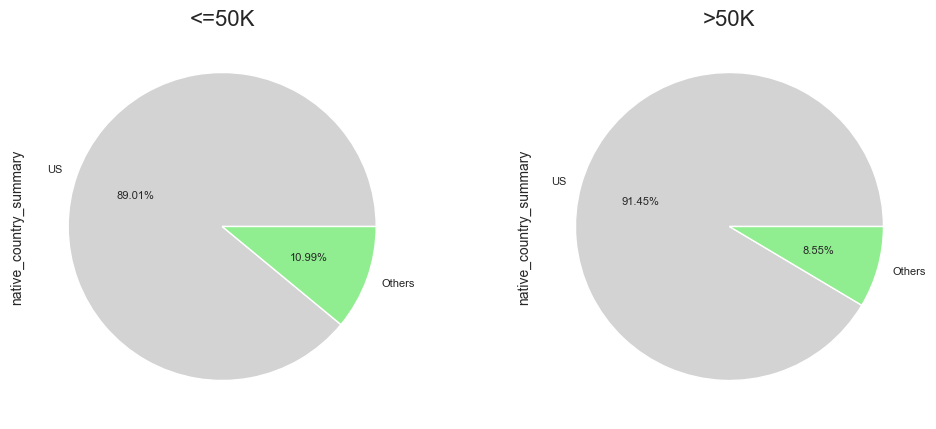

In [2553]:
a = df.groupby("salary").native_country_summary.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2)
for i in range(2):
    ax[i].pie(data=df, 
              x=a[a.index[::2][i][0]],
              autopct='%.2f%%',
              labels=a[a.index[::2][i][0]].index, 
              textprops={'fontsize': 8}, colors=['lightgray', 'lightgreen'])
    ax[i].set_title(a.index[::2][i][0]); ax[i].title.set_fontsize(16)
    ax[i].set_ylabel('native_country_summary', fontsize=10)

## 0.7. Analysis Questions

### 0.7.1. What is the average age of males and females by income level?

In [2554]:
df.groupby(["salary", "sex"]).age.mean()

salary  sex   
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

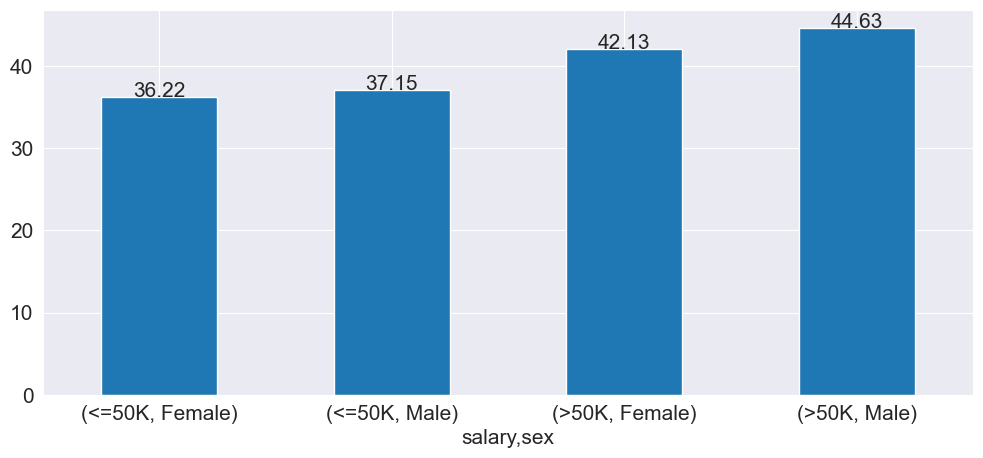

In [2555]:
ax = df.groupby(["salary", "sex"]).age.mean().plot.bar()
ax.tick_params(axis="x", rotation=0)

midpoint = ax.patches[0].get_width() / 2
for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x() + midpoint, p.get_height()), ha='center')

In [2556]:
age_mean = df.groupby(["salary", "sex"])[["age"]].mean().reset_index()
age_mean

salary     sex    age
0  <=50K  Female 36.217
1  <=50K    Male 37.149
2   >50K  Female 42.126
3   >50K    Male 44.627

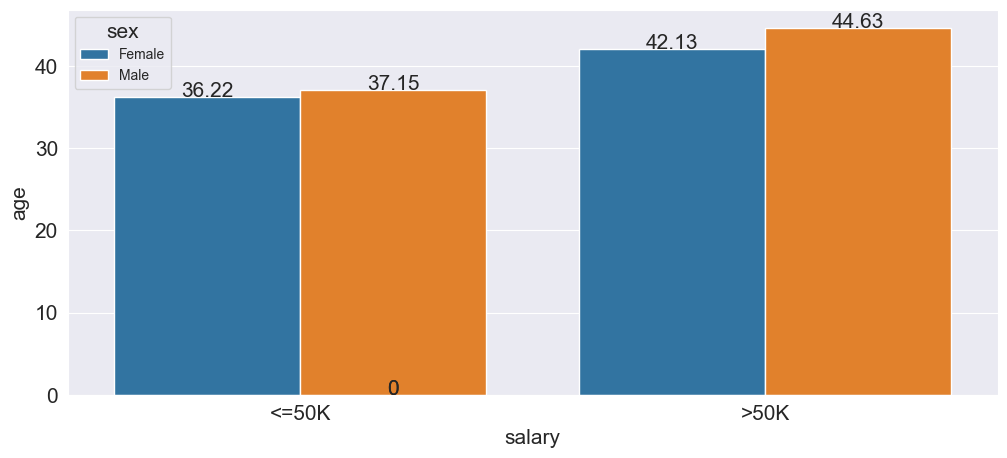

In [2557]:
ax = sns.barplot(data=age_mean, x="salary", y="age", hue="sex")
plt.legend(loc="upper left", title="sex", fontsize=10);

midpoint = ax.patches[0].get_width() / 2
for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x() + midpoint, p.get_height()), ha='center')

### 0.7.2. What is the workclass percentages of Americans in high-level income group?

In [2558]:
workclass_US_h50K = df[(df.native_country_summary == "US") & (df.salary == ">50K")]\
.workclass.value_counts(normalize=True) * 100

workclass_US_h50K

workclass
Private            63.314
Self-emp-not-inc    9.192
Local-gov           8.021
Self-emp-inc        7.784
Federal-gov         4.687
State-gov           4.547
Unknown             2.455
Name: proportion, dtype: float64

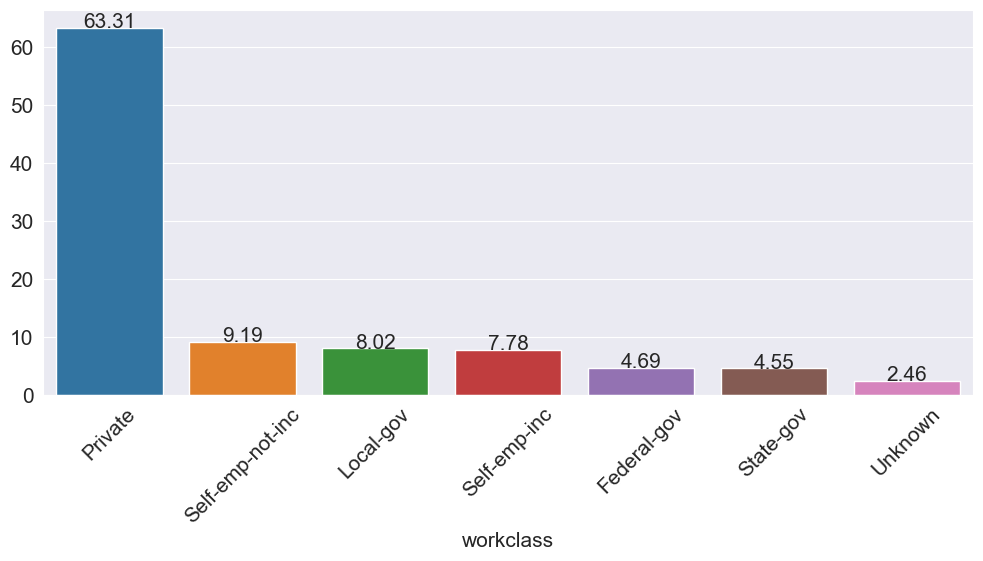

In [2559]:
ax = sns.barplot(x=workclass_US_h50K.index, y=workclass_US_h50K.values, palette="tab10")
ax.tick_params(axis="x", rotation=45)

midpoint = ax.patches[0].get_width() / 2
for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x() + midpoint, p.get_height()), ha='center')

### 0.7.3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

In [2560]:
occ_US_private_h50K = df[(df.native_country_summary == "US") & (df.workclass == "Private") &\
(df.salary == ">50K")].occupation.value_counts(normalize=True) * 100

occ_US_private_h50K

occupation
Exec-managerial     26.438
Prof-specialty      19.476
Craft-repair        14.695
Sales               14.475
Adm-clerical         6.389
Transport-moving     5.442
Tech-support         4.428
Machine-op-inspct    4.428
Other-service        1.674
Handlers-cleaners    1.344
Farming-fishing      0.595
Protective-serv      0.595
Priv-house-serv      0.022
Name: proportion, dtype: float64

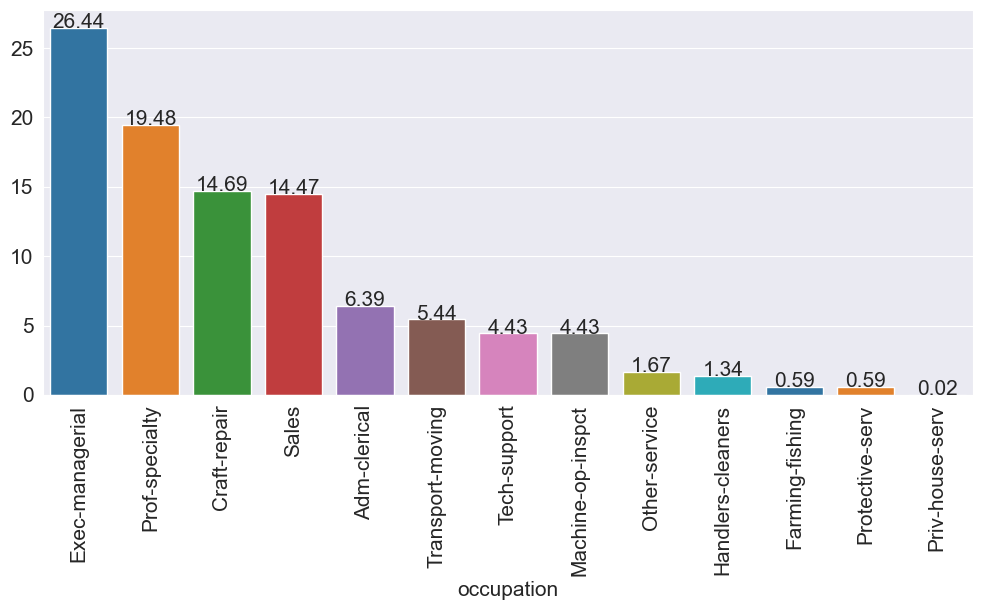

In [2561]:
ax = sns.barplot(x=occ_US_private_h50K.index, y=occ_US_private_h50K.values, palette="tab10")
ax.tick_params(axis="x", rotation=90)

midpoint = ax.patches[0].get_width() / 2
for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x() + midpoint, p.get_height()), ha='center')

### 0.7.4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?

In [2562]:
educ_asiPacIs_h50K = df[(df.race == "Asian-Pac-Islander") & (df.salary == ">50K")]\
.education.value_counts(normalize=True) * 100

educ_asiPacIs_h50K

education
Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
9th             0.362
11th            0.362
10th            0.362
12th            0.362
Name: proportion, dtype: float64

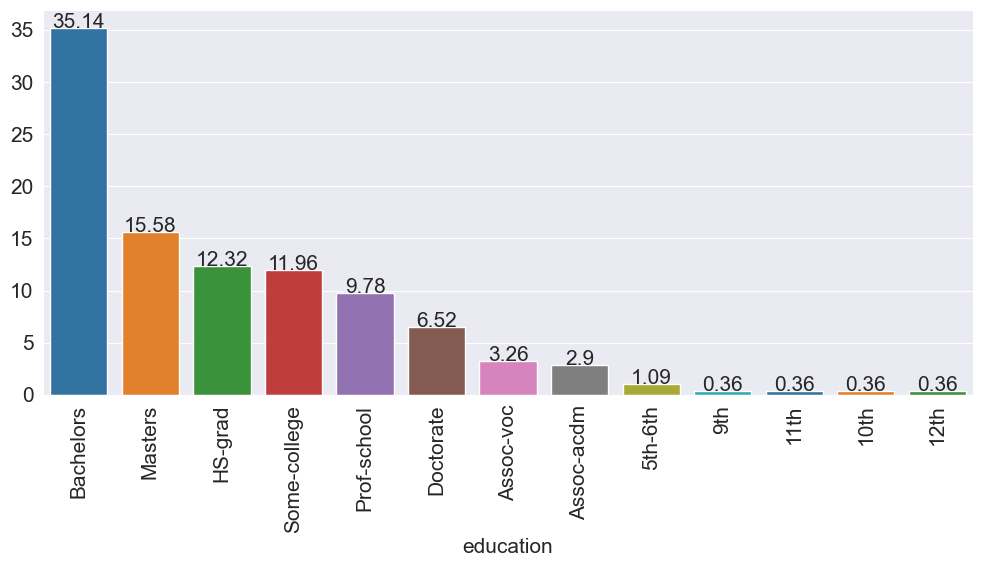

In [2563]:
ax = sns.barplot(x=educ_asiPacIs_h50K.index, y=educ_asiPacIs_h50K.values, palette="tab10")
ax.tick_params(axis="x", rotation=90)

midpoint = ax.patches[0].get_width() / 2
for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x() + midpoint, p.get_height()), ha='center')

### 0.7.5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?

In [2564]:
occ_asiPacIs_B_h50K = df[(df.race == "Asian-Pac-Islander") & (df.education == "Bachelors") &\
(df.salary == ">50K")].occupation.value_counts(normalize=True) * 100

occ_asiPacIs_B_h50K

occupation
Exec-managerial     27.835
Prof-specialty      25.773
Adm-clerical        12.371
Sales                9.278
Other-service        9.278
Craft-repair         7.216
Tech-support         3.093
Protective-serv      2.062
Transport-moving     1.031
Machine-op-inspct    1.031
Farming-fishing      1.031
Name: proportion, dtype: float64

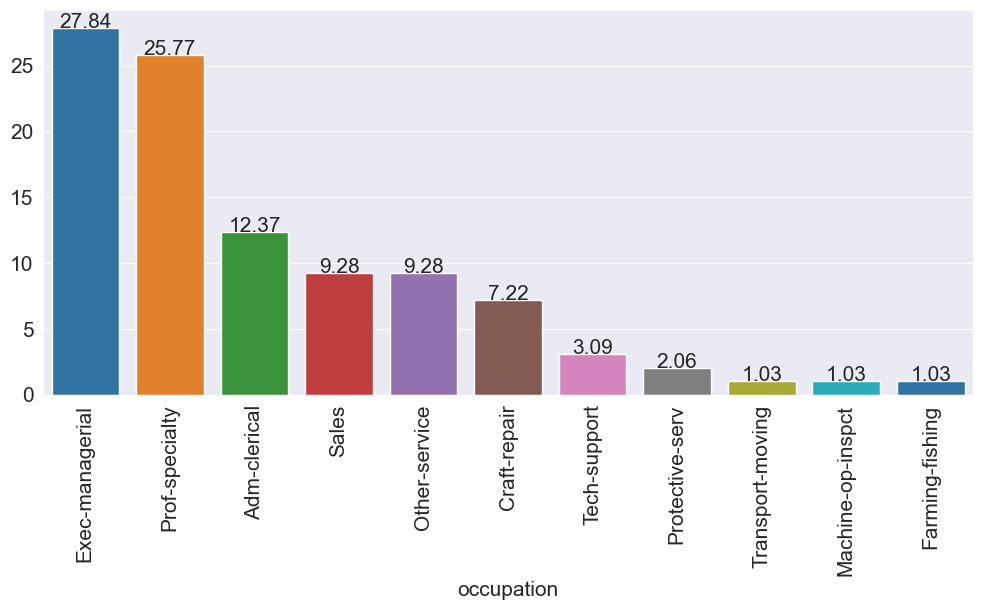

In [2565]:
ax = sns.barplot(x=occ_asiPacIs_B_h50K.index, y=occ_asiPacIs_B_h50K.values, palette="tab10")
ax.tick_params(axis="x", rotation=90)

midpoint = ax.patches[0].get_width() / 2
for p in ax.patches:
    ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x() + midpoint, p.get_height()), ha='center')

### 0.7.6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.

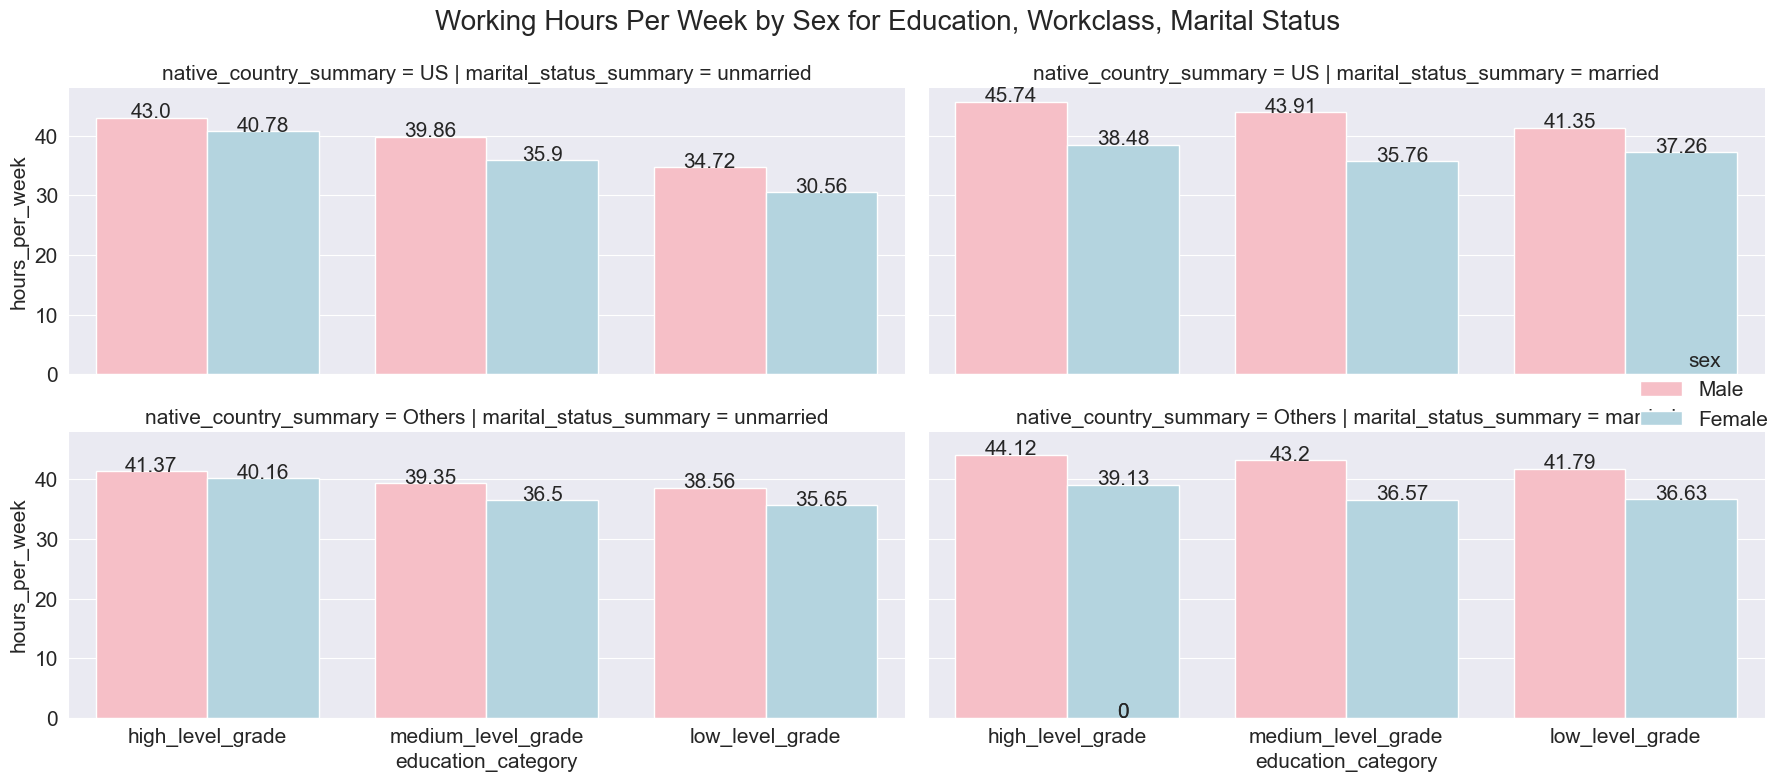

In [2566]:
g = sns.catplot(data=df, x="education_category", y="hours_per_week",
                hue="sex", kind="bar", estimator= np.mean,
                col="marital_status_summary", row="native_country_summary",
                ci=None, palette=sns.color_palette(['lightpink', 'lightblue']));

g.fig.set_size_inches(18, 8)
g.fig.suptitle('Working Hours Per Week by Sex for Education, Workclass, Marital Status')
plt.tight_layout()

for ax in g.axes.ravel():   
    midpoint = ax.patches[0].get_width() / 2
    for p in ax.patches:
        ax.annotate(text=round(p.get_height(), 2), xy=(p.get_x() + midpoint, p.get_height()),\
                    ha='center')

## Dropping Similar & Unneccessary Features

In [2567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32537 non-null  int64  
 1   workclass               32537 non-null  object 
 2   fnlwgt                  32537 non-null  int64  
 3   education               32537 non-null  object 
 4   education_num           31735 non-null  float64
 5   marital_status          32537 non-null  object 
 6   occupation              32537 non-null  object 
 7   relationship            32537 non-null  object 
 8   race                    32537 non-null  object 
 9   sex                     32537 non-null  object 
 10  capital_gain            32537 non-null  int64  
 11  capital_loss            32537 non-null  int64  
 12  hours_per_week          32537 non-null  int64  
 13  native_country          32537 non-null  object 
 14  salary                  32537 non-null  obj

In [2568]:
df.drop(columns=["education", "education_num", "relationship", "marital_status", "native_country"], inplace=True)

In [2569]:
df.head()

age         workclass  fnlwgt         occupation   race     sex  \
0   39         State-gov   77516       Adm-clerical  White    Male   
1   50  Self-emp-not-inc   83311    Exec-managerial  White    Male   
2   38           Private  215646  Handlers-cleaners  White    Male   
3   53           Private  234721  Handlers-cleaners  Black    Male   
4   28           Private  338409     Prof-specialty  Black  Female   

   capital_gain  capital_loss  hours_per_week salary  education_category  \
0          2174             0              40  <=50K    high_level_grade   
1             0             0              13  <=50K    high_level_grade   
2             0             0              40  <=50K  medium_level_grade   
3             0             0              40  <=50K     low_level_grade   
4             0             0              40  <=50K    high_level_grade   

  marital_status_summary native_country_summary  
0              unmarried                     US  
1                married                     US  
2              unmarried                     US  
3                married                     US  
4                married                 Others

## Handling with Missing Value

In [2570]:
df[df.isnull()].any().astype(int)

# alternative way:
# df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_category        0
marital_status_summary    0
native_country_summary    0
dtype: int32

**1. It seems that there is no missing value. But we know that "workclass", and "occupation" features have missing values as the "Unknown" string values. Examine these features in more detail.**

**2. Decide if drop these "Unknown" string values or not**

In [2571]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [2572]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [2574]:
df.groupby("occupation").workclass.value_counts()

occupation         workclass       
Adm-clerical       Private             2831
                   Federal-gov          317
                   Local-gov            283
                   State-gov            253
                   Self-emp-not-inc      50
                   Self-emp-inc          31
                   Without-pay            3
Armed-Forces       Federal-gov            9
Craft-repair       Private             3191
                   Self-emp-not-inc     530
                   Local-gov            146
                   Self-emp-inc         106
                   Federal-gov           64
                   State-gov             56
                   Without-pay            1
Exec-managerial    Private             2690
                   Self-emp-inc         400
                   Self-emp-not-inc     392
                   Local-gov            214
                   State-gov            189
                   Federal-gov          180
Farming-fishing    Private              

In [2575]:
df[(df.occupation == "Unknown")].workclass.value_counts()

workclass
Unknown         1836
Never-worked       7
Name: count, dtype: int64

In [2576]:
unknown = df[(df.occupation == "Unknown")]
unknown

age workclass  fnlwgt occupation                race     sex  \
27      54   Unknown  180211    Unknown  Asian-Pac-Islander    Male   
61      32   Unknown  293936    Unknown               White    Male   
69      25   Unknown  200681    Unknown               White    Male   
77      67   Unknown  212759    Unknown               White    Male   
106     17   Unknown  304873    Unknown               White  Female   
...    ...       ...     ...        ...                 ...     ...   
32530   35   Unknown  320084    Unknown               White  Female   
32531   30   Unknown   33811    Unknown  Asian-Pac-Islander  Female   
32539   71   Unknown  287372    Unknown               White    Male   
32541   41   Unknown  202822    Unknown               Black  Female   
32542   72   Unknown  129912    Unknown               White    Male   

       capital_gain  capital_loss  hours_per_week salary  education_category  \
27                0             0              60   >50K  medium_level_grade   
61                0             0              40  <=50K     low_level_grade   
69                0             0              40  <=50K  medium_level_grade   
77                0             0               2  <=50K     low_level_grade   
106           34095             0              32  <=50K     low_level_grade   
...             ...           ...             ...    ...                 ...   
32530             0             0              55   >50K    high_level_grade   
32531             0             0              99  <=50K    high_level_grade   
32539             0             0              10   >50K    high_level_grade   
32541             0             0              32  <=50K  medium_level_grade   
32542             0             0              25  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
27                   married                 Others  
61                   married                 Others  
69                 unmarried                     US  
77                   married                     US  
106                unmarried                     US  
...                      ...                    ...  
32530                married                     US  
32531              unmarried                     US  
32539                married                     US  
32541              unmarried                     US  
32542                married                     US  

[1843 rows x 13 columns]

In [2577]:
unknown[unknown.workclass == "Never-worked"]

age     workclass  fnlwgt occupation   race     sex  capital_gain  \
5361    18  Never-worked  206359    Unknown  White    Male             0   
10845   23  Never-worked  188535    Unknown  White    Male             0   
14772   17  Never-worked  237272    Unknown  White    Male             0   
20337   18  Never-worked  157131    Unknown  White  Female             0   
23232   20  Never-worked  462294    Unknown  Black    Male             0   
32304   30  Never-worked  176673    Unknown  Black  Female             0   
32314   18  Never-worked  153663    Unknown  White    Male             0   

       capital_loss  hours_per_week salary  education_category  \
5361              0              40  <=50K     low_level_grade   
10845             0              35  <=50K     low_level_grade   
14772             0              30  <=50K     low_level_grade   
20337             0              10  <=50K     low_level_grade   
23232             0              40  <=50K  medium_level_grade   
32304             0              40  <=50K  medium_level_grade   
32314             0               4  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
5361               unmarried                     US  
10845              unmarried                     US  
14772              unmarried                     US  
20337              unmarried                     US  
23232              unmarried                     US  
32304                married                     US  
32314              unmarried                     US

In [2578]:
df.replace("Unknown", np.nan, inplace=True)

In [2579]:
df.isnull().sum()

age                          0
workclass                 1836
fnlwgt                       0
occupation                1843
race                         0
sex                          0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_category           0
marital_status_summary       0
native_country_summary       0
dtype: int64

In [2580]:
x = df.shape
df.dropna(inplace=True);
print(f"dropping missing values: {x} -> {df.shape}")

dropping missing values: (32537, 13) -> (30694, 13)


In [2581]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_category        0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [2582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30694 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30694 non-null  int64 
 1   workclass               30694 non-null  object
 2   fnlwgt                  30694 non-null  int64 
 3   occupation              30694 non-null  object
 4   race                    30694 non-null  object
 5   sex                     30694 non-null  object
 6   capital_gain            30694 non-null  int64 
 7   capital_loss            30694 non-null  int64 
 8   hours_per_week          30694 non-null  int64 
 9   salary                  30694 non-null  object
 10  education_category      30694 non-null  object
 11  marital_status_summary  30694 non-null  object
 12  native_country_summary  30694 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


## 0.8. Analyzing all Features and Detecting Extreme Values

### 0.8.1. Boxplot and Histplot for all numeric features

**Plot boxplots for each numeric features at the same figure as subplots**

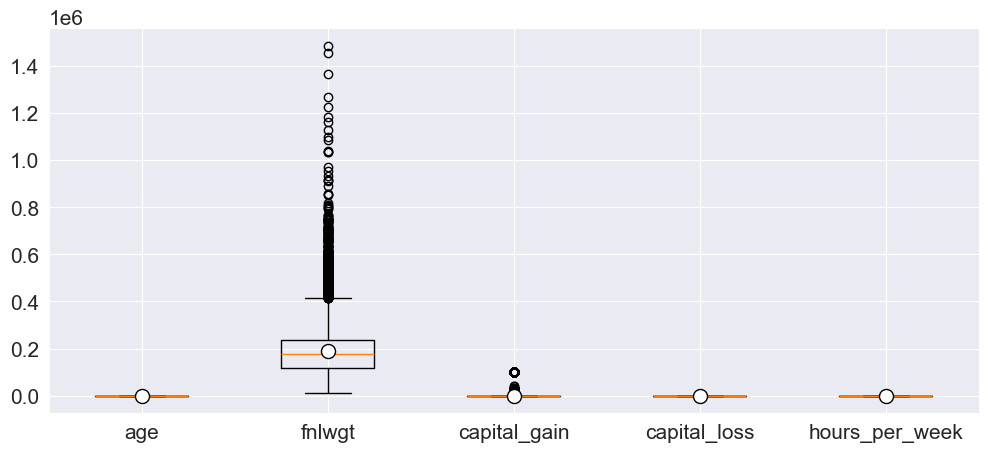

In [2583]:
plt.boxplot(x=df[df.select_dtypes('number').columns], 
            labels=df.select_dtypes('number').columns,
            showmeans=True);

In [2584]:
# no time left

**Plot both boxplots and histograms for each numeric features at the same figure as subplots**

In [2585]:
# no time left

**Check the statistical values for all numeric features**

In [2586]:
df.describe().T

count       mean        std       min        25%  \
age            30694.000     38.448     13.115    17.000     28.000   
fnlwgt         30694.000 189848.229 105465.126 13769.000 117828.500   
capital_gain   30694.000   1106.902   7500.730     0.000      0.000   
capital_loss   30694.000     88.980    405.808     0.000      0.000   
hours_per_week 30694.000     40.953     11.984     1.000     40.000   

                      50%        75%         max  
age                37.000     47.000      90.000  
fnlwgt         178513.500 237293.750 1484705.000  
capital_gain        0.000      0.000   99999.000  
capital_loss        0.000      0.000    4356.000  
hours_per_week     40.000     45.000      99.000

**1. After analyzing all features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.**

**2. So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.**

### 0.8.2. age

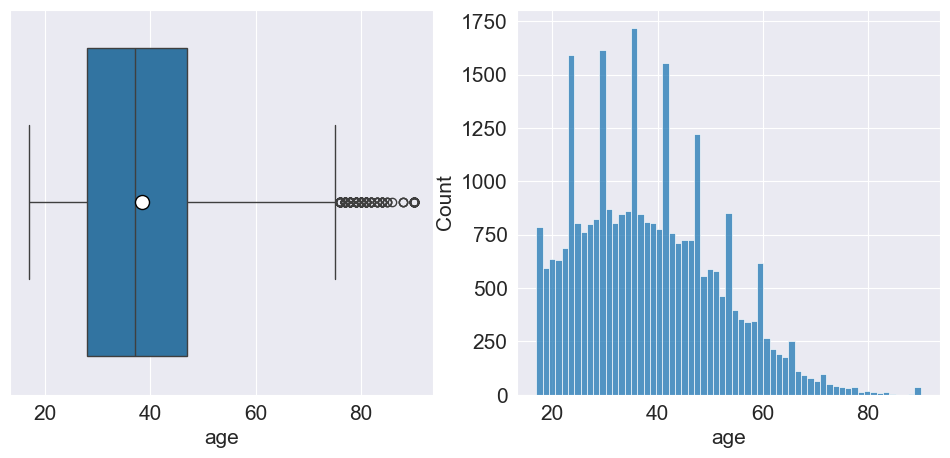

In [2587]:
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="age", showmeans=True)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="age");

# fig, ax = plt.subplots(nrows=1, ncols=2)
# ax[0].boxplot(data=df, x="age", showmeans=True)
# ax[1].histplot(data=df, x="age");  # AttributeError: 'Axes' object has no attribute 'histplot' ????

**Find IQR defining quantile 0.25 for low level and 0.75 for high level**

In [2588]:
low_level = df.age.quantile(0.25)
high_level = df.age.quantile(0.75)
IQR = high_level - low_level
low_level, high_level, IQR  # tuple

(28.0, 47.0, 19.0)

**Find lower and upper limit using IQR**

In [2589]:
lower_limit = low_level - 1.5*IQR
upper_limit = high_level + 1.5*IQR
lower_limit, upper_limit  # lower_limit is negative.

(-0.5, 75.5)

In [2590]:
df[df.age > upper_limit].age.value_counts()

age
90    35
76    30
77    20
80    16
79    15
81    14
78    14
84     8
82     7
83     5
88     3
85     3
86     1
Name: count, dtype: int64

**Define the observations whose age is greater than upper limit and sort these observations by age in descending order**

In [2591]:
df[df.age > upper_limit].sort_values(by=["age"], ascending=False)

age         workclass  fnlwgt       occupation                race  \
8806    90           Private   87372   Prof-specialty               White   
14159   90         Local-gov  187749     Adm-clerical  Asian-Pac-Islander   
28463   90       Federal-gov  195433     Craft-repair               White   
12975   90           Private  250832  Exec-managerial               White   
11996   90           Private   40388  Exec-managerial               White   
...    ...               ...     ...              ...                 ...   
15102   76         Local-gov  169133     Adm-clerical               White   
19085   76           Private  125784  Exec-managerial               White   
23515   76           Private  142535     Adm-clerical               White   
8240    76  Self-emp-not-inc  225964            Sales               White   
23354   76           Private  199949     Adm-clerical               White   

          sex  capital_gain  capital_loss  hours_per_week salary  \
8806     Male         20051             0              72   >50K   
14159    Male             0             0              20  <=50K   
28463    Male             0             0              30  <=50K   
12975    Male             0             0              40  <=50K   
11996    Male             0             0              55  <=50K   
...       ...           ...           ...             ...    ...   
15102  Female             0             0              30  <=50K   
19085    Male             0             0              40  <=50K   
23515    Male             0             0               6  <=50K   
8240     Male             0             0               8  <=50K   
23354    Male         20051             0              50   >50K   

       education_category marital_status_summary native_country_summary  
8806     high_level_grade                married                     US  
14159  medium_level_grade                married                 Others  
28463  medium_level_grade                married                     US  
12975     low_level_grade                married                     US  
11996    high_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
15102  medium_level_grade              unmarried                     US  
19085    high_level_grade                married                     US  
23515  medium_level_grade              unmarried                     US  
8240   medium_level_grade              unmarried                     US  
23354    high_level_grade                married                     US  

[171 rows x 13 columns]

### 0.8.3. hours_per_week

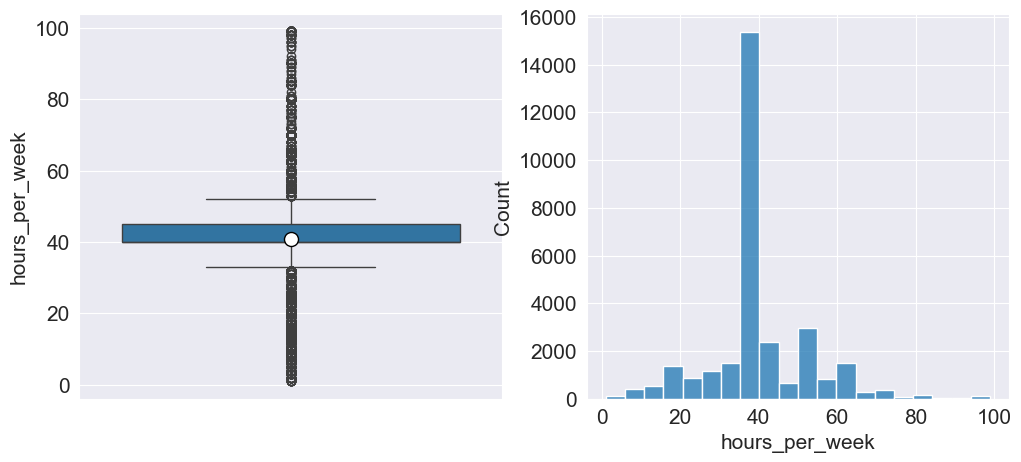

In [2592]:
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="hours_per_week", showmeans=True)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="hours_per_week", bins=20);

In [2593]:
low_level = df.hours_per_week.quantile(0.25)
high_level = df.hours_per_week.quantile(0.75)
IQR = high_level - low_level
low_level, high_level, IQR

(40.0, 45.0, 5.0)

In [2594]:
lower_limit = low_level - 1.5*IQR
upper_limit = high_level + 1.5*IQR
lower_limit, upper_limit

(32.5, 52.5)

In [2595]:
df[df.hours_per_week > upper_limit].hours_per_week.value_counts().sort_index(ascending=False)

hours_per_week
99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: count, dtype: int64

In [2596]:
df[df.hours_per_week > upper_limit].sort_values(by=["hours_per_week"], ascending=False)

age         workclass  fnlwgt        occupation   race     sex  \
25986   44         Local-gov  212665   Protective-serv  Black    Male   
19529   38           Private   66326  Transport-moving  White    Male   
8796    39           Private   70995  Transport-moving  White    Male   
15534   29           Private  167716     Other-service  White  Female   
22313   26  Self-emp-not-inc  258306   Farming-fishing  White    Male   
...    ...               ...     ...               ...    ...     ...   
1138    27           Private  138705      Craft-repair  White    Male   
23244   58           Private  248739   Farming-fishing  White    Male   
28858   62           Private  123411  Transport-moving  White    Male   
18417   24           Private  117167     Other-service  White  Female   
31622   61  Self-emp-not-inc  268831             Sales  White    Male   

       capital_gain  capital_loss  hours_per_week salary  education_category  \
25986             0             0              99  <=50K  medium_level_grade   
19529             0             0              99  <=50K  medium_level_grade   
8796          15024             0              99   >50K    high_level_grade   
15534             0             0              99  <=50K  medium_level_grade   
22313             0             0              99  <=50K     low_level_grade   
...             ...           ...             ...    ...                 ...   
1138              0             0              53  <=50K  medium_level_grade   
23244             0             0              53   >50K  medium_level_grade   
28858             0             0              53  <=50K     low_level_grade   
18417             0             0              53  <=50K  medium_level_grade   
31622             0             0              53  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
25986                married                     US  
19529                married                     US  
8796                 married                     US  
15534              unmarried                     US  
22313                married                     US  
...                      ...                    ...  
1138                 married                     US  
23244                married                     US  
28858                married                     US  
18417              unmarried                     US  
31622                married                     US  

[3402 rows x 13 columns]

In [2597]:
df[df.hours_per_week < lower_limit].hours_per_week.value_counts().sort_index()

hours_per_week
1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1066
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1009
31       5
32     239
Name: count, dtype: int64

In [2598]:
df[df.hours_per_week < lower_limit].groupby("salary").hours_per_week.describe()

count   mean   std   min    25%    50%    75%    max
salary                                                        
<=50K  4372.000 21.548 7.343 1.000 16.000 20.000 30.000 32.000
>50K    322.000 22.028 7.813 1.000 18.000 24.000 30.000 32.000

In [2599]:
df[df.hours_per_week < lower_limit].groupby("salary").age.describe()

count   mean    std    min    25%    50%    75%    max
salary                                                          
<=50K  4372.000 34.052 17.730 17.000 20.000 26.000 45.000 90.000
>50K    322.000 49.484 13.894 22.000 39.000 48.000 60.000 90.000

**Result :** As we see, there are number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, **domain knowledge** comes to the fore.

**Domain Knowledge for this dataset:**
1. In this dataset, all values are created according to the statements of individuals. So It can be some "data entries errors".
2. In addition, we have aimed to create an ML model with some restrictions as getting better performance from the ML model.
3. In this respect, our sample space ranges for some features are as follows.
    - **age : 17 to 80**
    - **hours_per_week : 7 to 70**
    - **if somebody's age is more than 60, he/she can't work more than 60 hours in a week**

### 0.8.4. Dropping rows according to the domain knownledge

#### age: 17 to 80

In [2600]:
df[(df.age < 17) | (df.age > 80)].sort_values(by=["age"], ascending=False)

age         workclass  fnlwgt         occupation                race  \
222     90           Private   51744      Other-service               Black   
18832   90           Private  115306    Exec-managerial               White   
10545   90           Private  175491       Craft-repair               White   
11512   90           Private   87285      Other-service               White   
11996   90           Private   40388    Exec-managerial               White   
12975   90           Private  250832    Exec-managerial               White   
14159   90         Local-gov  187749       Adm-clerical  Asian-Pac-Islander   
15892   90           Private   88991    Exec-managerial               White   
18277   90           Private  311184              Sales               White   
18413   90           Private  313749     Prof-specialty               White   
18725   90         Local-gov  153602      Other-service               White   
19212   90           Private  139660              Sales               Black   
8973    90           Private   46786              Sales               White   
19489   90           Private   84553  Machine-op-inspct               White   
19747   90           Private  226968  Machine-op-inspct               White   
20610   90           Private  206667     Prof-specialty               White   
22220   90           Private   52386     Prof-specialty  Asian-Pac-Islander   
24043   90  Self-emp-not-inc   82628    Exec-managerial               White   
28463   90       Federal-gov  195433       Craft-repair               White   
31030   90           Private   47929  Machine-op-inspct               White   
32277   90           Private  313749       Adm-clerical               White   
32367   90         Local-gov  214594    Protective-serv               White   
10210   90  Self-emp-not-inc  282095    Farming-fishing               White   
15356   90           Private   90523   Transport-moving               White   
5370    90         Local-gov  227796    Exec-managerial               White   
4070    90           Private  313986  Handlers-cleaners               White   
1040    90           Private  137018      Other-service               White   
6232    90  Self-emp-not-inc  155981     Prof-specialty               White   
1935    90           Private  221832    Exec-managerial               White   
2303    90           Private   52386      Other-service  Asian-Pac-Islander   
5272    90           Private  141758       Adm-clerical               White   
6624    90           Private  313986       Craft-repair               White   
2891    90           Private  171956       Adm-clerical               White   
5406    90           Private   51744    Exec-managerial               Black   
8806    90           Private   87372     Prof-specialty               White   
1168    88  Self-emp-not-inc  206291     Prof-specialty               White   
22895   88           Private   68539       Adm-clerical               White   
21835   88  Self-emp-not-inc  187097    Exec-managerial               White   
24027   86           Private  149912       Adm-clerical               White   
20463   85  Self-emp-not-inc  166027              Sales               White   
8381    85           Private  115364              Sales               White   
32459   85           Private   98611    Exec-managerial               White   
26731   84           Private  188328     Prof-specialty               White   
27795   84           Private  388384     Prof-specialty               Black   
9471    84         Local-gov  163685    Exec-managerial               White   
6214    84  Self-emp-not-inc  155057    Farming-fishing               White   
14711   84         Local-gov  135839       Adm-clerical               White   
11238   84      Self-emp-inc  172907              Sales               White   
7720    84           Private  241065     Prof-specialty               White   
15662   84           Private  132806      Other-service  

In [2601]:
df[(df.age < 17) | (df.age > 80)].shape

(76, 13)

In [2602]:
drop_index = df[(df.age < 17) | (df.age > 80)].index
drop_index

Index([  222,   918,  1040,  1168,  1935,  2303,  2891,  2906,  3537,  4070,
        4834,  5272,  5370,  5406,  6214,  6232,  6624,  6748,  7481,  7720,
        8381,  8431,  8806,  8973,  9471, 10210, 10545, 11238, 11512, 11996,
       12830, 12975, 13295, 13696, 13928, 14159, 14711, 14756, 15356, 15662,
       15892, 16302, 18277, 18413, 18725, 18832, 19045, 19172, 19212, 19489,
       19495, 19747, 20421, 20463, 20610, 21501, 21835, 22220, 22481, 22895,
       23459, 24027, 24043, 24280, 24395, 24560, 26731, 27795, 28463, 28948,
       29594, 31030, 31855, 32277, 32367, 32459],
      dtype='int64')

In [2603]:
x = df.shape
df.drop(drop_index, inplace=True);
print(f"dropping missing values: {x} -> {df.shape}")

dropping missing values: (30694, 13) -> (30618, 13)


#### hours_per_week : 7 to 70

In [2604]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by=["hours_per_week"], ascending=False)

age         workclass  fnlwgt        occupation                race  \
22216   45           Private   54260      Craft-repair               White   
5432    44           Private   83508    Prof-specialty               White   
19053   27           Private   40295  Transport-moving               White   
19141   59           Private  106748     Other-service               White   
19399   39      Self-emp-inc  163057      Craft-repair               White   
...    ...               ...     ...               ...                 ...   
20909   77  Self-emp-not-inc   71676      Adm-clerical               White   
25078   74           Private  260669     Other-service               White   
19750   23           Private   72887      Craft-repair  Asian-Pac-Islander   
189     58         State-gov  109567    Prof-specialty               White   
24284   57  Self-emp-not-inc   56480   Exec-managerial               White   

          sex  capital_gain  capital_loss  hours_per_week salary  \
22216    Male             0             0              99  <=50K   
5432   Female          2354             0              99  <=50K   
19053    Male             0             0              99  <=50K   
19141  Female             0             0              99  <=50K   
19399    Male             0             0              99  <=50K   
...       ...           ...           ...             ...    ...   
20909  Female             0          1944               1  <=50K   
25078  Female             0             0               1  <=50K   
19750    Male             0             0               1  <=50K   
189      Male             0             0               1   >50K   
24284    Male             0             0               1  <=50K   

       education_category marital_status_summary native_country_summary  
22216  medium_level_grade              unmarried                     US  
5432     high_level_grade              unmarried                     US  
19053  medium_level_grade              unmarried                     US  
19141     low_level_grade                married                     US  
19399  medium_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
20909  medium_level_grade              unmarried                     US  
25078     low_level_grade              unmarried                     US  
19750  medium_level_grade              unmarried                 Others  
189      high_level_grade                married                     US  
24284  medium_level_grade                married                     US  

[621 rows x 13 columns]

In [2605]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].shape

(621, 13)

In [2606]:
drop_index = df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].index
drop_index

Index([   10,    28,   157,   189,   265,   272,   299,   387,   427,   476,
       ...
       32271, 32320, 32332, 32359, 32364, 32391, 32402, 32432, 32469, 32476],
      dtype='int64', length=621)

In [2607]:
x = df.shape
df.drop(drop_index, inplace=True);
print(f"dropping missing values: {x} -> {df.shape}")

dropping missing values: (30618, 13) -> (29997, 13)


#### if somebody's age is more than 60, he/she can't work more than 60 hours in a week

In [2608]:
df[(df.age > 60) & (df.hours_per_week > 60)].head()

age     workclass  fnlwgt       occupation   race     sex  capital_gain  \
1541   62       Private  162245   Prof-specialty  White    Male             0   
2154   75       Private  101887  Priv-house-serv  White  Female             0   
2184   63  Self-emp-inc   54052            Sales  White    Male             0   
2665   70       Private   94692            Sales  White    Male             0   
3101   65  Self-emp-inc   81413  Farming-fishing  White    Male             0   

      capital_loss  hours_per_week salary  education_category  \
1541          1628              70  <=50K    high_level_grade   
2154             0              70  <=50K     low_level_grade   
2184             0              68   >50K    high_level_grade   
2665             0              70   >50K    high_level_grade   
3101          2352              65  <=50K  medium_level_grade   

     marital_status_summary native_country_summary  
1541                married                     US  
2154              unmarried                     US  
2184                married                     US  
2665                married                     US  
3101                married                     US

In [2609]:
df[(df.age > 60) & (df.hours_per_week > 60)].shape

(23, 13)

In [2610]:
drop_index = df[(df.age > 60) & (df.hours_per_week > 60)].index
drop_index

Index([ 1541,  2154,  2184,  2665,  3101,  5417,  6826,  8066,  9646, 12624,
       16634, 18367, 19584, 20125, 23399, 23585, 24903, 25910, 26625, 27721,
       28294, 31342, 32192],
      dtype='int64')

In [2611]:
x = df.shape
df.drop(drop_index, inplace=True);
print(f"dropping missing values: {x} -> {df.shape}")

dropping missing values: (29997, 13) -> (29974, 13)


In [2612]:
df.reset_index(drop = True, inplace = True)
df.head()

age         workclass  fnlwgt         occupation   race     sex  \
0   39         State-gov   77516       Adm-clerical  White    Male   
1   50  Self-emp-not-inc   83311    Exec-managerial  White    Male   
2   38           Private  215646  Handlers-cleaners  White    Male   
3   53           Private  234721  Handlers-cleaners  Black    Male   
4   28           Private  338409     Prof-specialty  Black  Female   

   capital_gain  capital_loss  hours_per_week salary  education_category  \
0          2174             0              40  <=50K    high_level_grade   
1             0             0              13  <=50K    high_level_grade   
2             0             0              40  <=50K  medium_level_grade   
3             0             0              40  <=50K     low_level_grade   
4             0             0              40  <=50K    high_level_grade   

  marital_status_summary native_country_summary  
0              unmarried                     US  
1                married                     US  
2              unmarried                     US  
3                married                     US  
4                married                 Others